<a href="https://colab.research.google.com/github/manonmanisekar/AR-vuforia/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Appliance Energy Prediction



##### **Project Type**    - Regression



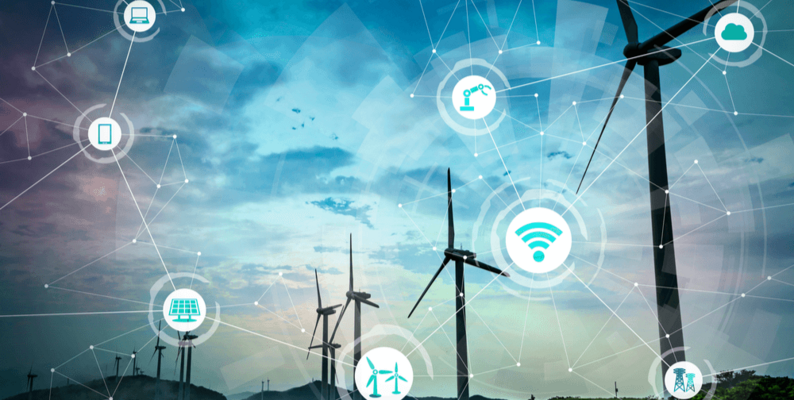

# **Project Summary -**

Energy is critical to economic and social growth.It enables nations to achieve their aim of higher living conditions.

So, these days, planning and operating energy production and consumption is a must.Understanding how energy is used is necessary for better management. This presented an opportunity to create a supervised machine learning method to forecast Appliance Energy use.

The initial phase, based on our dataset, was data prepressing. I understood the data and discovered that there are no null values in the dataset, and I received a detailed description of the characteristics involved.

Following that, Exploratory Data Analysis and Data Visualisation produced a concise knowledge of the link between features and label, i.e., the dependent variable It has also given an idea of the features to be chosen for the next step.The heatmap was utilised to understand the association between independent variables, based on which important features were chosen.Choosing the right elements to improve accuracy was difficult.

Standardisation was a critical step before fitting the model since it ensured that the feature values in the data had a zero mean and unit variance. When we construct any Machine Learning method, there is a chance that the objective function will not perform properly unless it is normalised.

Following completion of training and assessment. Linear, Lasso, Ridge, Elasticnet, Gradient Boosting, Random Forest, and XGBoosting techniques were employed. We checked and compared numerous matrices and determined that the Random Forest Regressor produces the best results.

I used the ExtraTreeRegressor and used Hyperparameter Tuning to improve accuracy and prevent overfitting. I also used Gridsearch cross validation to find the optimal parameter. These parameters improved our model's prediction performance.
Finally, we performed Model Explainability using ELI5, which assisted us in understanding the participation of features and their impact on the target variables.
To summarise, the ExtraTreeRegressor has proven to be the best model for our dataset.


# **GitHub Link -**

https://github.com/sabitendu/Capstone-Project-On-Appliance_Energy_Prediction.git

# **Problem Statement**


For approximately 4.5 months, the data set is set to 10 minutes. A ZigBee wireless sensor network was used to monitor the house's temperature and humidity levels. Every wireless node reported the temperature and humidity levels every 3.3 minutes. The wireless data was then averaged over 10 minute periods. The energy data was recorded every 10 minutes using m-bus energy metres. Weather from the nearest airport weather station (Chievres Airport, Belgium) was collected from a public data set from Reliable Prognosis (rp5.ru) and blended with the experimental data sets using the date and time columns. Two random variables were included in the data set to test the regression models and to filter out non-predictive features (parameters).

The problem statement is to create a machine learning model that can accurately forecast energy usage based on the supplied features. This might be valuable for building managers, energy firms, and policymakers who need to optimise energy consumption, cut costs, and minimise the environmental impact of energy usage.

Specifically, the model should be able to reliably anticipate energy usage based on the different elements that influence energy consumption, such as temperature, humidity, illumination, and time of day. This can assist building managers and energy firms in identifying patterns and trends in energy consumption and making informed energy decisions, such as altering HVAC settings, optimising lighting, or introducing energy-efficient solutions. Policymakers can also utilise this data to create regulations and incentives that encourage energy efficiency and sustainability.




# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [65]:
# Import Libraries for analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## to import datetime library
from datetime import datetime
import datetime as dt

## Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

#Import necessary statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm
#import libraries for ML-Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,make_scorer
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  BaggingRegressor, ExtraTreesRegressor, RandomForestRegressor,StackingRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor
# libraries for save the model
import pickle

### Dataset Loading

In [66]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
#load the dataset from drive
filepath='/content/drive/MyDrive/HW 2 Data.xlsx'
df_energy=pd.read_excel(filepath)

### Dataset First View

In [68]:
# # Viewing the top 5 rows to take a glimpse of the data
df_energy.head()

No      Time   Weekday  Appliances Energy (Wh)  Lights Energy (Wh)  \
0   1  16:20:00   Tuesday                      50                   0   
1   2  01:20:00  Thursday                      30                   0   
2   3  14:00:00    Friday                      60                  10   
3   4  14:10:00    Monday                      40                   0   
4   5  15:10:00    Monday                      30                   0   

   Temperature  R1  Humidity R1  Temperature  R2  Humidity R2  \
0        20.100000        43.56        19.130000        42.59   
1        19.100000        42.09        18.463333        41.26   
2        21.426667        38.79        21.111111        38.02   
3        19.390000        41.29        18.290000        41.50   
4        19.356667        41.40        18.200000        41.40   

   Temperature  R3  ...  Temperature  R8  Humidity R8  Temperature  R9  \
0            19.89  ...        18.716364    45.810000        17.200000   
1            20.00  ...        19.390000    50.560000        16.633333   
2            20.60  ...        18.390000    42.982222        17.566667   
3            19.70  ...        19.700000    42.400000        17.290000   
4            19.70  ...        19.600000    42.090000        17.200000   

   Humidity R9  Outside Temprature    Pressure  Humidity outside  Windspeed  \
0    43.663333            6.366667  744.000000         79.666667   5.000000   
1    44.760000            2.866667  754.433333         91.000000   5.000000   
2    46.560000            4.200000  755.000000         86.000000   8.000000   
3    38.000000           -0.566667  757.250000         69.500000   3.000000   
4    37.790000           -0.416667  756.966667         67.500000   2.833333   

   Visibility  Tdewpoint  
0   36.333333   3.100000  
1   27.333333   1.500000  
2   29.000000   2.100000  
3   38.166667  -5.550000  
4   30.833333  -5.733333  

[5 rows x 29 columns]

### Dataset Rows & Columns count

In [69]:
# Dataset Rows & Columns count
df_energy.shape

(80, 29)

In [70]:
print(f"the number of rows {df_energy.shape[0]}, and number of columns are {df_energy.shape[1]}")

the number of rows 80, and number of columns are 29


### Dataset Information

In [71]:
# Dataset Info
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      80 non-null     int64  
 1   Time                    80 non-null     object 
 2   Weekday                 80 non-null     object 
 3   Appliances Energy (Wh)  80 non-null     int64  
 4   Lights Energy (Wh)      80 non-null     int64  
 5   Temperature  R1         80 non-null     float64
 6   Humidity R1             80 non-null     float64
 7   Temperature  R2         80 non-null     float64
 8   Humidity R2             80 non-null     float64
 9   Temperature  R3         80 non-null     float64
 10  Humidity R3             80 non-null     float64
 11  Temperature  R4         80 non-null     float64
 12  Humidity R4             80 non-null     float64
 13  Temperature  R5         80 non-null     float64
 14  Humidity R5             80 non-null     floa



*   We have 29 columns and maximum columns are numerical except date
*   We have to convert the date column into datetime format



#### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

When there are identical instances in a dataset, it is referred to as "duplication." Such duplication could occur due to erroneous data entry or data collection procedures. Eliminating duplicate data from the dataset saves time and money by avoiding the repetition of the same data sent to the machine learning model.

In [72]:
# Dataset Duplicate Value Count
value = len(df_energy[df_energy.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there is no duplicate entry in the above data.

#### Missing Values/Null Values

##**Why dealing with missing values is necessary?**

Numerous missing values are frequently present in real-world data, which may be the result of data corruption or another issue. In order to handle missing values during the dataset pre-processing step, as many machine-learning algorithms do not support them. Consequently, identifying the missing values is the first step in dealing with missing data.

In [73]:
# Missing Values/Null Values Count
df_energy.isnull().sum()

No                        0
Time                      0
Weekday                   0
Appliances Energy (Wh)    0
Lights Energy (Wh)        0
Temperature  R1           0
Humidity R1               0
Temperature  R2           0
Humidity R2               0
Temperature  R3           0
Humidity R3               0
Temperature  R4           0
Humidity R4               0
Temperature  R5           0
Humidity R5               0
Temperature  R6           0
Humidity R6               0
Temperature  R7           0
Humidity R7               0
Temperature  R8           0
Humidity R8               0
Temperature  R9           0
Humidity R9               0
Outside Temprature        0
Pressure                  0
Humidity outside          0
Windspeed                 0
Visibility                0
Tdewpoint                 0
dtype: int64

<Axes: >

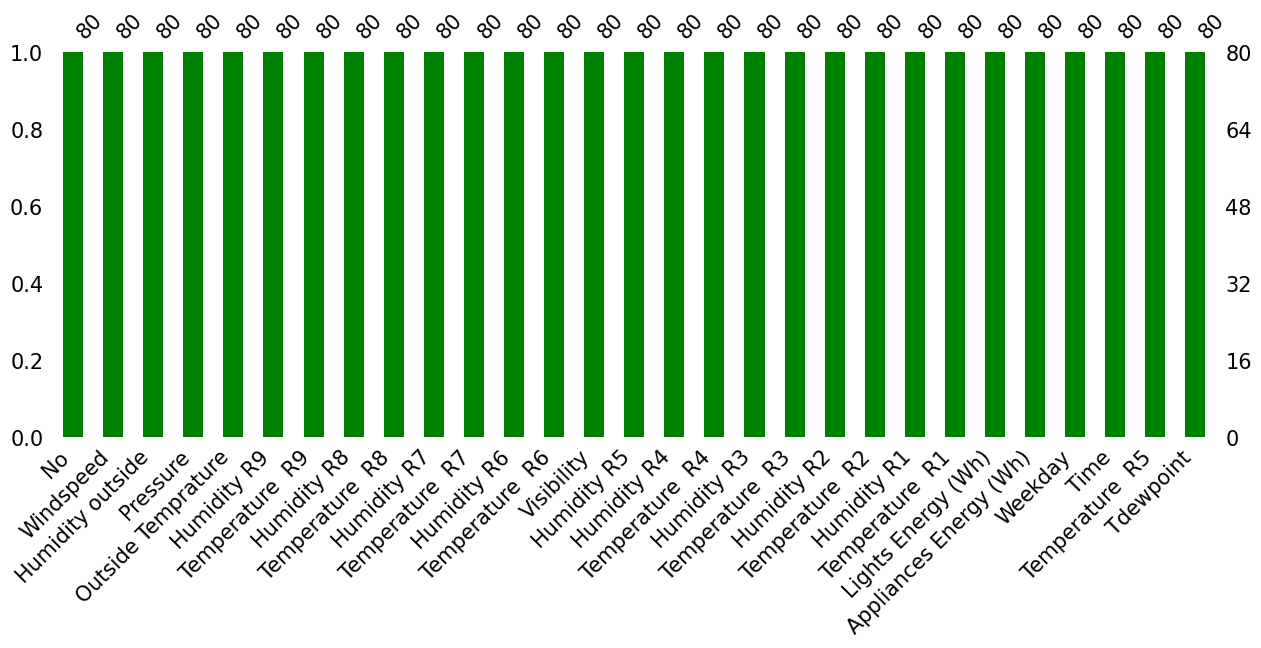

In [74]:
# Visualizing the missing values
msno.bar(df_energy, color='green',sort='ascending', figsize=(15,5), fontsize=15)

From the above command and figure, we noticed that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.

### What did you know about your dataset?

* The dataset provided contains 29 columns and 19735 rows and does not have any missing or duplicate values.


* The goal is to predict the energy use of appliances. Demand prediction involves analytical studies on the probability of house temperature and humidity conditions, which were monitored with a ZigBee wireless sensor network for 10 minutes for about 4.5 months.

* There are no duplicate columns

* There are no missing values

## ***2. Understanding Your Variables***

In [75]:
# Dataset Columns
df_energy.columns

Index(['No', 'Time', 'Weekday', 'Appliances Energy (Wh)', 'Lights Energy (Wh)',
       'Temperature  R1', 'Humidity R1', 'Temperature  R2', 'Humidity R2',
       'Temperature  R3', 'Humidity R3', 'Temperature  R4', 'Humidity R4',
       'Temperature  R5', 'Humidity R5', 'Temperature  R6', 'Humidity R6',
       'Temperature  R7', 'Humidity R7', 'Temperature  R8', 'Humidity R8',
       'Temperature  R9', 'Humidity R9', 'Outside Temprature', 'Pressure',
       'Humidity outside', 'Windspeed', 'Visibility', 'Tdewpoint'],
      dtype='object')

In [76]:
# Dataset Describe
df_energy.describe().T

count        mean        std         min         25%  \
No                       80.0   40.500000  23.237900    1.000000   20.750000   
Appliances Energy (Wh)   80.0   96.875000  94.929604   20.000000   50.000000   
Lights Energy (Wh)       80.0    4.375000   7.436440    0.000000    0.000000   
Temperature  R1          80.0   21.322333   1.404792   18.200000   20.390000   
Humidity R1              80.0   39.961375   3.456306   33.400000   37.572500   
Temperature  R2          80.0   19.884230   2.117956   16.700000   18.420000   
Humidity R2              80.0   40.289696   3.453995   31.066667   37.695833   
Temperature  R3          80.0   21.799732   1.775481   18.500000   20.550000   
Humidity R3              80.0   38.936038   2.742499   34.500000   37.200000   
Temperature  R4          80.0   20.446810   1.807857   16.566667   19.087500   
Humidity R4              80.0   38.651751   3.791764   32.530000   36.302500   
Temperature  R5          80.0   19.231428   1.477087   16.600000   18.049405   
Humidity R5              80.0   52.278804   9.607488   42.876000   45.790000   
Temperature  R6          80.0    6.751280   5.706161   -1.826667    2.042500   
Humidity R6              80.0   60.292007  28.859583    1.000000   39.680833   
Temperature  R7          80.0   19.857696   1.803502   16.200000   18.700000   
Humidity R7              80.0   35.088143   4.458753   24.600000   32.370357   
Temperature  R8          80.0   21.721143   1.619210   18.390000   20.675000   
Humidity R8              80.0   42.543021   4.418374   31.230000   39.592500   
Temperature  R9          80.0   19.124039   1.677244   15.890000   18.000000   
Humidity R9              80.0   40.840877   3.660633   31.890000   38.104286   
Outside Temprature       80.0    6.275789   5.256907   -1.950000    2.166667   
Pressure                 80.0  754.844851   7.091441  738.000000  751.133333   
Humidity outside         80.0   82.216220  13.112310   41.333333   76.375000   
Windspeed                80.0    3.933631   2.486499    1.000000    2.000000   
Visibility               80.0   39.620833  13.066017    8.666667   29.125000   
Tdewpoint                80.0    3.182470   4.074426   -5.733333    0.512500   

                               50%         75%         max  
No                       40.500000   60.250000   80.000000  
Appliances Energy (Wh)   65.000000  100.000000  600.000000  
Lights Energy (Wh)        0.000000   10.000000   20.000000  
Temperature  R1          21.200000   22.000000   25.100000  
Humidity R1              39.245000   42.018750   52.863333  
Temperature  R2          19.516667   20.972500   26.666667  
Humidity R2              40.750000   42.774167   48.833333  
Temperature  R3          21.730000   22.790000   26.790000  
Humidity R3              38.211667   40.200000   46.733333  
Temperature  R4          20.200000   21.400833   25.100000  
Humidity R4              38.130000   40.700000   50.233333  
Temperature  R5          19.100000   20.146667   23.890000  
Humidity R5              48.901000   56.238889   86.133333  
Temperature  R6           6.145000   10.000000   22.400000  
Humidity R6              65.725000   82.512500   99.900000  
Temperature  R7          19.740000   20.890000   24.500000  
Humidity R7              34.645000   37.475000   50.289444  
Temperature  R8          21.700000   22.899167   26.100000  
Humidity R8              42.338000   44.256250   53.025000  
Temperature  R9          18.890000   20.290000   23.100000  
Humidity R9              41.042000   43.317500   51.090000  
Outside Temprature        5.725000    9.700000   21.333333  
Pressure                755.950000  759.625000  767.200000  
Humidity outside         85.416667   92.166667   98.666667  
Windspeed                 3.583333    5.000000   12.333333  
Visibility               40.000000   42.000000   65.000000  
Tdewpoint                 2.645238    5.737500   13.450000

### Feature Description

**Date time year-**month-day hour:minute:second

**Appliances-** energy use in Wh

**Lights-** energy use of light fixtures in the house in Wh

**T1-** Temperature in kitchen area, in Celsius

**RH_1-** Humidity in kitchen area, in %

**T2-**Temperature in living room area, in Celsius

**RH_2-** Humidity in living room area, in %

**T3-** Temperature in laundry room area

**RH_3-** Humidity in laundry room area, in %

**T4-** Temperature in office room, in Celsius

**RH_4-** Humidity in office room, in %

**T5-** Temperature in bathroom, in Celsius

**RH_5-** Humidity in bathroom, in %

**T6-** Temperature outside the building (north side), in Celsius

**RH_6-** Humidity outside the building (north side), in %

**T7-**Temperature in ironing room , in Celsius

**RH_7-** Humidity in ironing room, in %

**T8-** Temperature in teenager room 2, in Celsius

**RH_8-** Humidity in teenager room 2, in %

**T9-**Temperature in parents room, in Celsius

**RH_9-** Humidity in parents room, in %

**To-**Temperature outside (from Chievres weather station), in Celsius

**Pressure (from Chievres weather station)-** in mm Hg

**RH_out-** Humidity outside (from Chievres weather station), in %

**Wind speed (from Chievres weather station)-** in m/s

**Visibility (from Chievres weather station)-**in km

**Tdewpoint (from Chievres weather station)-** Â°C

**rv1-** Random variable 1, nondimensional

**rv2-** Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

### Check Unique Values for each variable.

In [77]:
# Check Unique Values for each variable.
for i in df_energy.columns.tolist():
  print("No. of unique values in ",i,"is",df_energy[i].nunique())


No. of unique values in  No is 80
No. of unique values in  Time is 61
No. of unique values in  Weekday is 7
No. of unique values in  Appliances Energy (Wh) is 21
No. of unique values in  Lights Energy (Wh) is 3
No. of unique values in  Temperature  R1 is 50
No. of unique values in  Humidity R1 is 77
No. of unique values in  Temperature  R2 is 64
No. of unique values in  Humidity R2 is 79
No. of unique values in  Temperature  R3 is 59
No. of unique values in  Humidity R3 is 65
No. of unique values in  Temperature  R4 is 57
No. of unique values in  Humidity R4 is 67
No. of unique values in  Temperature  R5 is 60
No. of unique values in  Humidity R5 is 77
No. of unique values in  Temperature  R6 is 75
No. of unique values in  Humidity R6 is 77
No. of unique values in  Temperature  R7 is 60
No. of unique values in  Humidity R7 is 75
No. of unique values in  Temperature  R8 is 63
No. of unique values in  Humidity R8 is 76
No. of unique values in  Temperature  R9 is 48
No. of unique values i

## 3. ***Data Wrangling***

### Data Wrangling Code

## Renaming The Columns according to the Variable Description.

In [84]:
df_energy.columns


Index(['Appliances Energy (Wh)', 'Lights Energy (Wh)', 'Temperature  R1',
       'Humidity R1', 'Temperature  R2', 'Humidity R2', 'Temperature  R3',
       'Humidity R3', 'Temperature  R4', 'Humidity R4', 'Temperature  R5',
       'Humidity R5', 'Temperature  R6', 'Humidity R6', 'Temperature  R7',
       'Humidity R7', 'Temperature  R8', 'Humidity R8', 'Temperature  R9',
       'Humidity R9', 'Outside Temprature', 'Pressure', 'Humidity outside',
       'Windspeed', 'Visibility', 'Tdewpoint', 'Hour', 'Minute',
       'weekday_num'],
      dtype='object')

In [100]:
#rename the columns
df_energy.rename(columns={'Temperature  R1': 'temp_kitchen', 'Humidity R1':'hu_Kitchen',  'Temperature  R2':'temp_living_room', 'Humidity R2': 'hu_living', 'Temperature  R3':'temp_Laundry_room',
       'Humidity R3':'hu_laundry', 'Temperature  R4':'temp_office_room','Humidity R4':'hu_office', 'Temperature  R5':'temp_bathroom','Humidity R5':'hu_bath', 'Temperature  R6':'temp_build_out'
       , 'Humidity R6':'hu_build_out', 'Temperature  R7':'temp_ironing_room', 'Humidity R7':'hu_ironing_room', 'Temperature  R8':'temp_teen_room',
       'Humidity R8':'hu_teen', 'Temperature  R9':'temp_parents_room', 'Humidity R9':'hu_parent','Outside Temprature':'temp_out', 'Humidity outside':'out_humidity'},inplace = True)

In [86]:
import pandas as pd

# Assume 'df' is your DataFrame

# Convert 'Time' column to strings if it has type datetime.time
df_energy['Time'] = df_energy['Time'].astype(str)

# Convert 'Time' column to datetime with a default date
# Applying pd.to_datetime to the 'Time' column directly and filling NaT with a scalar
df_energy['Time'] = pd.to_datetime(df_energy['Time'], errors='coerce').fillna(pd.to_datetime('1900-01-01'))

# Extract hour and minute from the 'Time' column
df_energy['Hour'] = df_energy['Time'].dt.hour
df_energy['Minute'] = df_energy['Time'].dt.minute

# Print the updated DataFrame
print(df_energy[['Time', 'Hour', 'Minute']])

KeyError: 'Time'

In [80]:
# Create a dictionary to map weekday names to numbers (Monday=0, Sunday=6)
weekday_map = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Use the map function to convert weekday names to numbers in the 'weekday' column
df_energy['weekday_num'] = df_energy['Weekday'].map(weekday_map)

In [87]:
#separate column list for better analysis
temp_cols=['temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','temp_build_out','temp_ironing_room','temp_teen_room','temp_parents_room']
hu_cols=['hu_Kitchen','hu_living','hu_laundry', 'hu_office','hu_bath','hu_build_out','hu_ironing_room','hu_teen','hu_parent']
light_cols=['light']
weather_cols=['temp_out','out_humidity',"Tdewpoint","Press_mm_hg","Windspeed","Visibility"]
date_col = ['month','weekday','hour']
random_col = ["rv1","rv2"]

In [82]:
df_energy.drop(['Time', 'Weekday'], axis=1, inplace=True)
df_energy.drop(['No'], axis=1, inplace=True)

In [88]:
#look at first five rows after rename the column
df_energy.head()

Appliances Energy (Wh)  Lights Energy (Wh)  temp_kitchen  hu_Kitchen  \
0                      50                   0     20.100000       43.56   
1                      30                   0     19.100000       42.09   
2                      60                  10     21.426667       38.79   
3                      40                   0     19.390000       41.29   
4                      30                   0     19.356667       41.40   

   temp_living_room  hu_living  temp_Laundry_room  hu_laundry  \
0         19.130000      42.59              19.89   44.760000   
1         18.463333      41.26              20.00   43.326667   
2         21.111111      38.02              20.60   40.200000   
3         18.290000      41.50              19.70   40.700000   
4         18.200000      41.40              19.70   40.700000   

   temp_office_room  hu_office  ...  hu_parent  Outside Temprature  \
0         19.390000  42.590000  ...  43.663333            6.366667   
1         18.600000  41.590000  ...  44.760000            2.866667   
2         20.164815  40.507407  ...  46.560000            4.200000   
3         18.890000  38.290000  ...  38.000000           -0.566667   
4         18.890000  38.290000  ...  37.790000           -0.416667   

     Pressure  Humidity outside  Windspeed  Visibility  Tdewpoint  Hour  \
0  744.000000         79.666667   5.000000   36.333333   3.100000    16   
1  754.433333         91.000000   5.000000   27.333333   1.500000     1   
2  755.000000         86.000000   8.000000   29.000000   2.100000    14   
3  757.250000         69.500000   3.000000   38.166667  -5.550000    14   
4  756.966667         67.500000   2.833333   30.833333  -5.733333    15   

   Minute  weekday_num  
0      20            2  
1      20            4  
2       0            5  
3      10            1  
4      10            1  

[5 rows x 29 columns]

### What all manipulations have you done and insights you found?

1. Splitting date columns into hour,weekdays, months.
2. It will help in analysing the data on the bases of months, days and hours.
3. Dropped date column due to no further use of them.
4. Renaming of some features, for better understanding and readibility.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# Appliance Energy Column

In [89]:
df_energy['Total Energy Consumption'] = df_energy['Appliances Energy (Wh)'] +df_energy['Lights Energy (Wh)']

In [90]:
df_energy.drop(['Appliances Energy (Wh)', 'Lights Energy (Wh)'], axis=1, inplace=True)


In [91]:
df_energy.columns

Index(['temp_kitchen', 'hu_Kitchen', 'temp_living_room', 'hu_living',
       'temp_Laundry_room', 'hu_laundry', 'temp_office_room', 'hu_office',
       'temp_bathroom', 'hu_bath', 'temp_build_out', 'hu_build_out',
       'temp_ironing_room', 'hu_ironing_room', 'temp_teen_room', 'hu_teen',
       'temp_parents_room', 'hu_parent', 'Outside Temprature', 'Pressure',
       'Humidity outside', 'Windspeed', 'Visibility', 'Tdewpoint', 'Hour',
       'Minute', 'weekday_num', 'Total Energy Consumption'],
      dtype='object')

<Axes: xlabel='Hour', ylabel='Total Energy Consumption'>

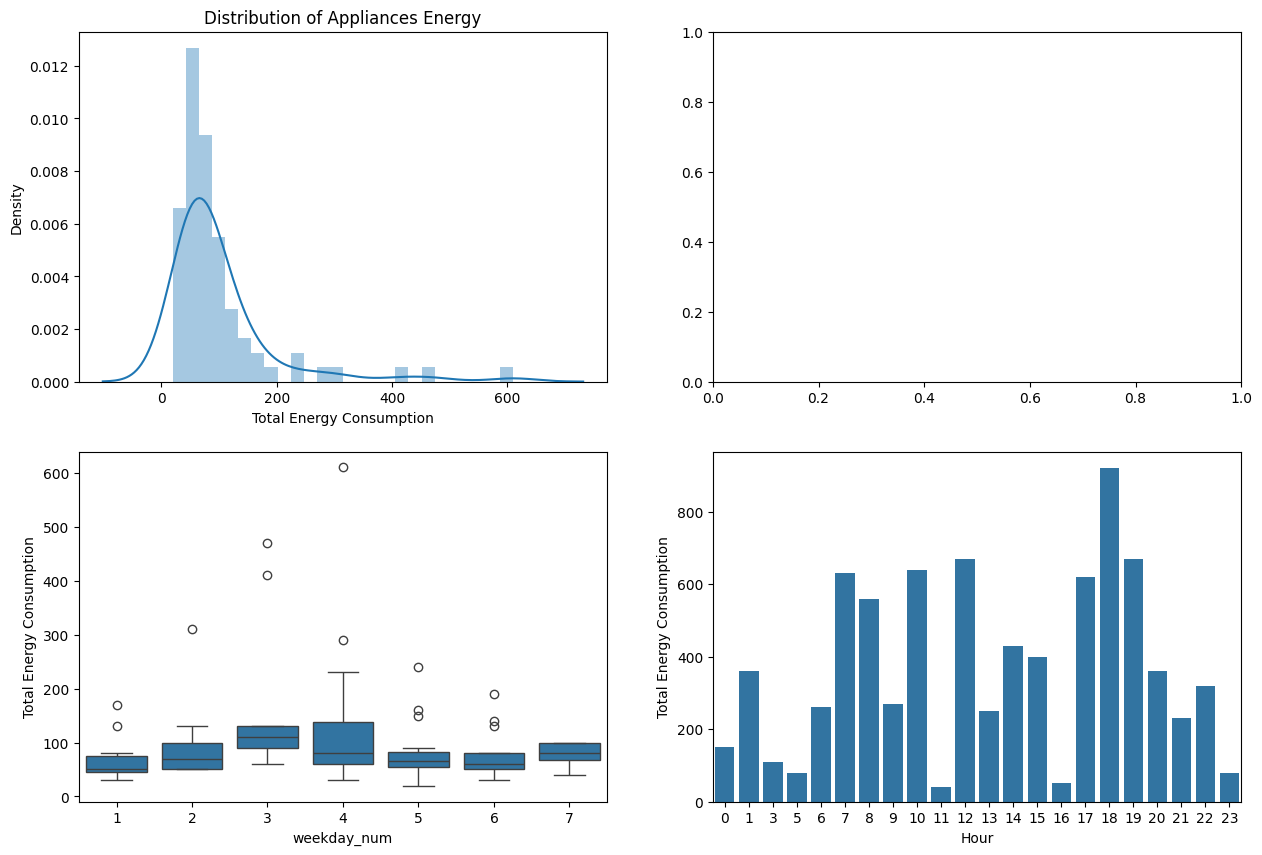

In [92]:
fig,ax=plt.subplots(2,2,figsize=(15,10))

#Distribution of Appliances
dist=sns.distplot(df_energy['Total Energy Consumption'], ax=ax[0,0])
dist.set_title('Distribution of Appliances Energy')

#Average Appliances Energy over weekdays
weekday_eng=pd.DataFrame(df_energy.groupby('weekday_num')['Total Energy Consumption'].sum()).reset_index()
#sns.barplot(x=weekday_eng['weekday'],y=weekday_eng['Appliances'],ax=ax[1,0])
sns.boxplot(x=df_energy['weekday_num'],y=df_energy['Total Energy Consumption'],ax=ax[1,0])
#Average Appliances Energy over hours
hour_eng=pd.DataFrame(df_energy.groupby('Hour')['Total Energy Consumption'].sum()).reset_index()
sns.barplot(x=hour_eng['Hour'],y=hour_eng['Total Energy Consumption'],ax=ax[1,1])

##### 1. Why did you pick the specific chart?

* The reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

*  Violin plots depict summary statistics and the density of each variable.

* Box plots are used to show distributions of numeric data values and compare them between multiple groups.

* Bar plots enables to compare categorical data in dependency of numerical data

##### 2. What is/are the insight(s) found from the chart?

* Appliances Enegry has positive skewness. A log transformation can make it normal. Most of the values are around 100 Wh. Outliers are also present in the column.

*  In the month of January, the energy usage is high compared to the other months, and February has low energy consumption.

* On Thursday and Saturday, the energy usage is high compared to the other days, and Tuesday has low energy consumption.

* In the hours of the day, 8 hrs to 21 hrs have high energy consumption.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In the hours of the day from 10 PM. to 7 PM., we can save the most energy and send the excess power to the grid. In the weeks of Tuesday and February, we can save the most money on power usage.

#### Temperature columns (Univariate+Bivariate)

In [93]:
df_energy.columns

Index(['temp_kitchen', 'hu_Kitchen', 'temp_living_room', 'hu_living',
       'temp_Laundry_room', 'hu_laundry', 'temp_office_room', 'hu_office',
       'temp_bathroom', 'hu_bath', 'temp_build_out', 'hu_build_out',
       'temp_ironing_room', 'hu_ironing_room', 'temp_teen_room', 'hu_teen',
       'temp_parents_room', 'hu_parent', 'Outside Temprature', 'Pressure',
       'Humidity outside', 'Windspeed', 'Visibility', 'Tdewpoint', 'Hour',
       'Minute', 'weekday_num', 'Total Energy Consumption'],
      dtype='object')

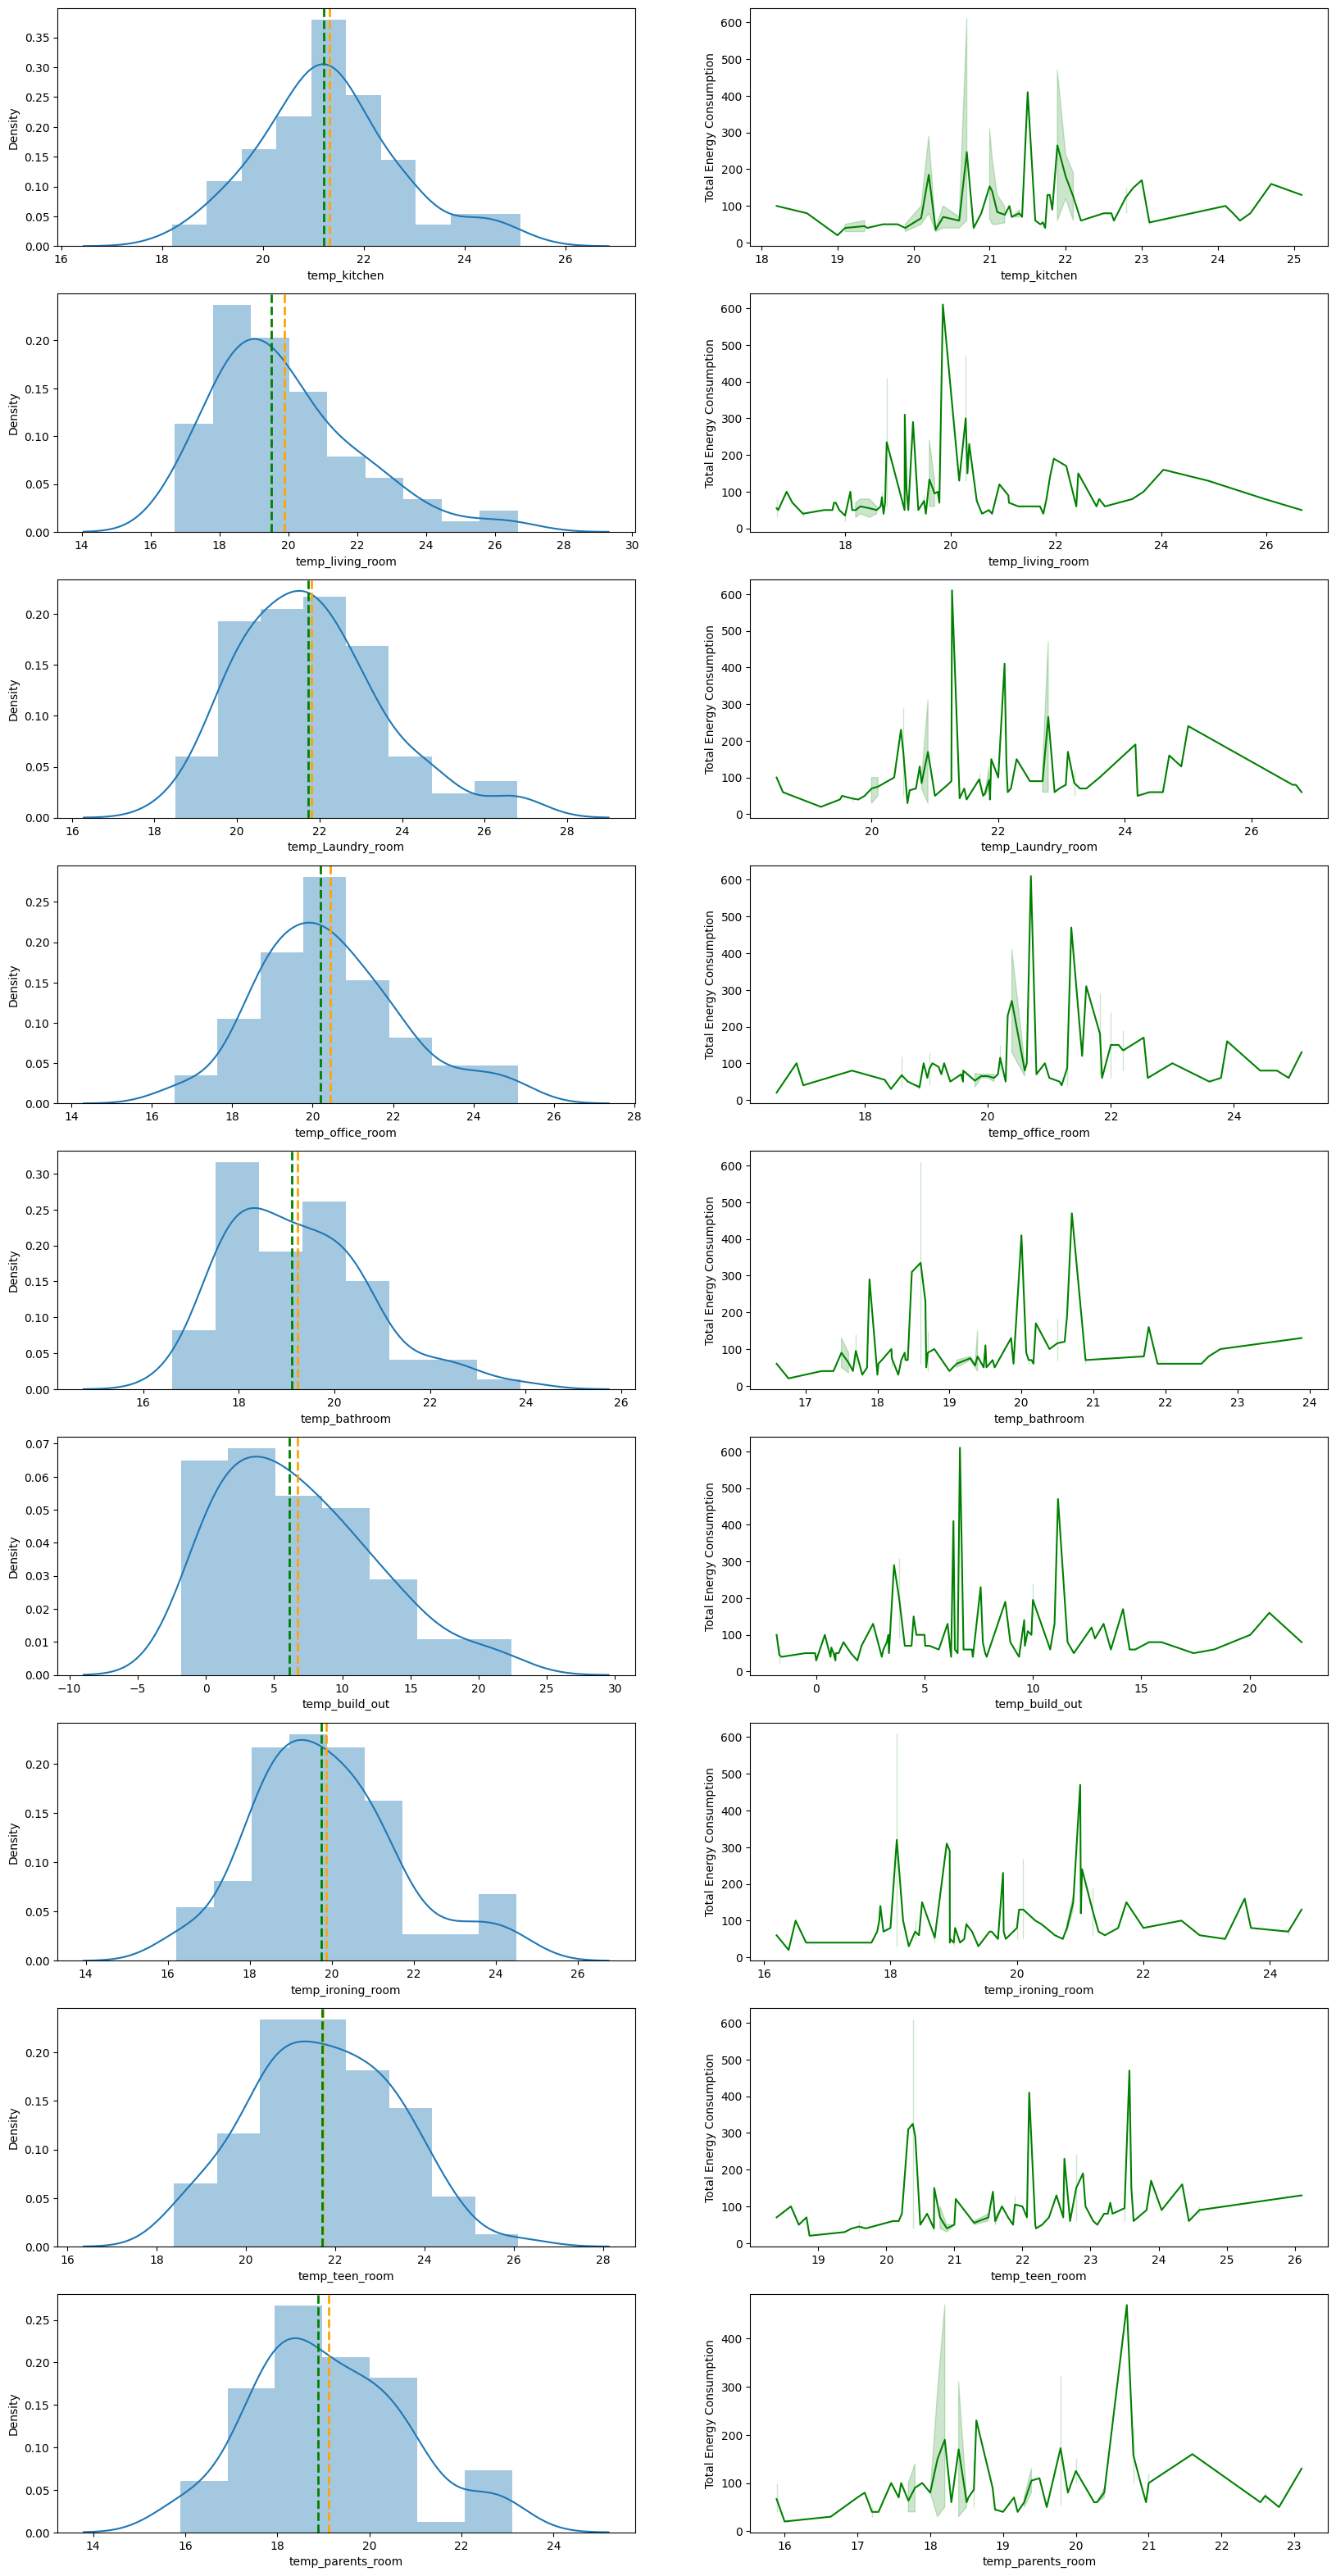

In [94]:
n=len(temp_cols)
fig,ax=plt.subplots(len(temp_cols),2,figsize=(20,40))
for i,col in enumerate(temp_cols):
  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.lineplot(data=df_energy,x=col,y='Total Energy Consumption',color='green',ax=ax[i,1]);



##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

* A line plot is also used to observe how numerical values change over time.

##### 2. What is/are the insight(s) found from the chart?

* All Temperature columns are followed normally distribution except parents rooms temperature
* Inside buliding mean and median value of all room temperature lies between 19 to 22 degree celcius
* Outside buliding mean and median value of  temperature lies between 6 to 7 degree celcius
* The lines in nearly all of the columns follow the same pattern.
*  It could be due to the same type of relationship between temperature variables and the Appliances Energy Consumption.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* When inside building temperatures are below 18 degree celcius energy consumption is minmium means maximum energy can saved.

* All temperatures have similar relationship with appliance energy consumption.It leads to multicolinarity.These columns will be dropped in upcoming appropriate section.

#### Humidity columns (Univariate+Bivariate)

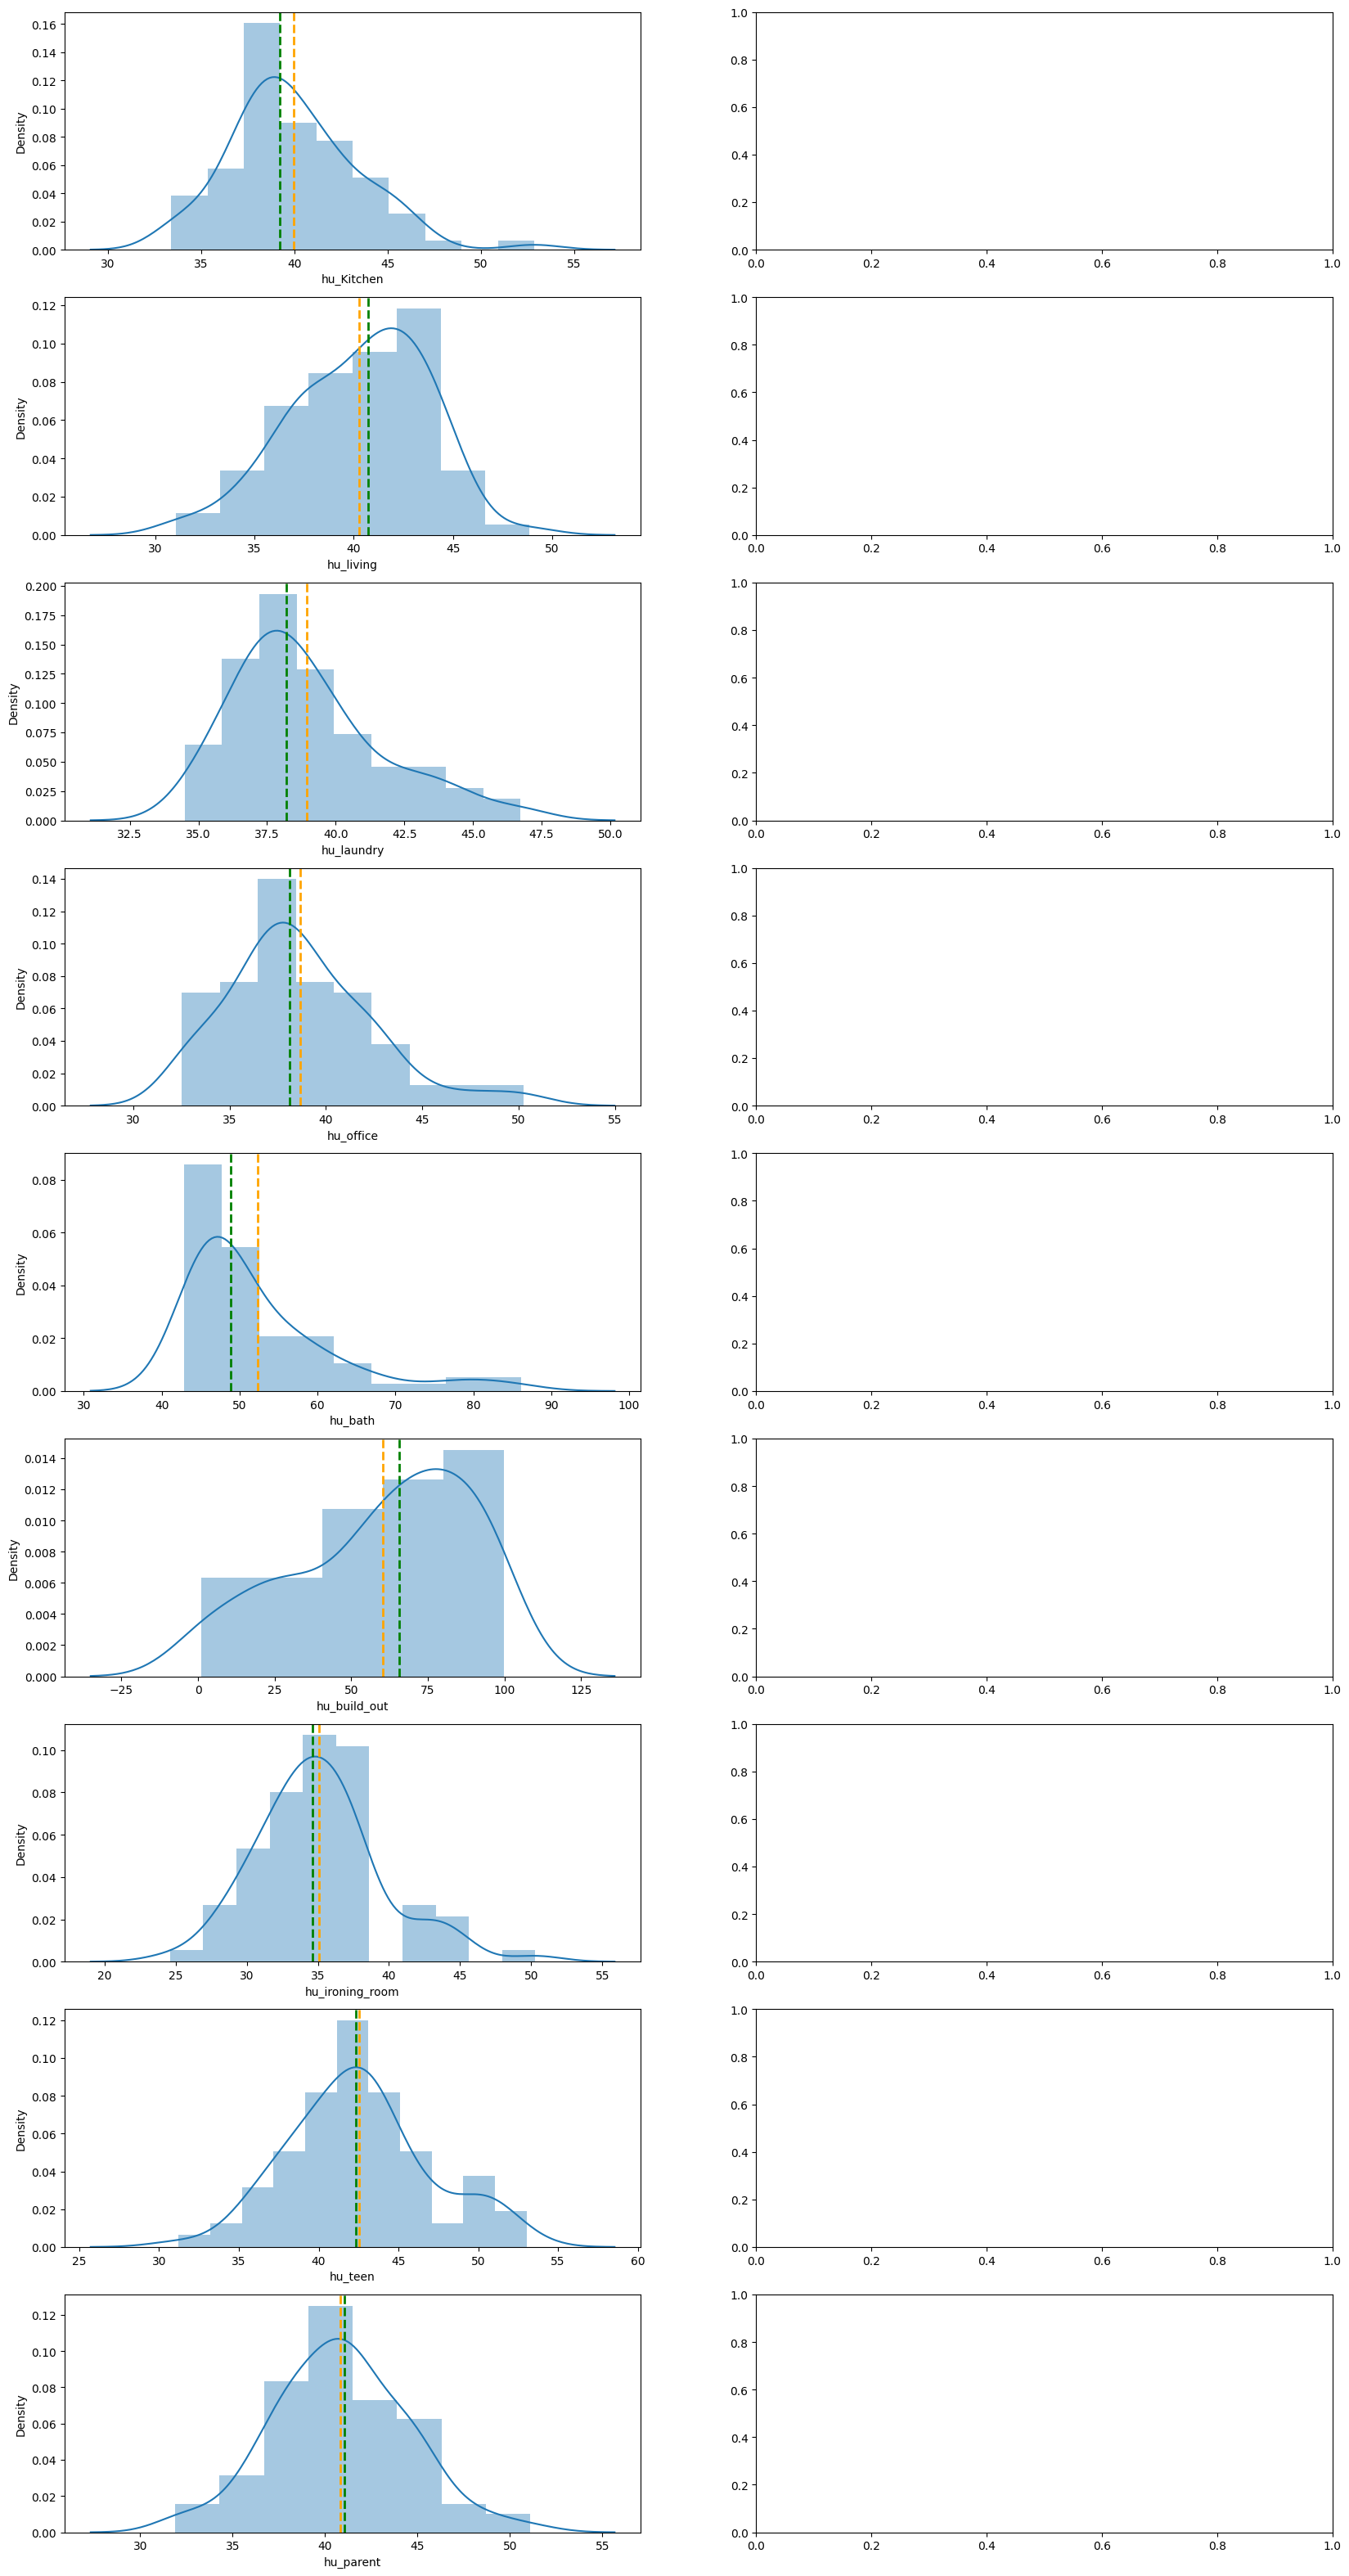

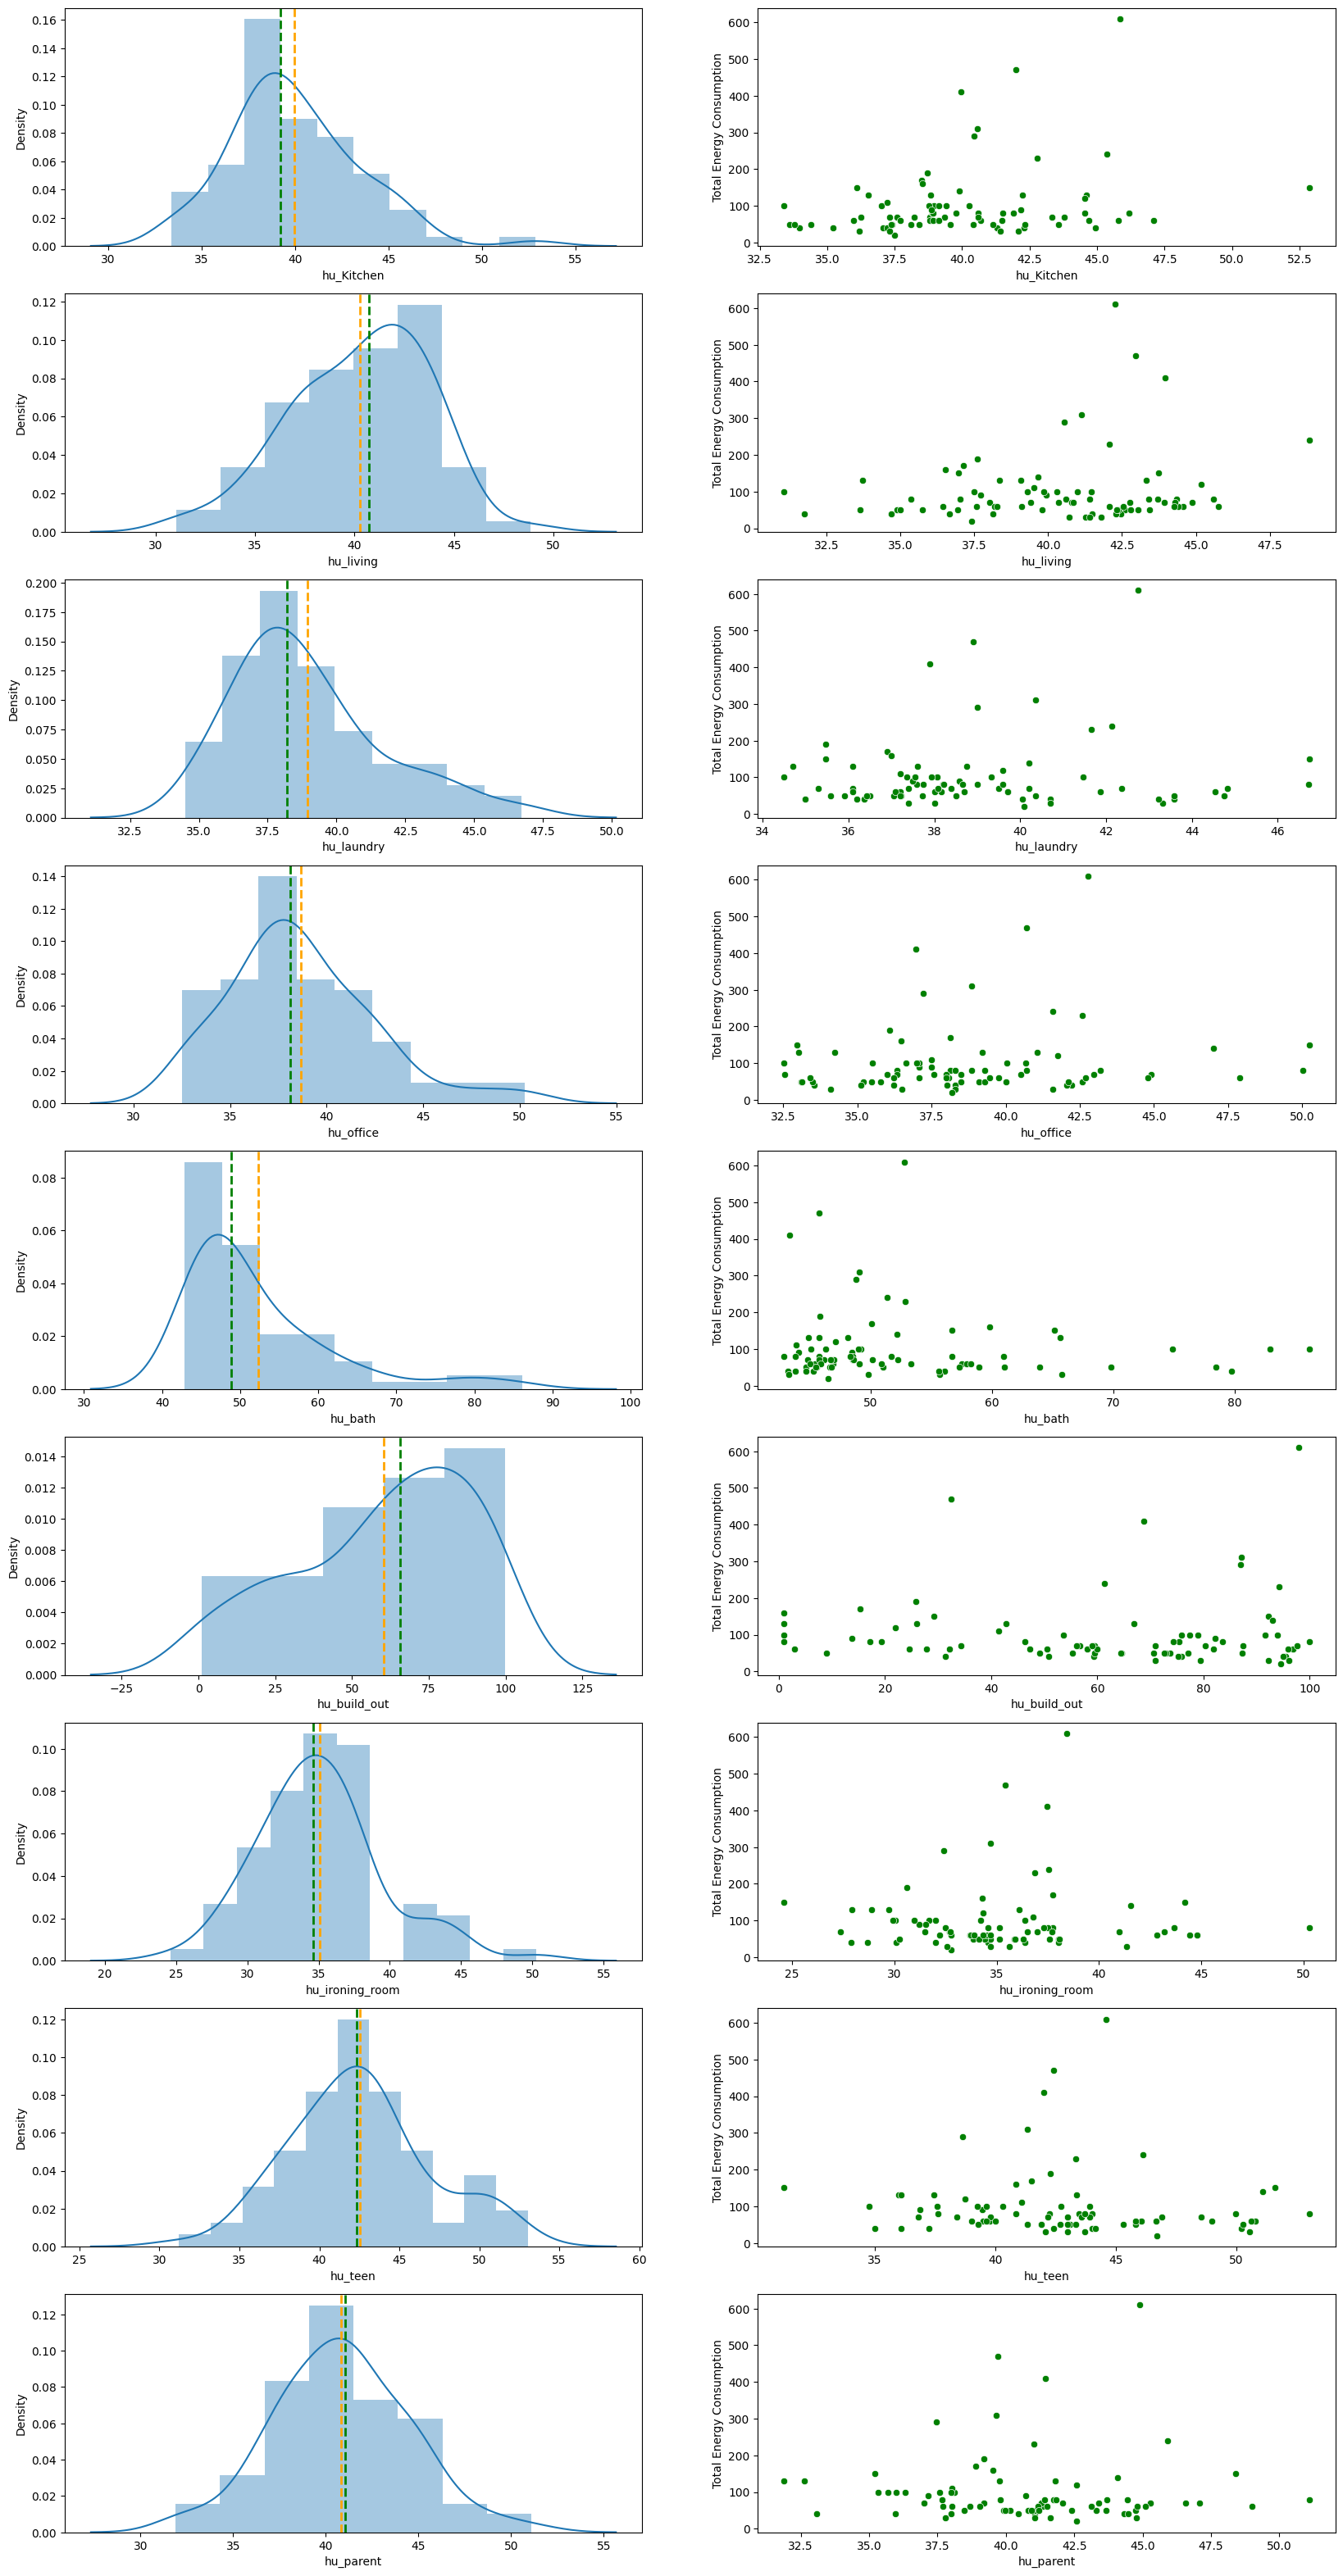

In [97]:
fig,ax=plt.subplots(len(hu_cols),2,figsize=(20,40))
for i,col in enumerate(hu_cols):
  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(len(hu_cols),2,figsize=(20,40))
for i,col in enumerate(hu_cols):
  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.scatterplot(data=df_energy,x=col,y='Total Energy Consumption',color='green',ax=ax[i,1]);

##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

##### 2. What is/are the insight(s) found from the chart?

* All humidity distribution is follwed normal distribution except outside building humidity.
* In inside building the mean and median value of humidity distribution lies between 35 to 45 percent,except bathroom humidity and it is near about 50 percent.
* For outside building humidity, the mean and median value is around 55 percent.
* For inside building low and high humidity causes low consumption of appliances energy. otherwise it causes high spreading data of energy consumption.
* For outside building humidity energy consumption data is widely spread irresective of humidity.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* low humidity and high humidity can saves maximum energy.
*All humidities have similar relationship with appliance energy consumption.It leads to multicolinarity.These columns will be dropped in upcoming appropriate section.

#### Weather columns (Univariate+Bivariate)

KeyError: 'Press_mm_hg'

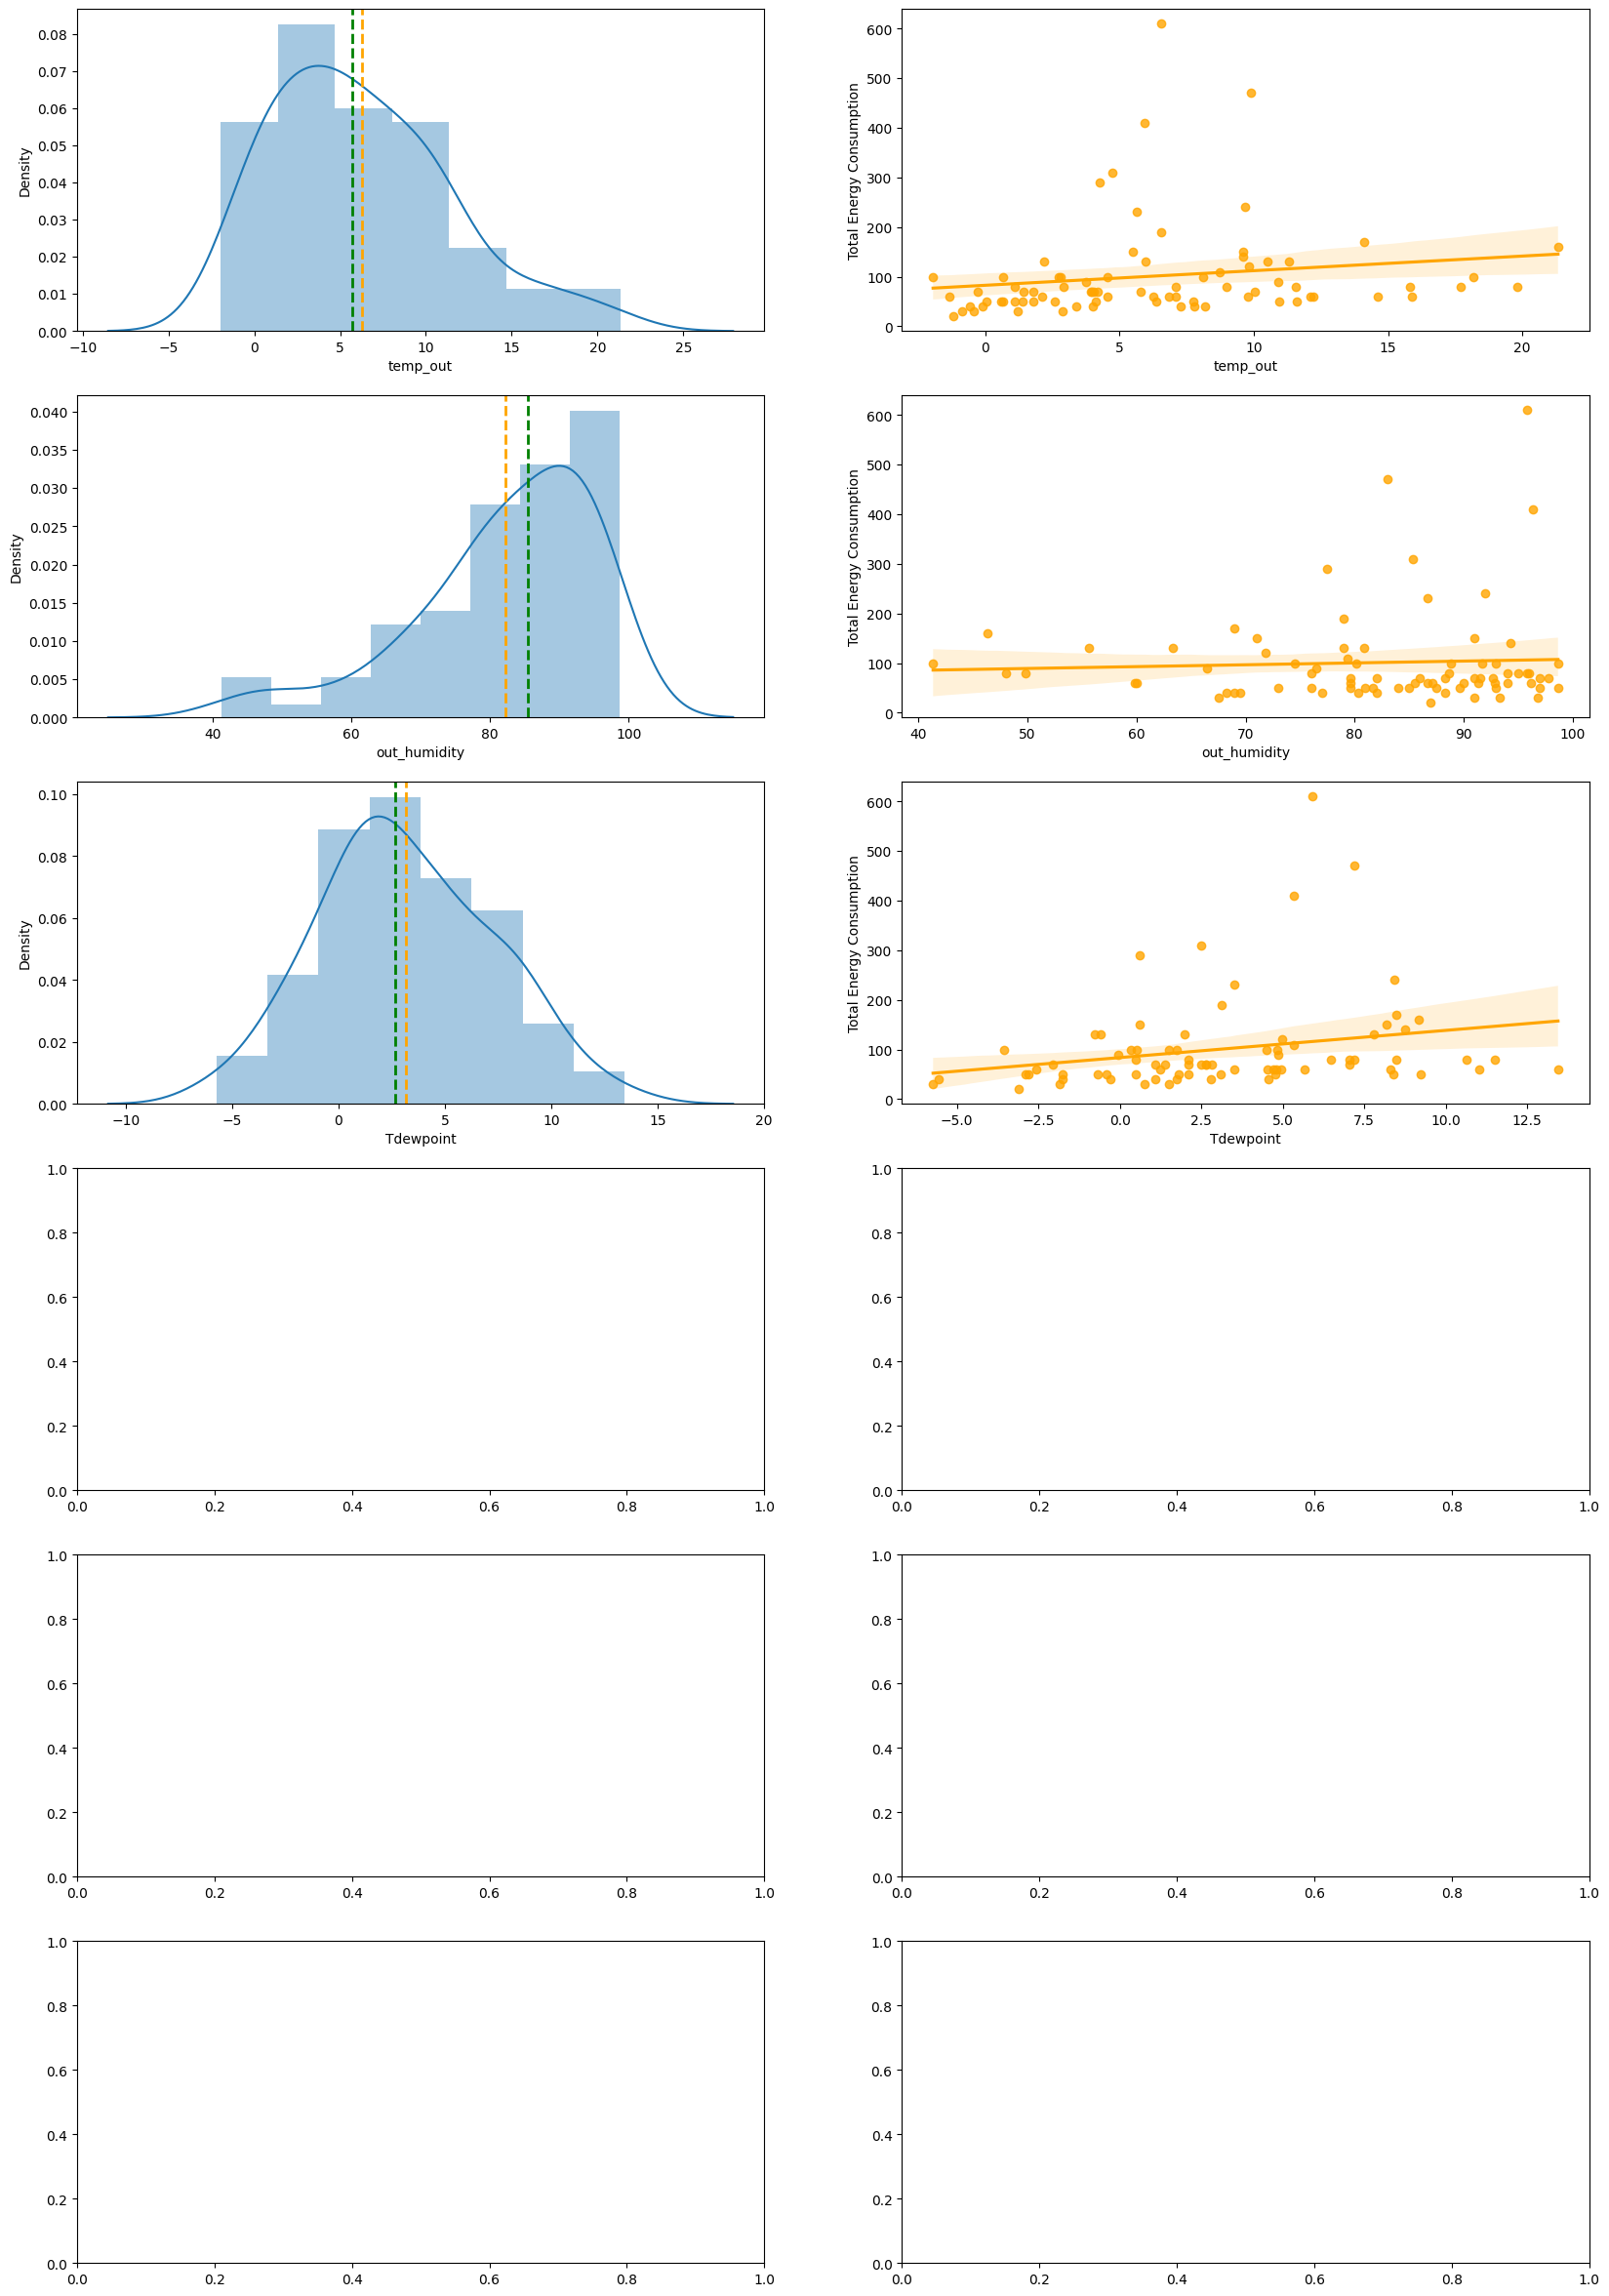

In [101]:
fig,ax=plt.subplots(len(weather_cols),2,figsize=(20,30))
for i,col in enumerate(weather_cols):
  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.regplot(data=df_energy,x=col,y='Total Energy Consumption',color='orange',ax=ax[i,1]);

##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* Regplot method is used to plot data and a linear regression model fit. we can observe if the feature  can fit with regression problem.

##### 2. What is/are the insight(s) found from the chart?

* Teperature outside, Presuure,Tdewpoint have followed normal distribution.
* Windspeed is positively skewd
* Visibility, outside humidity are negatively skewd.
* When outside temperature is below 0 degree the spread of the enrgy used data is low. The mean value of energy used is exceptionally high near -3 and 22 degree celcius
* When outside humidity is below 40 percent,spread of the energy used data is low and it is near about gradually increase with increase the humidity.The mean value of energy used is exceptionally high near about 30 and 60 percent of humidity.
* When pressure is below 745 hg,distrbution of energy consumption low,other than it is highly spread.
* When windspeed is below 1m/s and above 12 m/s the distribution of energy consumption is low.When windspeed is 4 m/s and 9 m/s the mean energy consumption is exceptionally high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* when the outside temperature is below 0 degree celcius, outside humidity is below 40 percent, visibility is below 10 and dewpoint is between 0-5 the possibility of energy saving is high.
* Temperature, Humidity, Tdewpoint has high probability of colinearity. It will inspect further in upcoming section.

#### Light Column (Univariate+ Bivariate)

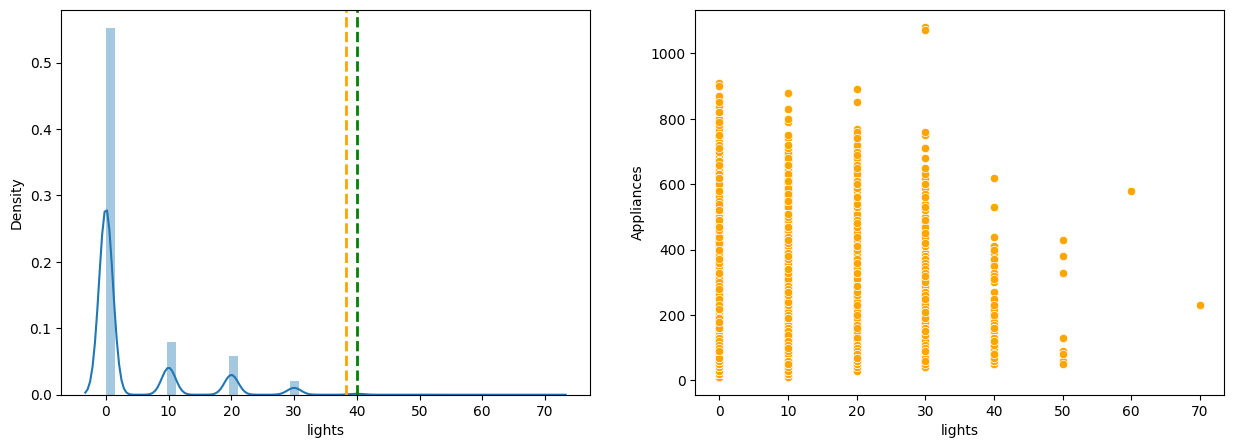

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

  #univariate of the columns
dist=sns.distplot(df_energy['lights'],ax=ax[0])
ax[0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Appliance Energy
  #lineplot
scatter=sns.scatterplot(data=df_energy,x='lights',y='Appliances',color='orange',ax=ax[1]);

##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

##### 2. What is/are the insight(s) found from the chart?

This column neither follows the normal distribution nor the relevant skewness.Also, because this column isn't adding many values to the dataset, we'll remove it in the upcoming step.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It has no impact on the buisness.

Random variable Column (Univariate+ Bivariate)

KeyError: 'rv1'

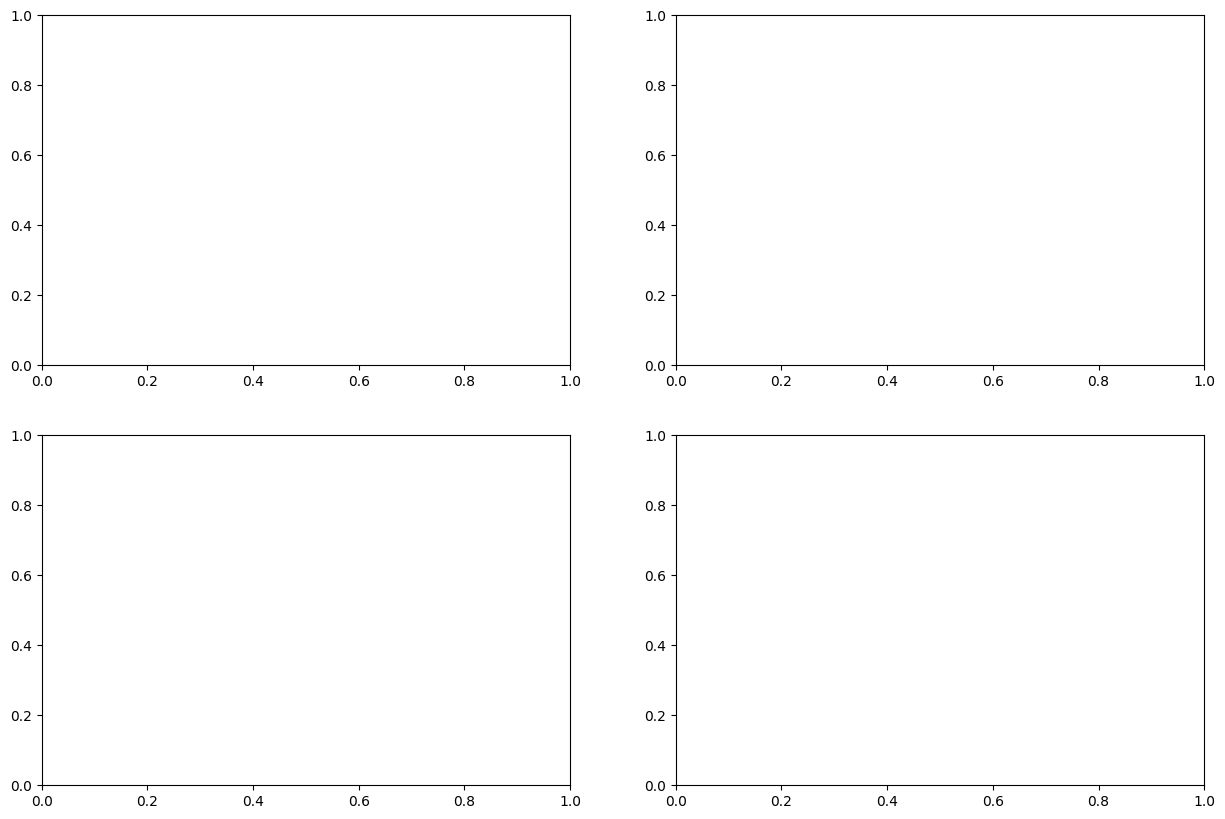

In [103]:
fig,ax=plt.subplots(len(random_col),2,figsize=(15,10))
for i,col in enumerate(random_col):
  #univariate of the columns
  dist=sns.distplot(df_energy[col],ax=ax[i,0])
  ax[i,0].axvline(df_energy[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(df_energy[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Appliance Energy
  #lineplot
  scatter=sns.lineplot(data=df_energy,x=col,y='Total Energy Consumption',color='orange',ax=ax[i,1]);

##### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.


* A line plot is also used to observe how numerical values change over time.

##### 2. What is/are the insight(s) found from the chart?

* distribution of random variables are symmetric
* two random variable has same distribution and similar relationship with appliance energy.It leads to multicolinearity and one should must be dropped in upcoming steps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It has no impact on buisness.

#### Temperature vs Humidity

In [104]:
# create list of temperature and humidity
temperature_col=temp_cols.copy()
temperature_col.append('temp_out')
humidity_col=hu_cols.copy()
humidity_col.append('out_humidity')
# zip the list
temp_hum=list(zip(temperature_col,humidity_col))

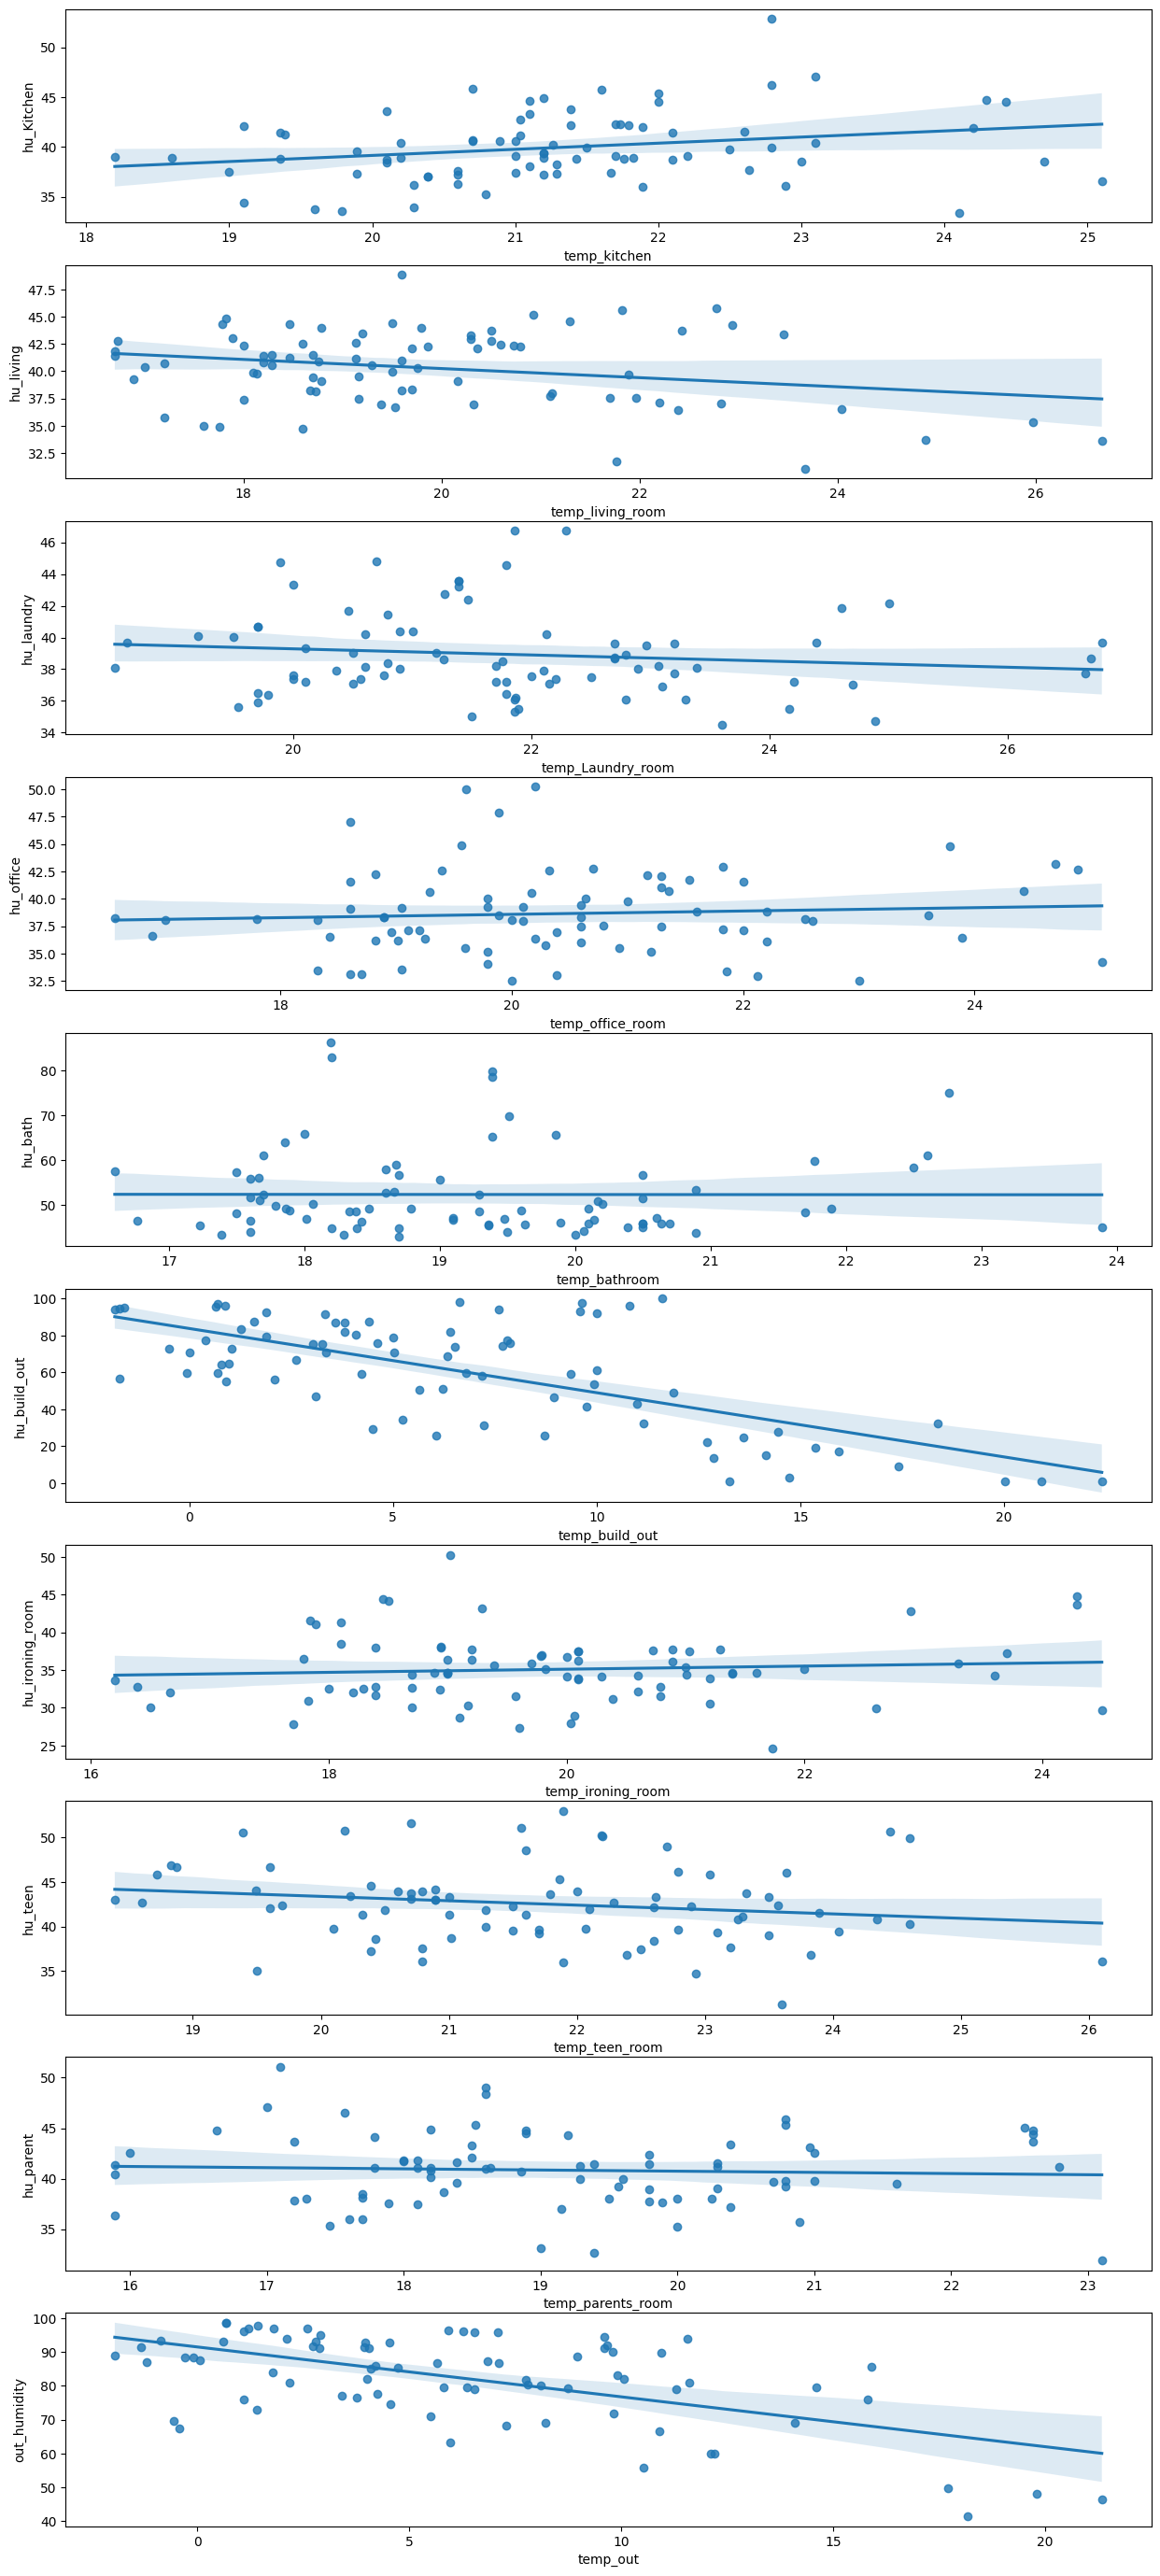

In [105]:
#plot temperature humidity relationship
fig,ax=plt.subplots(len(temp_hum),1,figsize=(15,35))
for i,cols in enumerate(temp_hum):
  sns.regplot(x=df_energy[cols[0]],y=df_energy[cols[1]],ax=ax[i])

##### 1. Why did you pick the specific chart?

Regplot method is used to plot data and a linear regression model fit. we can observe if the feature can fit with regression problem.

##### 2. What is/are the insight(s) found from the chart?

* Outside temperature and humidity,teen temperature and humidity,outside building temperature and humidity,living room temperature and humidity has strong negative linear relationship.
* Others temperature humidity relationship has  mild negative linear relationship.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These relationships might be leads to multicoliearity.

#### Chart - 14 - Correlation Heatmap

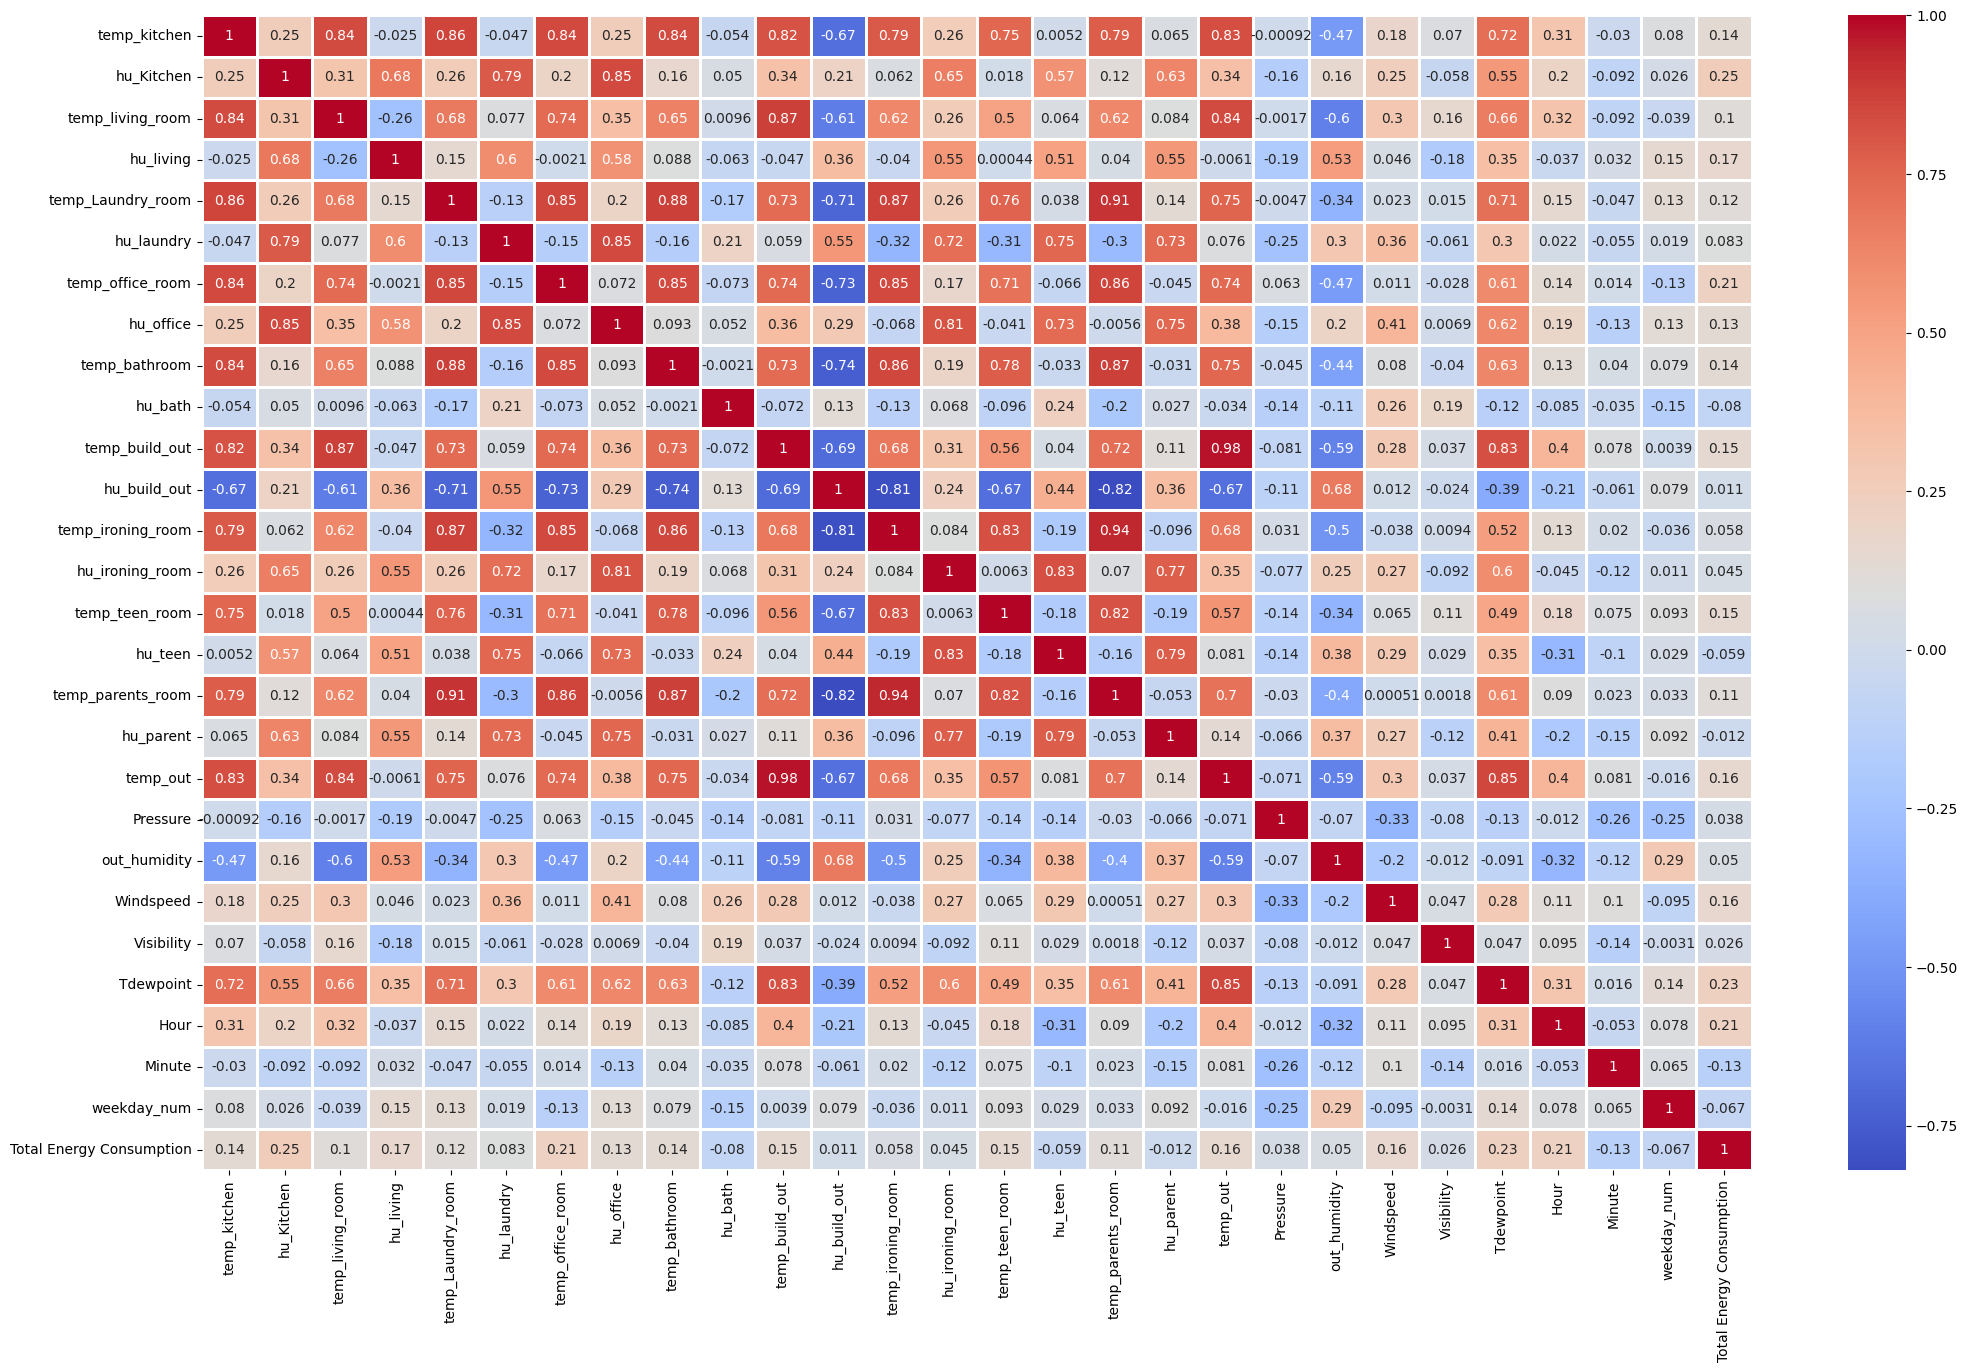

In [106]:
# Correlation Heatmap visualization code
plt.figure(figsize=(25,15))
correlation = df_energy.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm',linewidth=0.8)
plt.show()

##### 1. Why did you pick the specific chart?

The main reasons for using the heat map are:

* Heatmaps provide a quick overview of critical web performance factors.

* Heatmaps are a visual way to understand numerical features.

* Heatmaps assist businesses in making informed decisions that benefit the bottom line.

* It also aids in comprehending multicollinearity, which allows us to determine which features to keep and which to eliminate or combine.


##### 2. What is/are the insight(s) found from the chart?

* Temprature columns : It is clear from the heatmap that four columns have a high degree of correlation with parent_room_temperature that are temp_Laundry_room,temp_bathroom,temp_ironing_room,temp_teen_room also temp_build_out & temp_out has high correlation. Hence temp_build_out & temp_parents_room is to be removed from training set as information provided by them can be provided by other features.
* Humidity columns : For each and every humidity columns, we see moderate correlation which is workable.
* Weather_columns: Visibility, Tdewpoint, Press_mm_hg have low correlation values
* Random variables column : Similar to the trend that we have seen in the weather columns we have low correlations

#### Chart - 15 - Pair Plot of Temperature Columns

<Figure size 2500x2500 with 0 Axes>

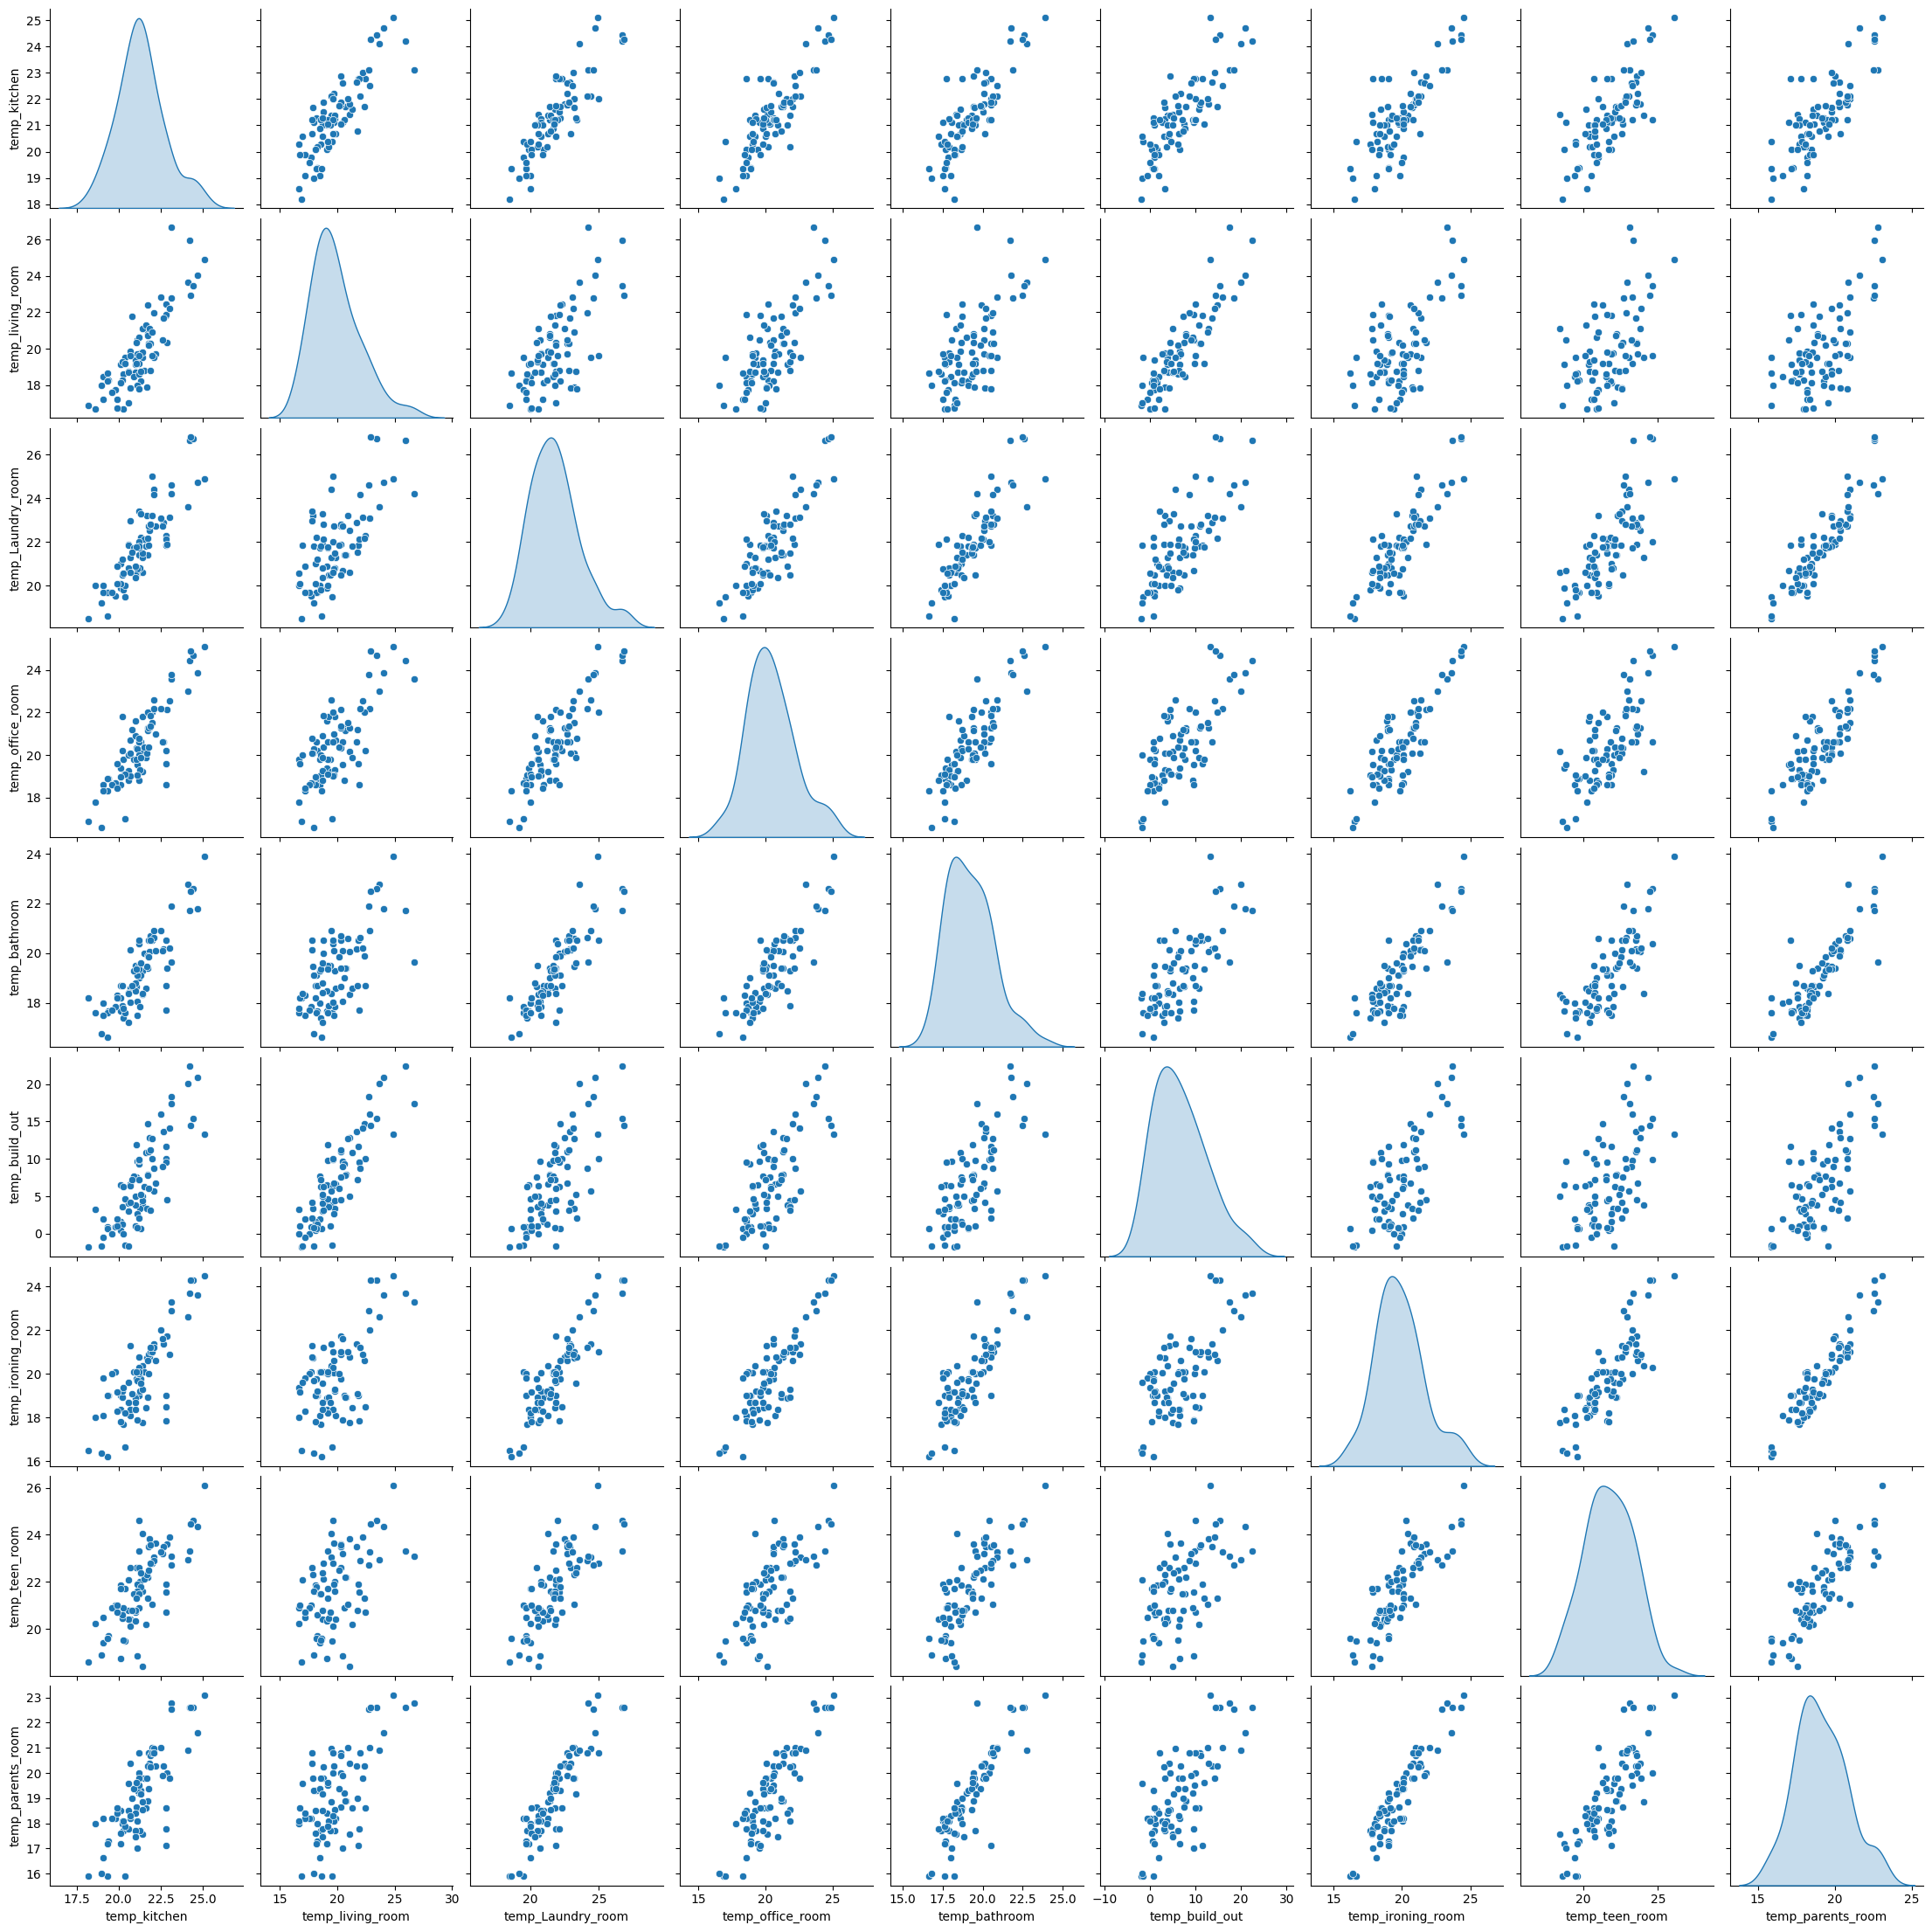

In [107]:
# Pair Plot visualization code


plt.figure(figsize=(25,25))
pair=sns.pairplot(df_energy[temp_cols], diag_kind='kde')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is a data visualisation that plots pair-wise relationships between all the variables in a dataset. This helps to better understand the relationships visually.

##### 2. What is/are the insight(s) found from the chart?

* All Temperature has linear relationship with each other
* 'temperature of parents_room' with laundry room,bathroom,ironing room,teen room temperature has strong linear relationship.

#### Chart - 15 - Pair Plot of Humidity Columns

<Figure size 2500x2500 with 0 Axes>

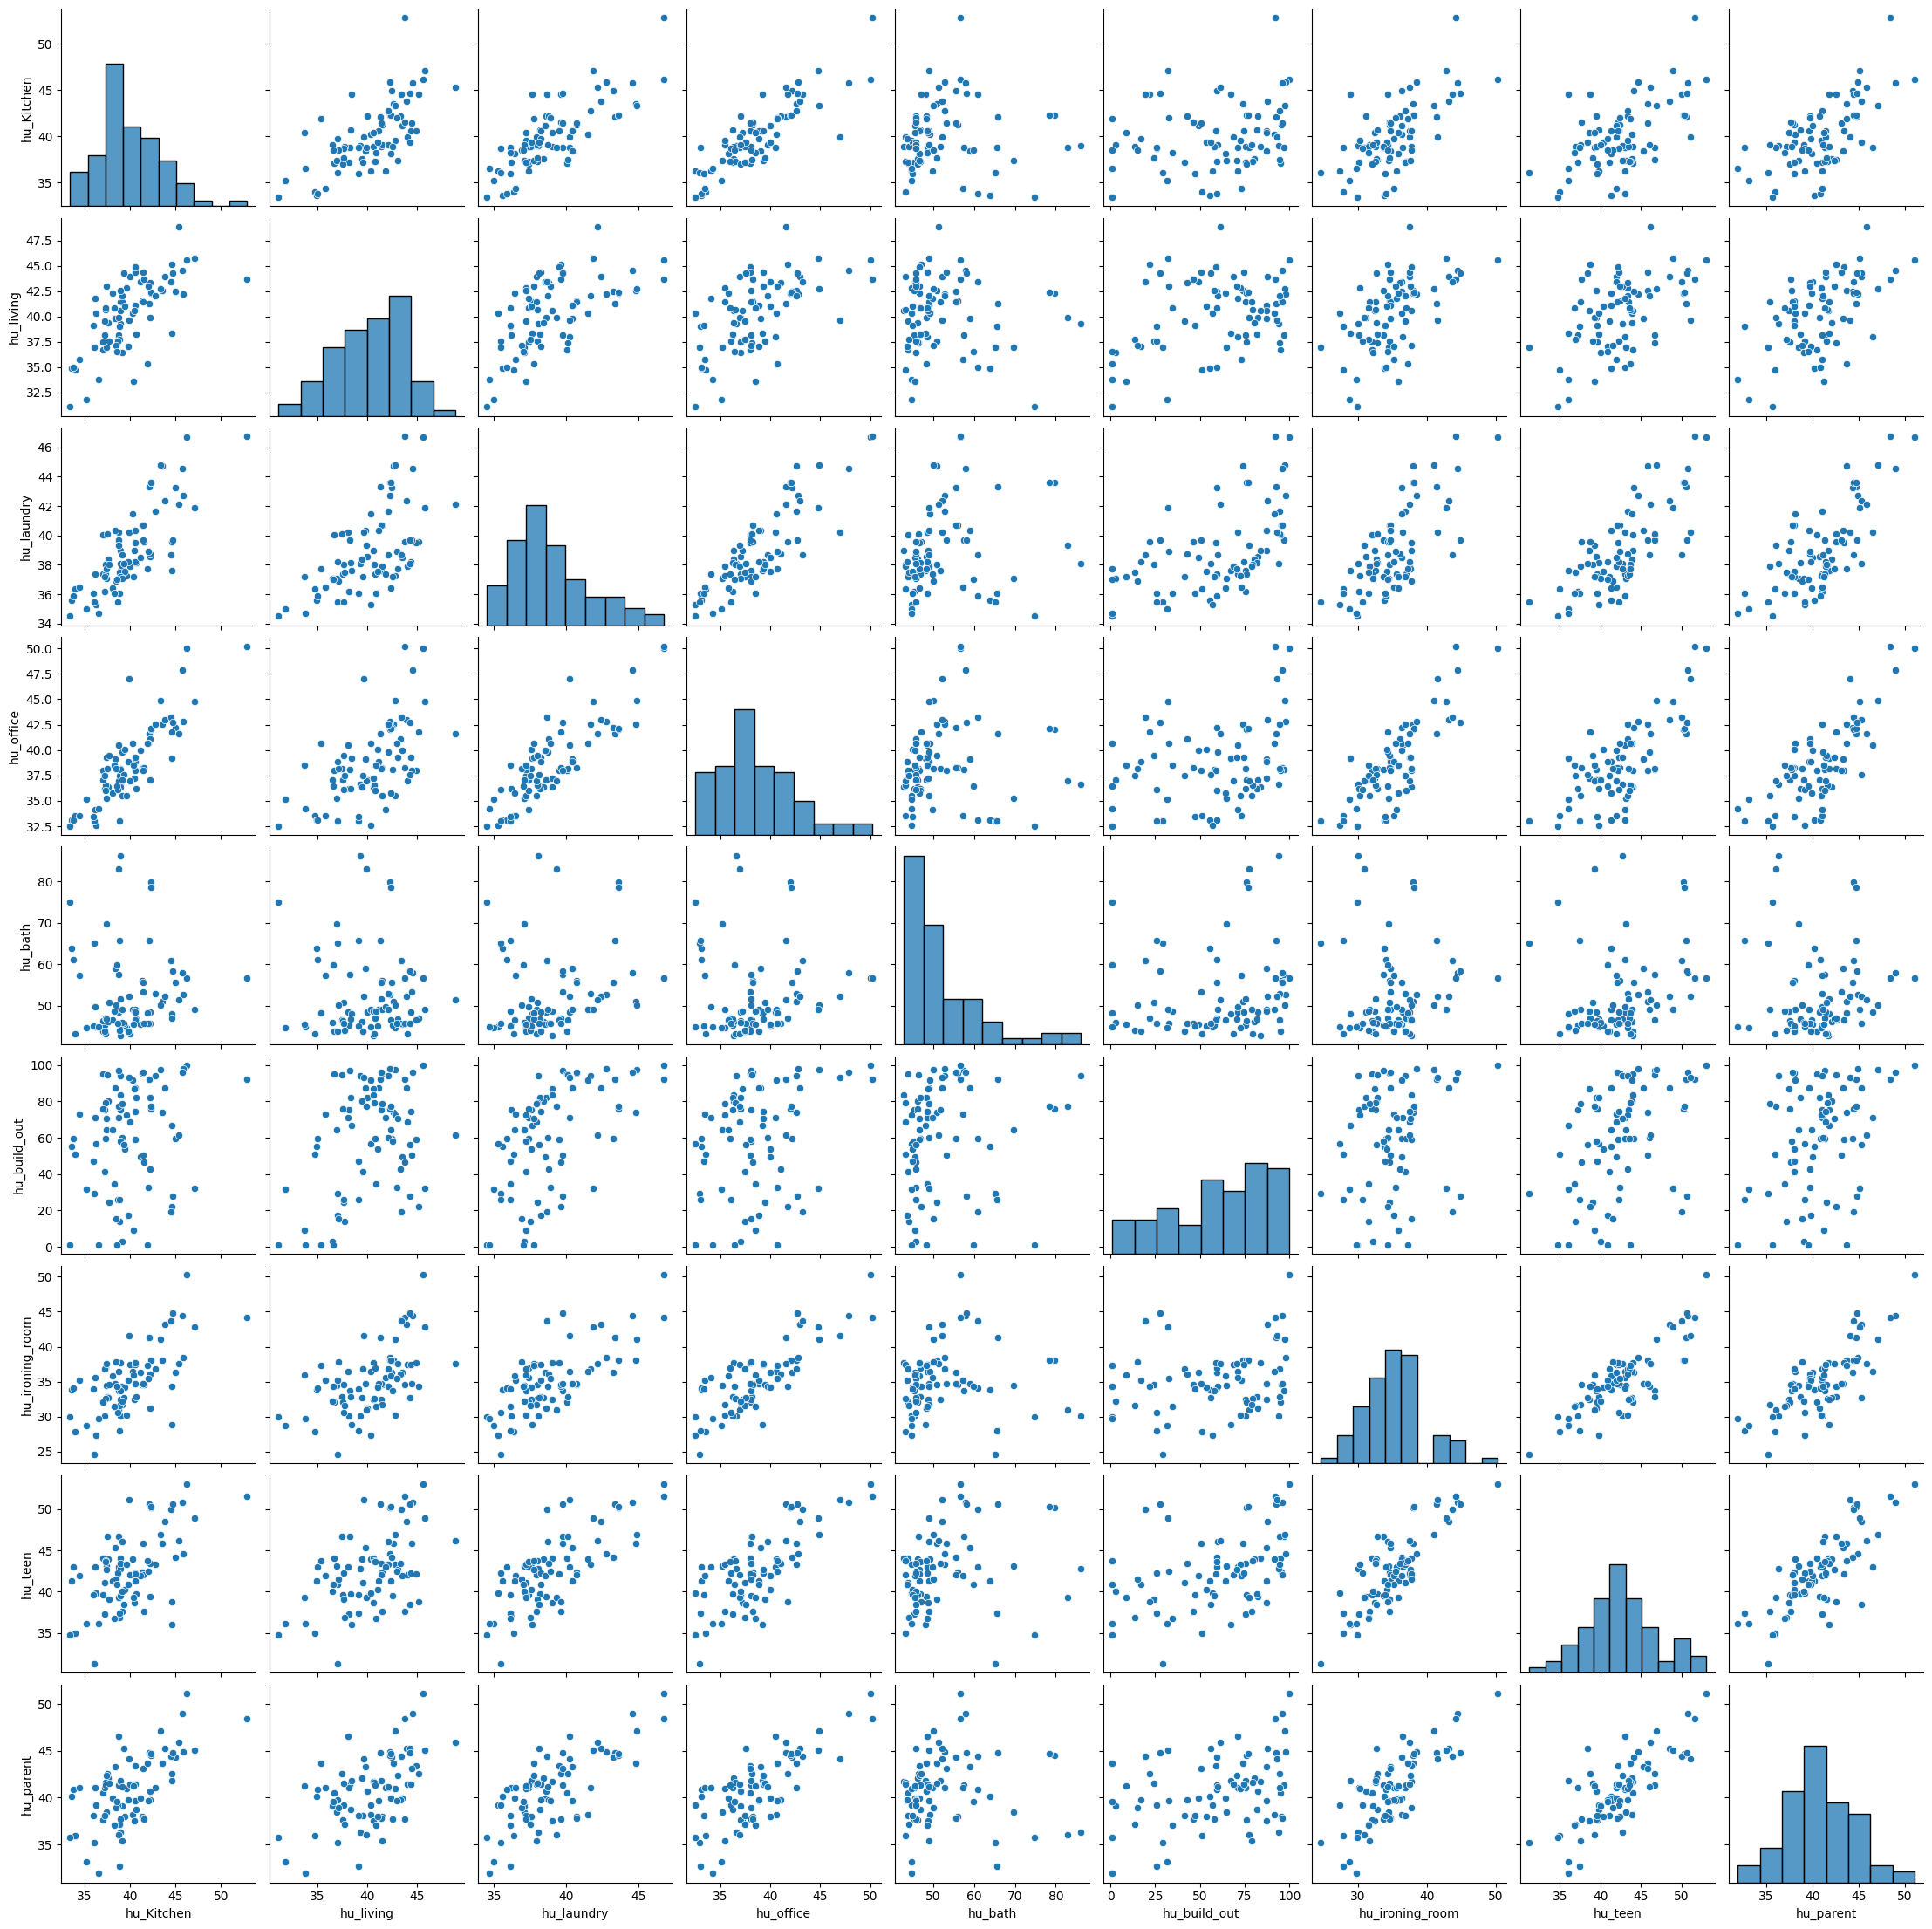

In [108]:
# Pair Plot visualization code


plt.figure(figsize=(25,25))
pair=sns.pairplot(df_energy[hu_cols], diag_kind='hist')
plt.show()

#####  What is/are the insight(s) found from the chart?

* All humidity columns have linear relationship with each other except outside building humidity and bathroom relationship.
* Humidity columns may be lead to multicolinearity.It will be treated upcoming steps.

#### Chart - 15 - Pair Plot of Weather Columns

In [110]:
# Pair Plot visualization code


plt.figure(figsize=(25,25))
pair=sns.pairplot(df_energy[weather_cols], diag_kind='kde')
plt.show()

KeyError: "['Press_mm_hg'] not in index"

<Figure size 2500x2500 with 0 Axes>

#####  What is/are the insight(s) found from the chart?

* Temperature and Humidity has negative linear relationship
* Temperature and Tdewpoint has positive linear relationship
* Temperature may be leads into multicolinearity.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.  There is no change in appliance energy consumption on weekdays and weekend.

2. There is no significant difference in the energy consumption for appliances between day and night.

3. The mean temperature in kitchen is greater than normal room temperature.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null** :- There is no change in appliance energy consumption on weekdays and weekend

**Alternate** :- There is higher appliances energy consumption on weekends as compared to weekdays.

#### 2. Perform an appropriate statistical test.

In [112]:
# Perform Statistical Test to obtain P-Value


data_weekday = df_energy[df_energy['weekday_num'] <= 5][['Total Energy Consumption']]
data_weekend = df_energy[df_energy['weekday_num'] > 5][['Total Energy Consumption']]

#Statistics Test and P-value
t_stat, p_val = stats.ttest_ind(data_weekday, data_weekend, equal_var=True)

print('T-Statistics value', t_stat)
print("P-Value", p_val)

T-Statistics value [1.24867459]
P-Value [0.21551893]


##### Which statistical test have you done to obtain P-Value?

The independent two-sample t-test is the statistical test used to calculate the P-value here.

##### Why did you choose the specific statistical test?

The specific statistical test was chosen because it is appropriate to compare the means of two separate sets of numerical data, as is the case in this situation, which compares overall consumption on weekdays against weekends. Given that the data is continuous and regularly distributed, the t-test assumes that it follows a normal distribution. The equal_var parameter is set to True, assuming that the variances of the two groups are equal.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null:**- There is no significant difference in the  energy consumption for appliances between day and night.

**Alternate:**- There is a significant difference in the  energy consumption for appliances between day and night

#### 2. Perform an appropriate statistical test.

In [113]:
# Perform Statistical Test to obtain P-Value
data_day = df_energy[(df_energy['Hour'] >= 6) & (df_energy['Hour'] < 18)][['Total Energy Consumption']]
data_night=df_energy[(df_energy['Hour'] < 6) | (df_energy['Hour'] >= 18)][['Total Energy Consumption']]
#Statistics Test and P-value
t_stat, p_val = stats.ttest_ind(data_weekday, data_weekend, equal_var=True)

print('T-Statistics value', t_stat)
print("P-Value", p_val)

T-Statistics value [1.24867459]
P-Value [0.21551893]


##### Which statistical test have you done to obtain P-Value?

The independent two-sample t-test is the statistical test used to calculate the P-value here.

##### Why did you choose the specific statistical test?

The specific statistical test was chosen because it is appropriate to compare the means of two separate sets of numerical data, as is the case in this situation, which compares overall consumption on weekdays against weekends. Given that the data is continuous and regularly distributed, the t-test assumes that it follows a normal distribution. From the parameter we can say that, there is a significant difference in the energy consumption for appliances between day and night.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis:**  The mean temperature in kitchen is greater than normal room temperature.

**Alternate Hypothesis:**  The temperature in Kitchen is at max room temperature and it can not be above it.

#### 2. Perform an appropriate statistical test.

In [114]:
#collect the kitchen temperature
kitchen_rand= df_energy['temp_kitchen'].sample(1000)
N=len(kitchen_rand)
#mean of the sample
kitchen_rand_mean= kitchen_rand.mean()
#Normal room temperature
nrt = 20
# the standard deviation for population
std_pop = df_energy['temp_kitchen'].std()
# Perform Statistical Test to obtain P-Value

Z_stat = ((kitchen_rand_mean - nrt)/(std_pop/np.sqrt(N)))
print(f'Z_score is {Z_stat} ')

P_value=norm.cdf(Z_stat,0,1)
print(f'P_value is {P_value} ')


ValueError: Cannot take a larger sample than population when 'replace=False'

##### Which statistical test have you done to obtain P-Value?

I used the normal cumulative distribution function with the mean and standard deviation of a random sample to calculate the Z statistics for a particular proportion and then find its P_value.

##### Why did you choose the specific statistical test?

Z statistics provides precise values for testing the hypothesis. It is easily comparable to its critical levels.According the result null hypothesis can rejected.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [115]:
#find missing values
df_energy.isnull().sum()

temp_kitchen                0
hu_Kitchen                  0
temp_living_room            0
hu_living                   0
temp_Laundry_room           0
hu_laundry                  0
temp_office_room            0
hu_office                   0
temp_bathroom               0
hu_bath                     0
temp_build_out              0
hu_build_out                0
temp_ironing_room           0
hu_ironing_room             0
temp_teen_room              0
hu_teen                     0
temp_parents_room           0
hu_parent                   0
temp_out                    0
Pressure                    0
out_humidity                0
Windspeed                   0
Visibility                  0
Tdewpoint                   0
Hour                        0
Minute                      0
weekday_num                 0
Total Energy Consumption    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no null values in this Dataset.As a result, no imputation is required.

### 2. Handling Outliers

In [116]:
#copy the dataframe
df=df_energy.copy()
col_list=list(df.describe().columns)


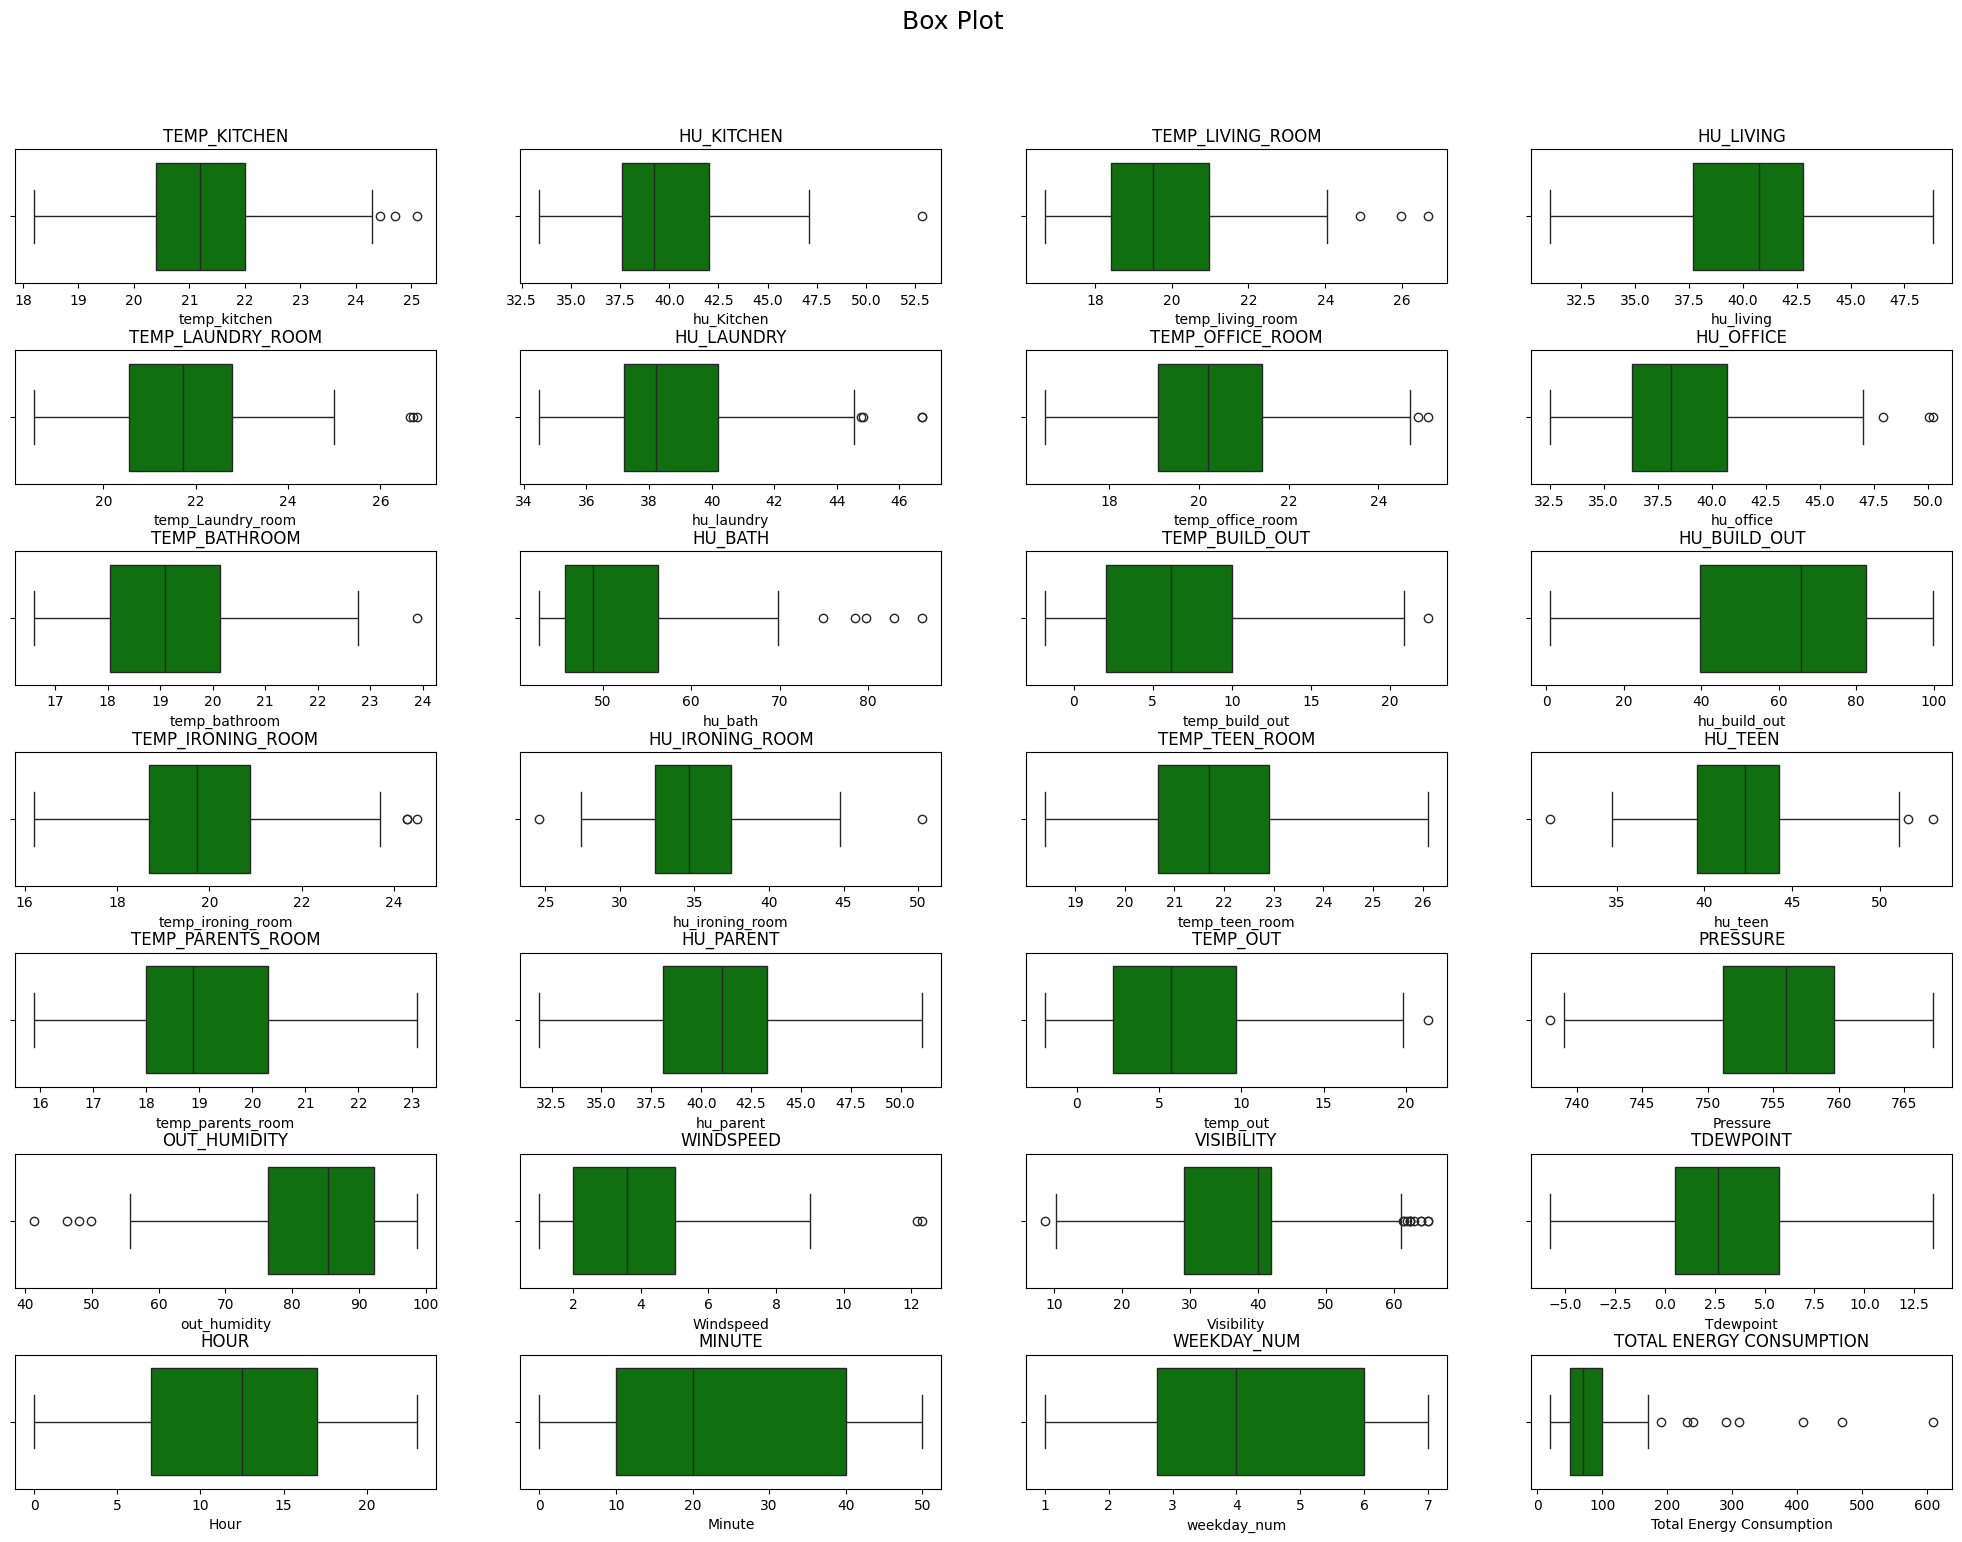

In [117]:
#find the columns have outlier with boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='g', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

**The majority of appliances use between 0 and 200 Wh of energy. It is apparent that many variables contain outliers.**

**Outliers can be found in all temperature column.**

**Outliers also exist in all humidity columns,Windspeed, Tdewpoint, Visibility, and the variable of interest Outliers exist in appliances as well.**

In [118]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df[ftr], 25)
  q_75 = np.percentile(df[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in df[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    df[ftr] =  df.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

temp_kitchen 

Percentiles: 25th=20.390, 75th=22.000, IQR=1.610

lower = 17.975 and upper = 24.415 
 
Identified outliers: 3
temp_kitchen Outliers Removed

-------

hu_Kitchen 

Percentiles: 25th=37.573, 75th=42.019, IQR=4.446

lower = 30.903125000000177 and upper = 48.68812499999977 
 
Identified outliers: 1
hu_Kitchen Outliers Removed

-------

temp_living_room 

Percentiles: 25th=18.420, 75th=20.973, IQR=2.553

lower = 14.591249999999684 and upper = 24.801250000000188 
 
Identified outliers: 3
temp_living_room Outliers Removed

-------

hu_living 

Percentiles: 25th=37.696, 75th=42.774, IQR=5.078

lower = 30.078333333333013 and upper = 50.391666666666914 
 
Identified outliers: 0

-------

temp_Laundry_room 

Percentiles: 25th=20.550, 75th=22.790, IQR=2.240

lower = 17.19000000000002 and upper = 26.149999999999828 
 
Identified outliers: 3
temp_Laundry_room Outliers Removed

-------

hu_laundry 

Percentiles: 25th=37.200, 75th=40.200, IQR=3.000

lower = 32.7 and upper = 44.7 
 
Iden

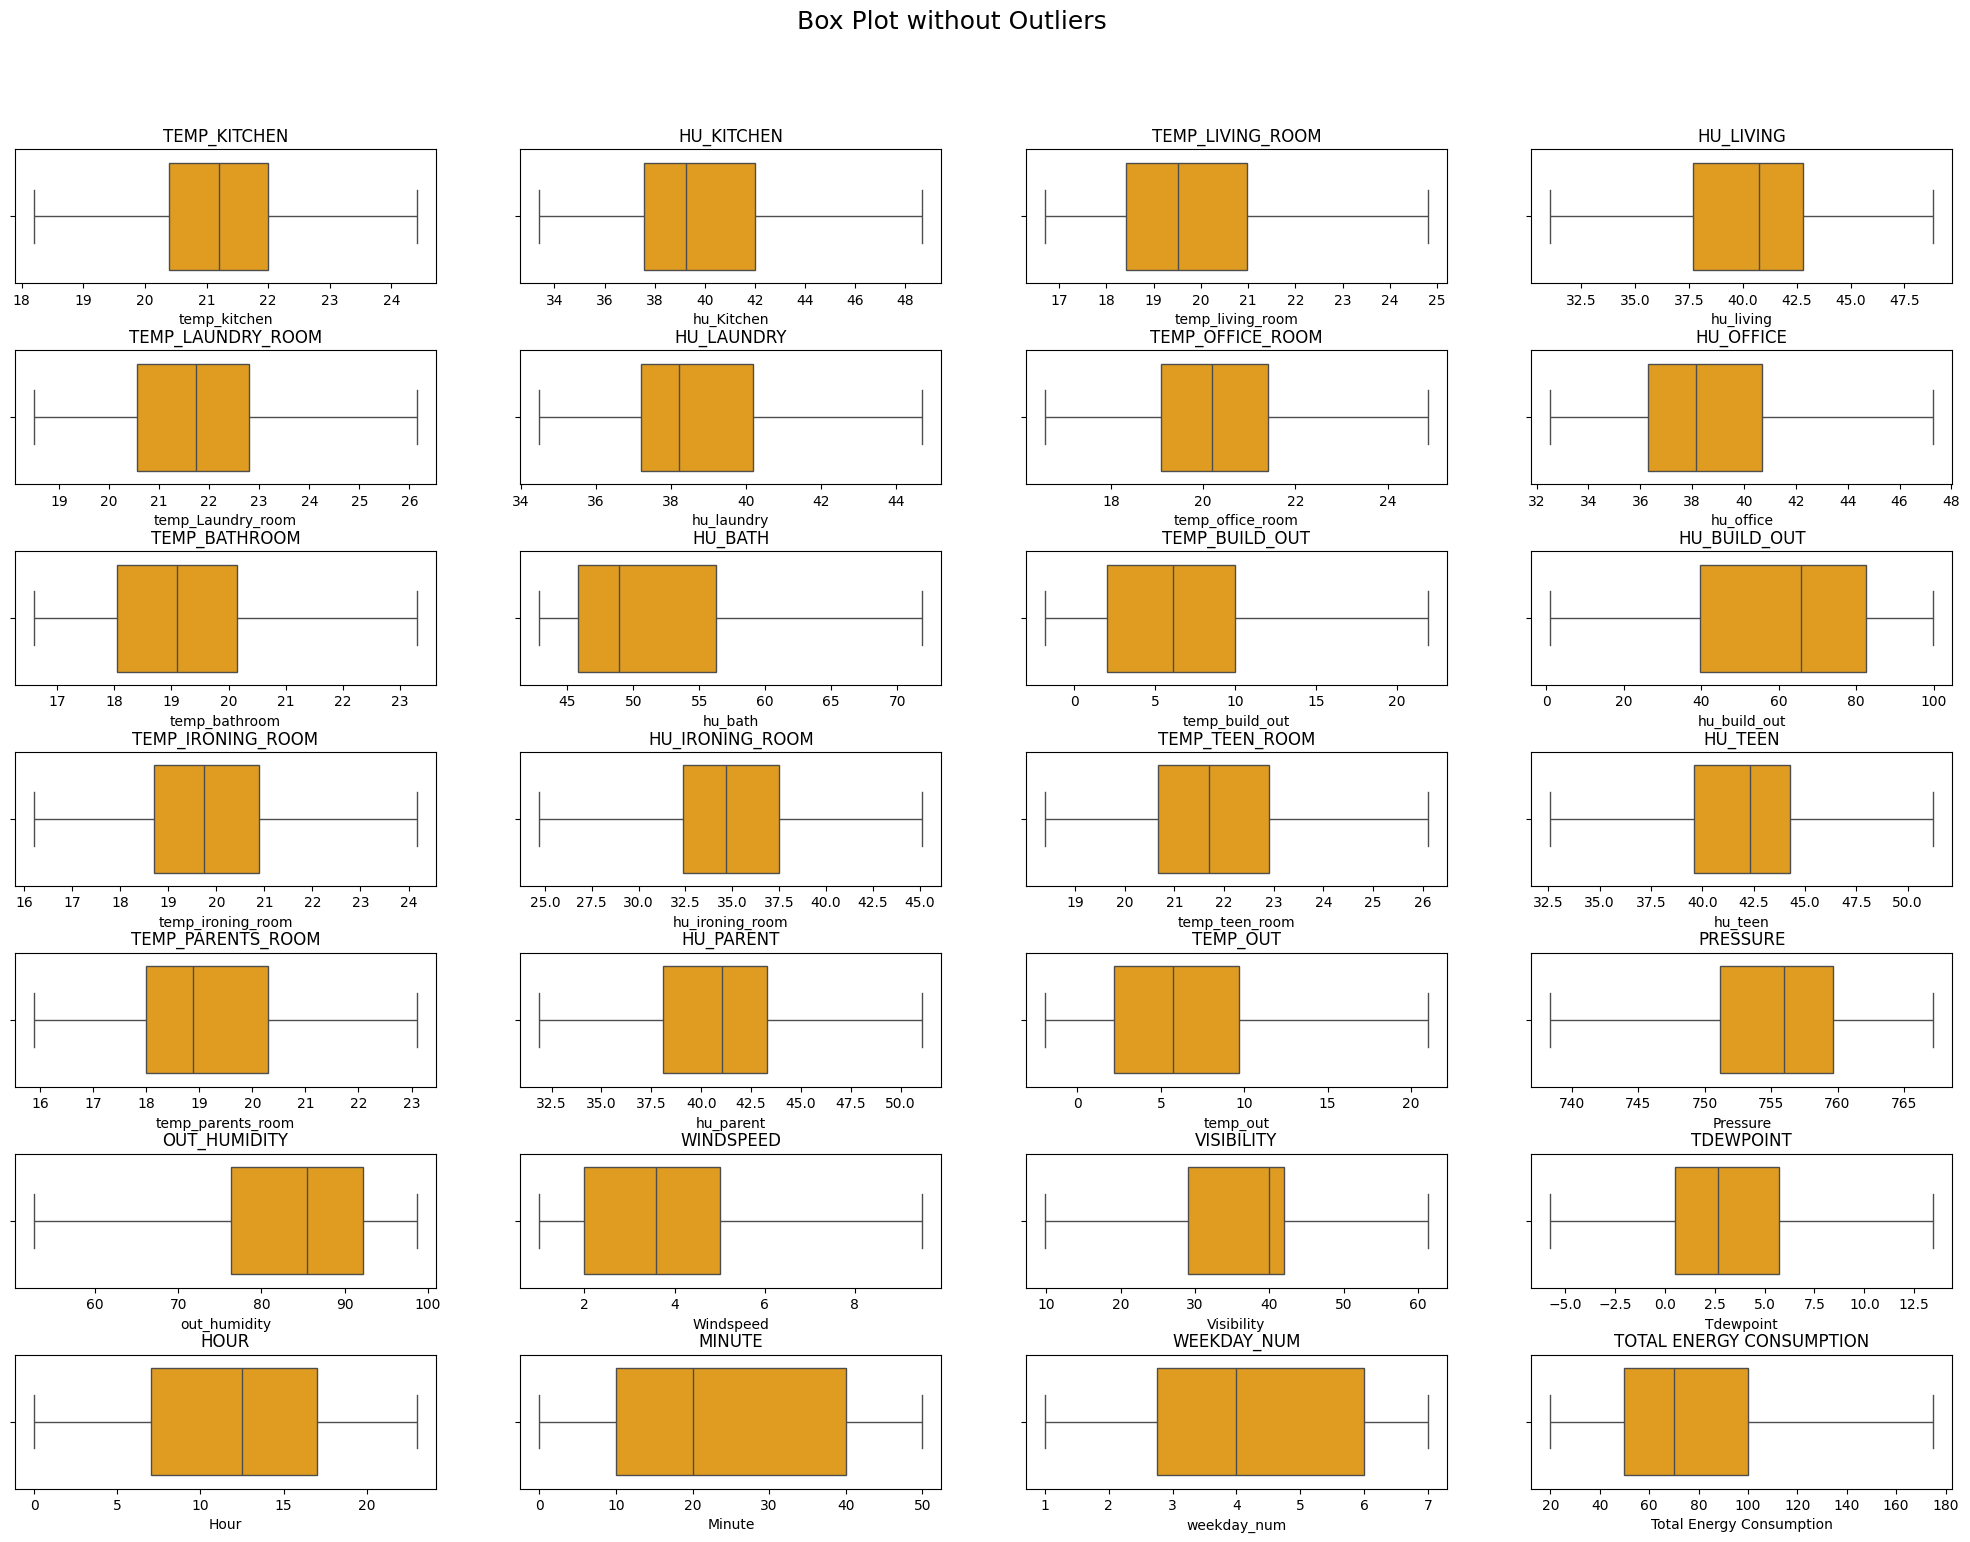

In [119]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='orange' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

##### What all outlier treatment techniques have you used and why did you use those techniques?

The box plot is a handy graphical depiction for describing the behaviour of data in the middle and at the ends of distributions. The box plot employs the median as well as the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, the difference (Q3 — Q1) is known as the interquartile range, or IQ. A box plot is made by drawing a box between the higher and lower quartiles and a solid line across the box to find the median. The following quantities (referred to as fences) are required for recognising extreme values in the distribution's tails:

lower fence: Q1–1.5*IQ

upper fence: Q3 + 1.5*IQ

### 3. Categorical Encoding

In [120]:
#check again types of all features
df.dtypes

temp_kitchen                float64
hu_Kitchen                  float64
temp_living_room            float64
hu_living                   float64
temp_Laundry_room           float64
hu_laundry                  float64
temp_office_room            float64
hu_office                   float64
temp_bathroom               float64
hu_bath                     float64
temp_build_out              float64
hu_build_out                float64
temp_ironing_room           float64
hu_ironing_room             float64
temp_teen_room              float64
hu_teen                     float64
temp_parents_room           float64
hu_parent                   float64
temp_out                    float64
Pressure                    float64
out_humidity                float64
Windspeed                   float64
Visibility                  float64
Tdewpoint                   float64
Hour                          int32
Minute                        int32
weekday_num                   int64
Total Energy Consumption    float64
dtype: object

#### What all categorical encoding techniques have you used & why did you use those techniques?

There are no categorical features present in the dataset.So any categorical encoding does not required

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

**There are no text columns in the given dataset which I am working on. So, Skipping this part**

#### 1. Expand Contraction

In [121]:
# Expand Contraction

#### 2. Lower Casing

In [122]:
# Lower Casing

#### 3. Removing Punctuations

In [123]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [124]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [125]:
# Remove Stopwords

In [126]:
# Remove White spaces

#### 6. Rephrase Text

In [127]:
# Rephrase Text

#### 7. Tokenization

In [128]:
# Tokenization

#### 8. Text Normalization

In [129]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [130]:
# POS Taging

#### 10. Text Vectorization

In [131]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [132]:
#Manipulate Features to minimize feature correlation
# create new features
# create a column average building temperature based on all temperature
df['Average_building_Temperature']=df[['temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','temp_ironing_room','temp_teen_room','temp_parents_room']].mean(axis=1)
#create a column of difference between outside and inside temperature
df['Temperature_difference']=abs(df['Average_building_Temperature']-df['temp_build_out'])

#create a column average building humidity
df['Average_building_humidity']=df[['hu_Kitchen','hu_living','hu_laundry', 'hu_office','hu_bath','hu_ironing_room','hu_teen','hu_parent']].mean(axis=1)
#create a column of difference between outside and inside building humidity
df['Humidity_difference']=abs(df['hu_build_out']-df['Average_building_humidity'])


#### 2. Feature Selection

Firstly, we are going to drop two random variable column because they have no part in energy prediction.After that we will check multicolinearity among remaining columns.

In [133]:
#drop rv1 and rv2
df.drop('rv1',axis=1,inplace=True)
df.drop('rv2',axis=1,inplace=True)

KeyError: "['rv1'] not found in axis"

**Checking Multicollinearity**

In [134]:

#create a function to check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]

    return(vif)

In [136]:
#check multicolinearuty
calc_vif(df[[i for i in df.describe().columns if i not in ['Total Energy Consumption']]]).sort_values(by='VIF',ascending=False)

variables      VIF
0                   temp_kitchen      inf
12             temp_ironing_room      inf
29     Average_building_humidity      inf
28        Temperature_difference      inf
27  Average_building_Temperature      inf
17                     hu_parent      inf
16             temp_parents_room      inf
1                     hu_Kitchen      inf
14                temp_teen_room      inf
13               hu_ironing_room      inf
15                       hu_teen      inf
4              temp_Laundry_room      inf
9                        hu_bath      inf
8                  temp_bathroom      inf
7                      hu_office      inf
6               temp_office_room      inf
5                     hu_laundry      inf
10                temp_build_out      inf
2               temp_living_room      inf
3                      hu_living      inf
19                      Pressure  3796.65
20                  out_humidity  1785.52
18                      temp_out   406.18
23                     Tdewpoint   187.62
11                  hu_build_out   115.37
30           Humidity_difference    27.60
22                    Visibility    17.26
24                          Hour    13.09
26                   weekday_num    11.71
21                     Windspeed     9.79
25                        Minute     3.76

It's look like lots of column is replica of one another.so we are going to remove atleast half of them

In [ ]:
#check Multicolinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature']]]).sort_values(by='VIF',ascending=False)

variables      VIF
8                 Press_mm_hg  1989.63
5           temp_parents_room  1968.13
17  Average_building_humidity  1611.76
1           temp_ironing_room  1606.03
9                out_humidity  1281.80
3              temp_teen_room   908.20
4                     hu_teen   717.19
6                   hu_parent   677.89
2             hu_ironing_room   537.52
7                    temp_out   391.28
16     Temperature_difference   138.14
12                  Tdewpoint   129.67
13                      month    74.18
0                hu_build_out    50.26
11                 Visibility    14.74
18        Humidity_difference     8.54
15                       hour     7.09
10                  Windspeed     5.41
14                    weekday     3.38

Let's remove,lights 'temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity'and check again.

In [ ]:
#check Multicolinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity']]]).sort_values(by='VIF',ascending=False)

variables     VIF
3                  hu_teen  474.39
4                hu_parent  463.37
2           temp_teen_room  404.37
1          hu_ironing_room  371.97
12  Temperature_difference  121.07
5                 temp_out   67.72
9                    month   48.42
0             hu_build_out   38.87
8                Tdewpoint   14.51
7               Visibility   14.33
13     Humidity_difference    8.17
11                    hour    5.45
6                Windspeed    5.32
10                 weekday    3.29

Now remove 'hu_teen','hu_parent','temp_teen_room','hu_ironing_room' and check again.

In [ ]:
#check Multicolinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity','hu_teen','hu_parent','temp_teen_room','hu_ironing_room']]]).sort_values(by='VIF',ascending=False)

variables    VIF
8  Temperature_difference  51.12
5                   month  35.66
0            hu_build_out  31.07
1                temp_out  28.82
3              Visibility  13.73
4               Tdewpoint  11.12
9     Humidity_difference   7.41
2               Windspeed   5.08
7                    hour   4.44
6                 weekday   3.21

Now remove Temperature_diffrence and check again.

In [ ]:
#check Multicolinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity','hu_teen','hu_parent','temp_teen_room','hu_ironing_room','Temperature_difference','Visibility']]]).sort_values(by='VIF',ascending=False)

variables    VIF
1             temp_out  24.40
0         hu_build_out  10.08
3            Tdewpoint   7.87
4                month   7.33
7  Humidity_difference   7.19
2            Windspeed   5.00
6                 hour   4.15
5              weekday   3.20

Now remove temp_out and visibility and check again.

In [ ]:
#check Multicolinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Appliances','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity','hu_teen','hu_parent','temp_teen_room','hu_ironing_room','Temperature_difference','temp_out','Visibility']]]).sort_values(by='VIF',ascending=False)

variables   VIF
6  Humidity_difference  5.35
0         hu_build_out  5.09
3                month  4.73
1            Windspeed  3.72
5                 hour  3.61
4              weekday  3.18
2            Tdewpoint  2.40

In [ ]:
# Select your features wisely to avoid overfitting
#df_removed=df[[i for i in df.describe().columns if i not in ['rv2','lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity','hu_teen','hu_parent','temp_teen_room','hu_ironing_room','Temperature_difference','hu_build_out','Visibility']]]

#df_removed.head()

In [ ]:
# Select your features wisely to avoid overfitting
df_removed=df[[i for i in df.describe().columns if i not in ['lights','temp_kitchen','temp_living_room','temp_Laundry_room','temp_office_room','temp_bathroom','hu_Kitchen','hu_living','hu_laundry','hu_office','hu_bath','temp_build_out','Average_building_Temperature','Press_mm_hg','temp_parents_room','Average_building_humidity','temp_ironing_room','out_humidity','hu_teen','hu_parent','temp_teen_room','hu_ironing_room','Temperature_difference','temp_out','Visibility']]]

df_removed.head()

Appliances  hu_build_out  Windspeed  Tdewpoint  month  weekday  hour  \
0        60.0     84.256667   7.000000        5.3      1        0    17   
1        60.0     84.063333   6.666667        5.2      1        0    17   
2        50.0     83.156667   6.333333        5.1      1        0    17   
3        50.0     83.423333   6.000000        5.0      1        0    17   
4        60.0     84.893333   5.666667        4.9      1        0    17   

   Humidity_difference  
0            37.514167  
1            37.390625  
2            36.593750  
3            36.954583  
4            38.430417

##### What all feature selection methods have you used  and why?

I use Variance Inflation Factor(VIF) for feature selection.

The Variance Inflation Factor (VIF) is used to detect multicollinearity. Variance inflation factors (VIF) quantify how much the variance of predicted regression coefficients is inflated when the predictor variables are not linearly connected.

##### Which all features you found important and why?

In a multivariate regression model, multicollinearity exists when there is a correlation between many independent variables. Under ideal conditions, small VIF values, such as VIF< 10, suggest low correlation across variables. The VIF cutoff value is set to 10. Only variables having a VIF less than 10 will be included in the model.

According to above stated criteria, we have removed column one by one and check whether all the features vif value is less than 10 or not.Once all the vif value of features is below 10 then we stop the checking multicolinearity. Important features for the project that we have found are Appliances	hu_build_out	Windspeed	Tdewpoint	rv1	month	weekday	hour	Humidity_difference.

### 5. Data Transformation

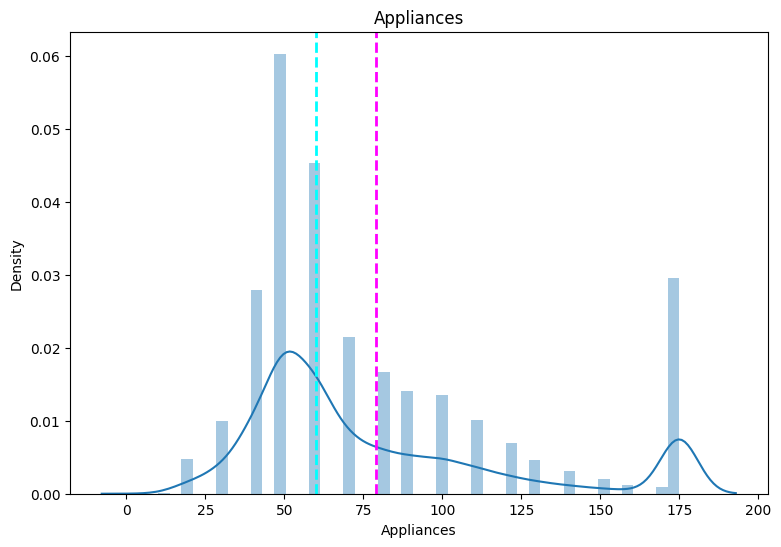

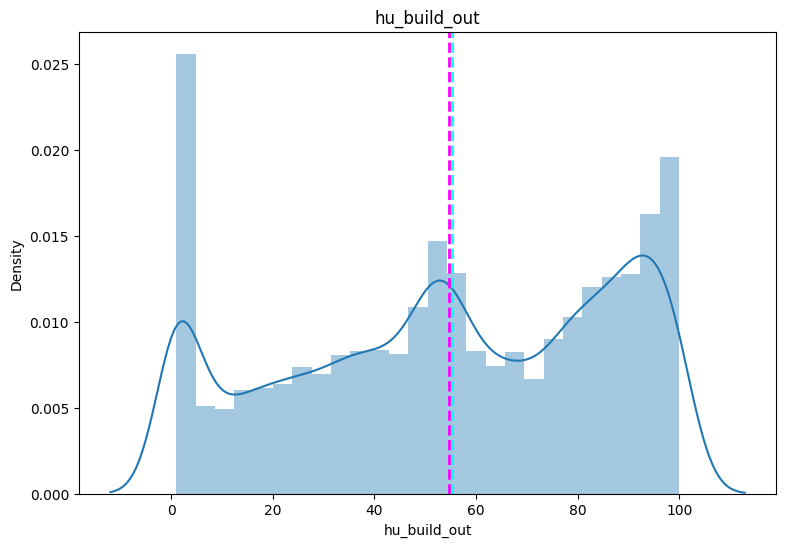

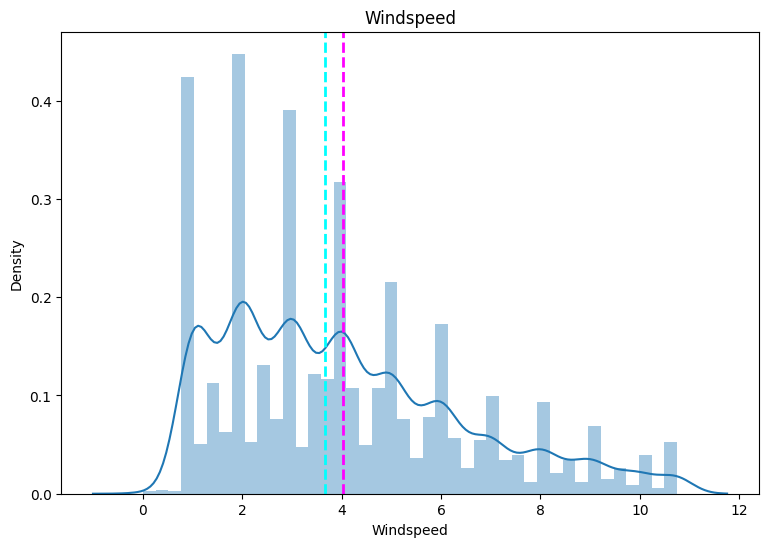

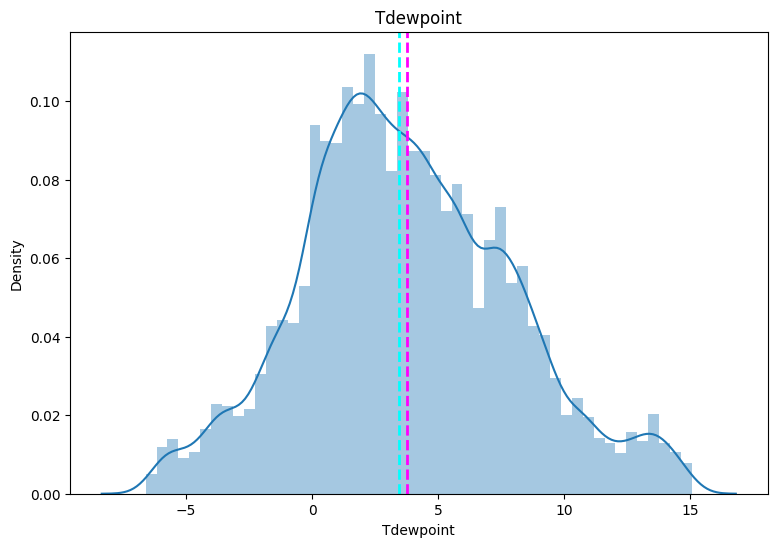

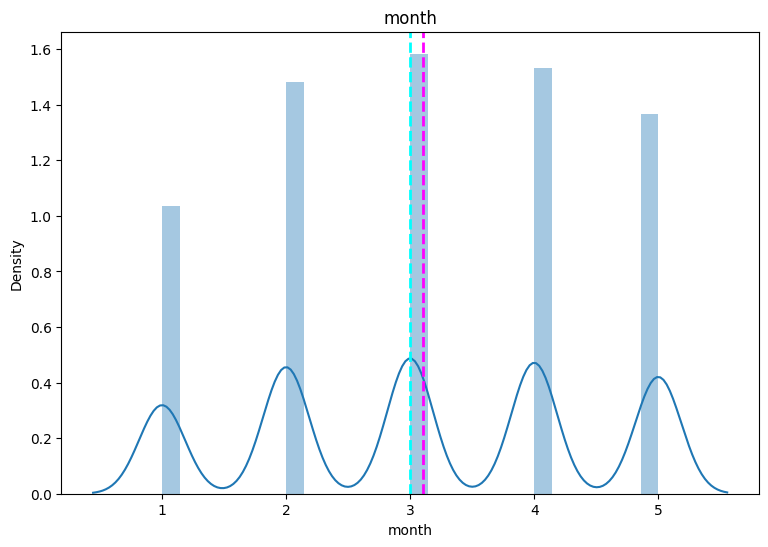

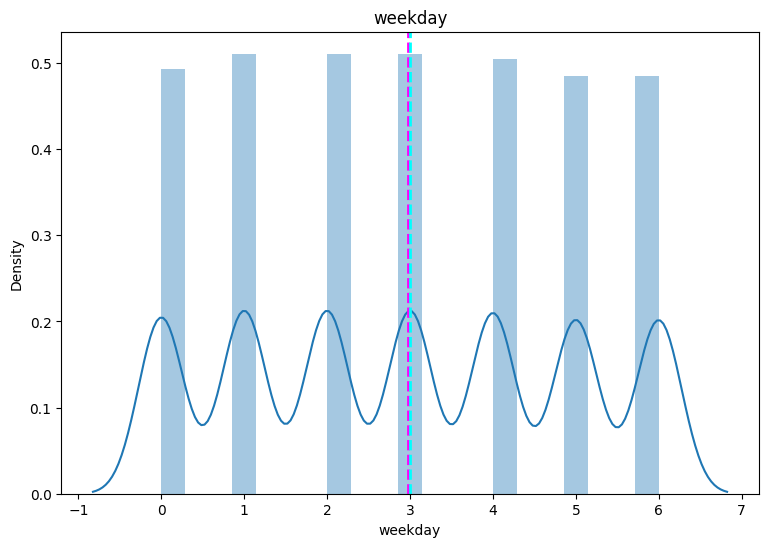

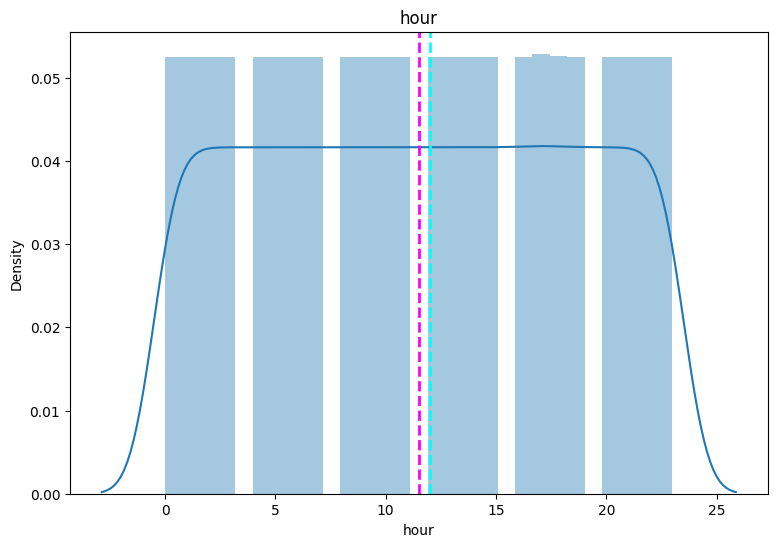

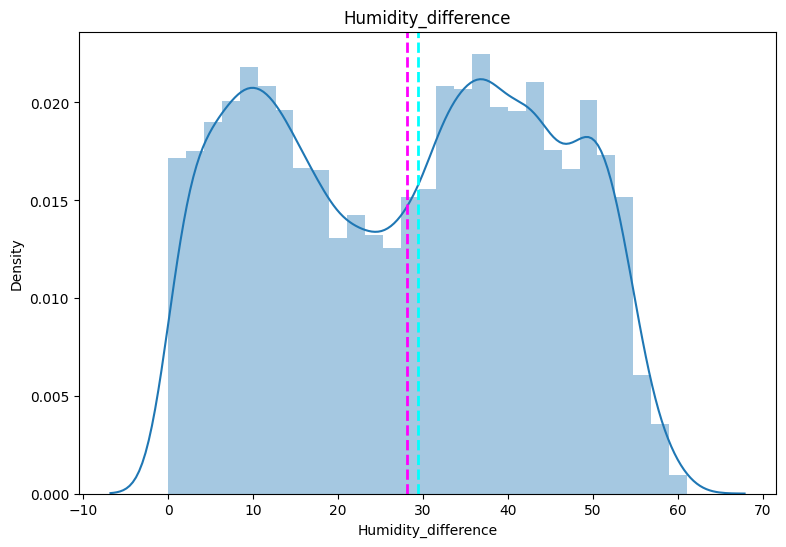

In [ ]:
#check distribution  of all independent features
for col in df_removed.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
from scipy.stats import boxcox
from scipy.stats import boxcox_normmax

# Determine the optimal lambda value for the Box-Cox transformation
optimal_lambda = boxcox_normmax(df_removed['Appliances'])

# Apply the Box-Cox transformation to the 'Appliances' column using the optimal lambda
df_removed['Appliances'] = boxcox(df_removed['Appliances'], optimal_lambda)


In [ ]:
# Transform Your data

df_removed['Windspeed']=df_removed['Windspeed'].apply(lambda x:np.log10(x+1))




Yes, i think Appliance and Windspeed features of the data need to be transformed,because they are skewd.We have use log transformation with them. Other features follwed normal distribution,symmetrical around y axis and some of them does not have any resemblace with normal distribution. They will be scalled in upcoming part.



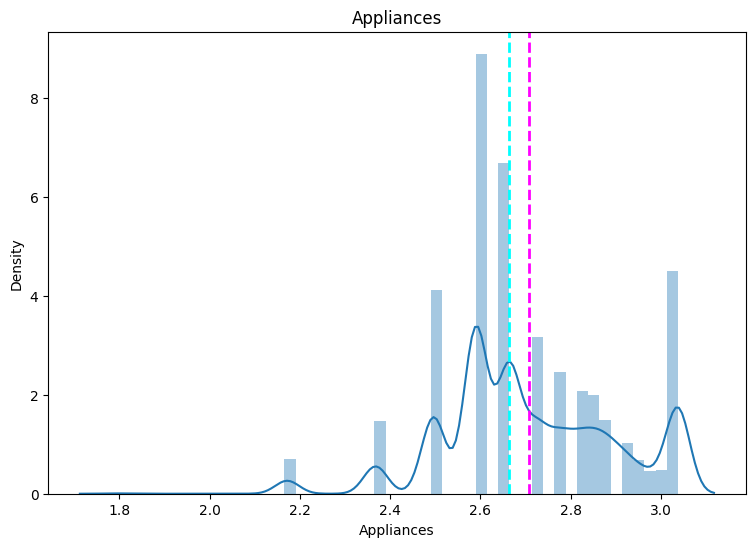

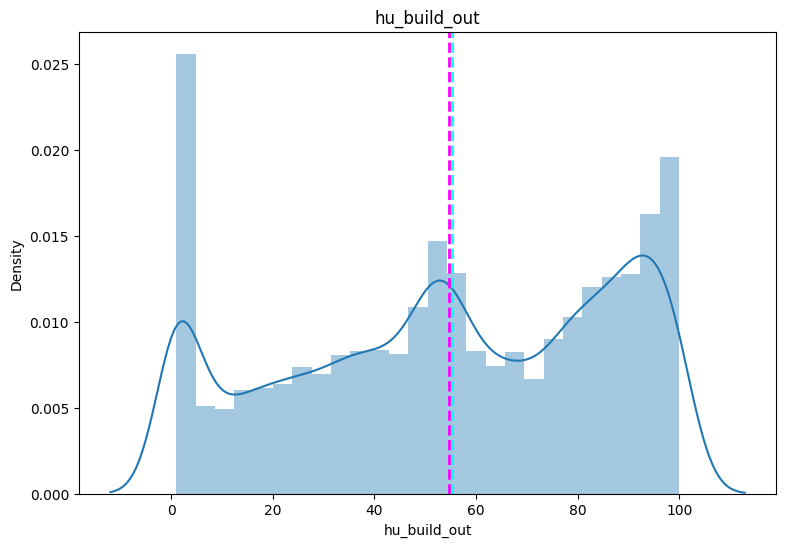

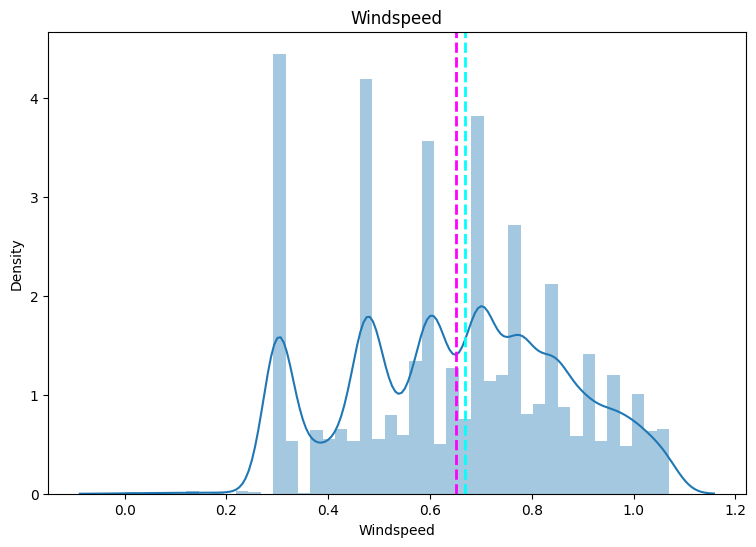

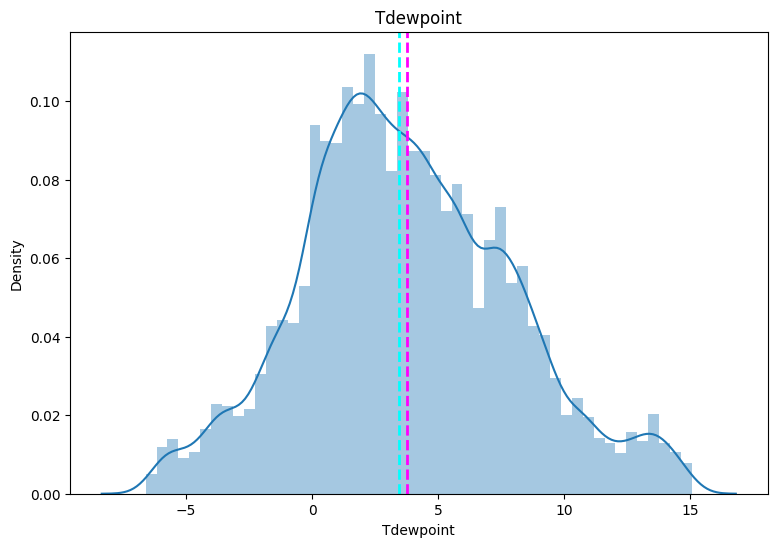

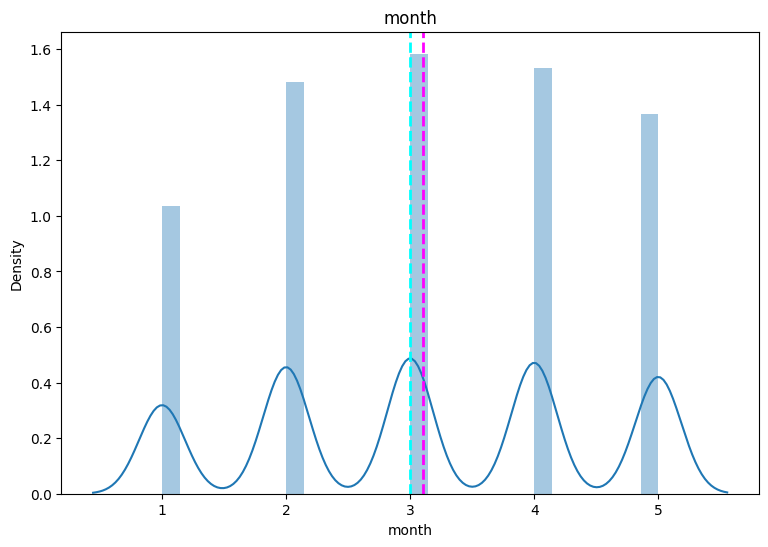

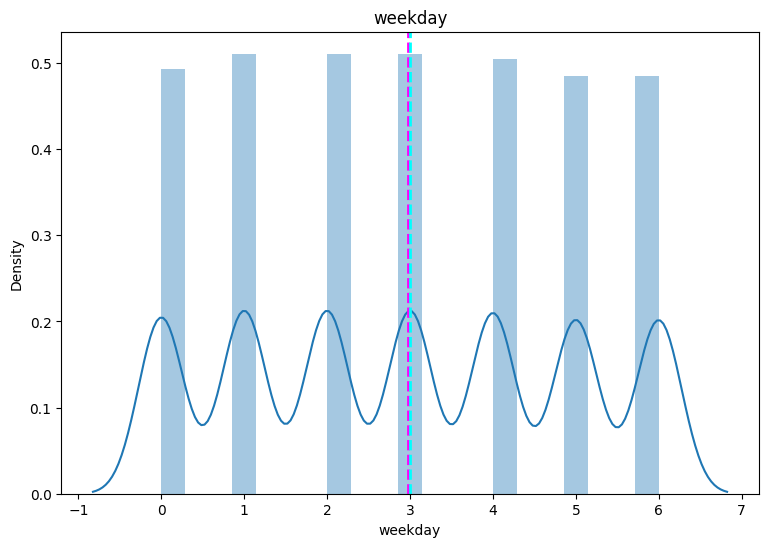

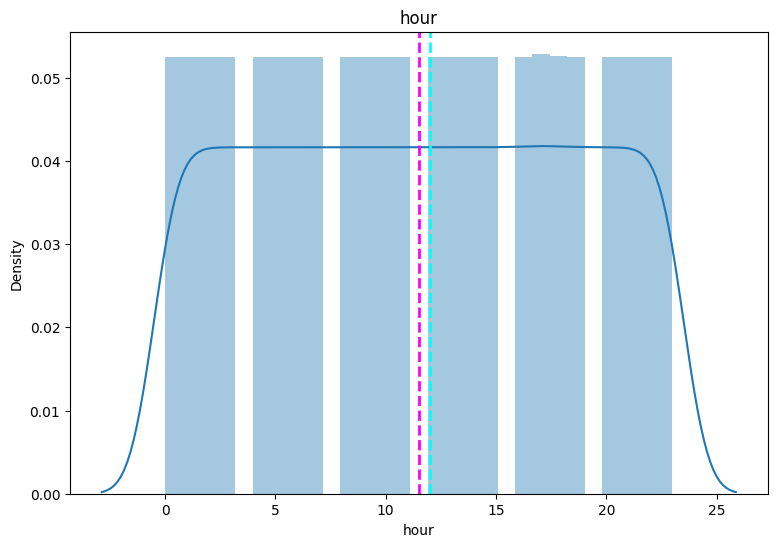

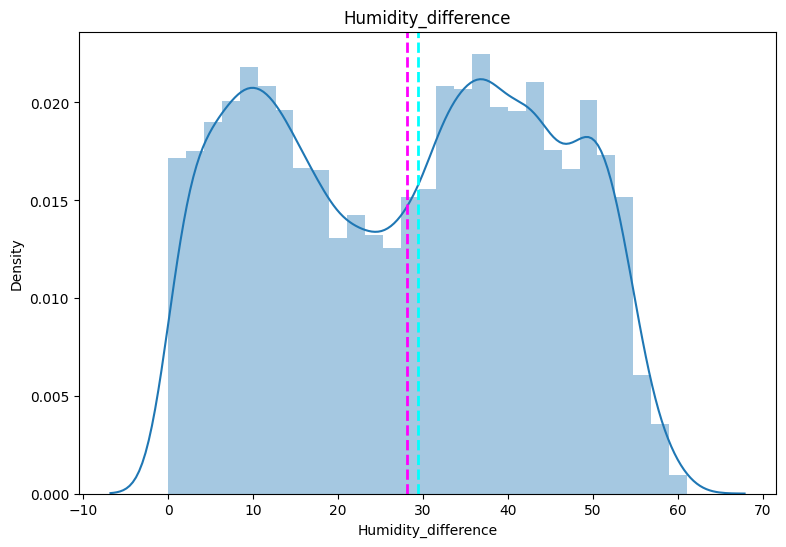

In [ ]:
# check the distribution of the features after transformation
for col in df_removed.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction, to the best of my knowledge, is not required for this dataset.

Essentially, where high dimensions are a problem or a specific point in the algorithm of dimension reduction.In this dataset no such problem is present according to my knoldege.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=df_removed.drop('Appliances',axis=1)
y=df_removed['Appliances']
X_train,X_test,y_train,y_test_=train_test_split(X,y,test_size=0.2,random_state=0)

##### What data splitting ratio have you used and why?

The code divides the data into training and testing sets using an 80:20 ratio. This indicates that 80% of the data is utilised to train the model, while 20% is used to test the model.

The ratio is determined by a number of parameters, including the size of the dataset, the complexity of the model, and the amount of computational resources available. In general, a larger training set produces a stronger model, but a smaller testing set produces a higher variance in performance measurements. An 80:20 ratio is an excellent choice since it balances the trade-off between having enough data to train the model and having enough data to evaluate the model's performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, this dataset is not imbalanced.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

### 6. Data Scaling

In [ ]:
# Scaling your data
# Scaling your data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled_ = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

The data is scaled using Min-Max scaling or normalisation, which scales the data to a range between 0 and 1.

This approach was chosen because it preserves the distribution of the data and the relationships between the features. Furthermore, many machine learning algorithms perform better with scaled data, particularly those that use distance-based metrics or optimisation functions. Scaling was done with Scikit-learn's MinMaxScaler function.

In [ ]:
#spearate two rows from test  set to check it with best model
X_test_best=X_test_scaled_[-2:]
y_test_best=y_test_[-2:]
X_test_scaled=X_test_scaled_[:-2]
y_test=y_test_[:-2]

In [ ]:
#check shape of all separated variables
print(X_test_best.shape)
print(y_test_best.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(2, 7)
(2,)
(3945, 7)
(3945,)


In [ ]:
x_test_scaled=X_test_scaled[:-2]
x_test_scaled.shape

(3943, 7)

## ***7. ML Model Implementation***

### ML Model - 1.Linear Regression

In [ ]:
# ML Model - 1 Implementation
#LinearRegresseion
lr=LinearRegression()
# Fit the LinearRegression
lr.fit(X_train_scaled,y_train)
#predict the target values of train data
lr_train=lr.predict(X_train_scaled)
# Predict the target values for the test data
y_pred_lr = lr.predict(X_test_scaled)
#Evaluate the model using
mse_lr_train=mean_squared_error(y_train,lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr)
r2_lr_train=r2_score(y_train,lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr)

print("LinearRegression Mean Squared Error:",mse_lr_test)
print("LinearRegression R^2 Score:",r2_lr_test)


##Ridge
ridge = Ridge()
# Fit the Ridge model
ridge.fit(X_train_scaled, y_train)
#predict the target values of train data
r_train=ridge.predict(X_train_scaled)
# Predict  values for the test data
y_pred_r = ridge.predict(X_test_scaled)
# Evaluate the model using metrics
mse_r_train=mean_squared_error(y_train,r_train)
mse_r_test =mean_squared_error(y_test, y_pred_r)
r2_r_train=r2_score(y_train,r_train)
r2_r_test = r2_score(y_test, y_pred_r)

print("Ridge Mean Squared Error:",mse_r_test)
print("Ridge R^2 Score:",r2_r_test)


#Lasso
lasso = Lasso()
# Fit the Lasso model on the training data
lasso.fit(X_train_scaled, y_train)
#predict the target values of train data
l_train=ridge.predict(X_train_scaled)
# Predict the target values for the test data
y_pred_l = lasso.predict(X_test_scaled)
# Evaluate the model using metrics
mse_l_train=mean_squared_error(y_train,l_train)
mse_l_test = mean_squared_error(y_test, y_pred_l)
r2_l_train=r2_score(y_train,l_train)
r2_l_test = r2_score(y_test, y_pred_l)

print("Lasso Mean Squared Error:",mse_l_test)
print("Lasso R^2 Score:",r2_l_test)

LinearRegression Mean Squared Error: 0.030562985848373605
LinearRegression R^2 Score: 0.16538636528549622
Ridge Mean Squared Error: 0.030562573479285187
Ridge R^2 Score: 0.16539762625539745
Lasso Mean Squared Error: 0.0366244170728293
Lasso R^2 Score: -0.00013912266626947556


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#checking the coefficients
print("The Coefficients obtain from linearrgression model",lr.coef_)
print("The Coefficients obtain from Ridge model",ridge.coef_)
print("The Coefficients obtain from Lasso model",lasso.coef_)

#checking the intercepts
print("The Intercepts obtain from linearrgression model",lr.intercept_)
print("The Intercepts obtain from Ridge model",ridge.intercept_)
print("The Intercepts obtain from Lasso model",lasso.intercept_)


The Coefficients obtain from linearrgression model [-0.10242206  0.06318603  0.01960763  0.00746556  0.01668731  0.21974836
  0.02770623]
The Coefficients obtain from Ridge model [-0.10230698  0.0631331   0.01957475  0.00753161  0.01667941  0.21962426
  0.02766423]
The Coefficients obtain from Lasso model [-0.  0.  0.  0.  0.  0. -0.]
The Intercepts obtain from linearrgression model 2.580323202343386
The Intercepts obtain from Ridge model 2.5803592085042952
The Intercepts obtain from Lasso model 2.707243291731835


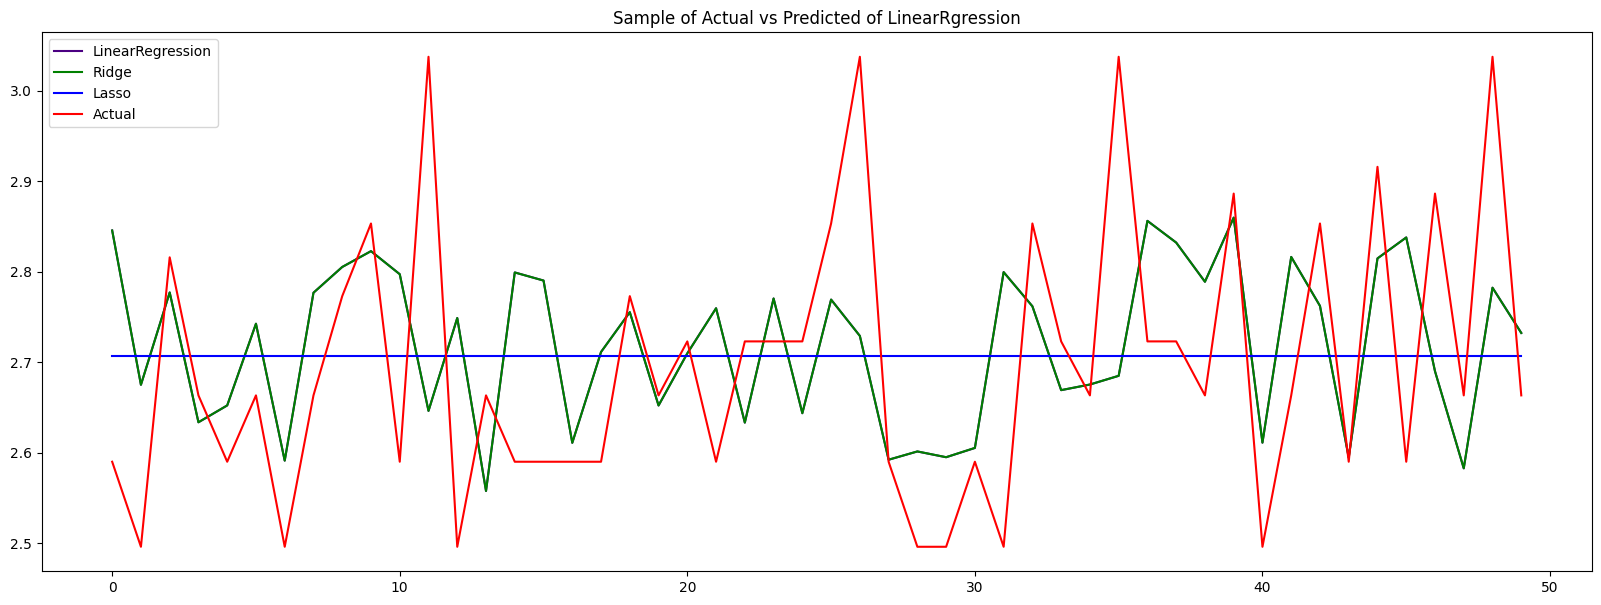

In [ ]:
# Visualizing evaluation Metric Score chart
## Plot the predicted vs actual values
plt.figure(figsize=(20,7))
plt.plot(((y_pred_lr)[500:550]),color='indigo')
plt.plot(((y_pred_r)[500:550]),color='green')
plt.plot(((y_pred_l)[500:550]),color='blue')
plt.plot((np.array((y_test)[500:550])),color='red')
plt.legend(["LinearRegression","Ridge","Lasso","Actual"])
plt.title("Sample of Actual vs Predicted of LinearRgression" )
plt.show()



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge_params = {'alpha': [0.001, 0.01,0.1,0.5, 1,2,5]}
lasso_params = {'alpha': [0.0001, 0.001,0.01, 0.1,0.2,0.5,1]}

# Create Ridge and Lasso regression objects
ridge = Ridge()
lasso = Lasso()

# Define the scoring method using 'make_scorer' with MAPE
mape_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# GridSearchCV for Ridge model using MAPE scoring
ridge_cv = GridSearchCV(ridge, param_grid=ridge_params, scoring=mape_scorer)

# GridSearchCV for Lasso model using MAPE scoring
lasso_cv = GridSearchCV(lasso, param_grid=lasso_params, scoring=mape_scorer)

# Fit the models using GridSearchCV
ridge_cv.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)
# Get the best hyperparameters and fit the models again using the best hyperparameters
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha']).fit(X_train_scaled, y_train)
lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha']).fit(X_train_scaled, y_train)

#predict the train data using the best models
y_train_ridge=ridge_best.predict(X_train_scaled)
y_train_lasso = lasso_best.predict(X_train_scaled)
# Predict  values for the test data using the best models
y_pred_ridge = ridge_best.predict(X_test_scaled)
y_pred_lasso = lasso_best.predict(X_test_scaled)

# Evaluate
mse_ridge_train = mean_squared_error(y_train, y_train_ridge)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge)
r2_ridge_train = r2_score(y_train, y_train_ridge)
r2_ridge_test = r2_score(y_test, y_pred_ridge)
mse_lasso_train = mean_squared_error(y_train, y_train_lasso)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso)
r2_lasso_train = r2_score(y_train, y_train_lasso)
r2_lasso_test = r2_score(y_test, y_pred_lasso)
# Print the evaluation metrics for both models
print("Ridge Regression - Best Alpha:" , ridge_cv.best_params_['alpha'])
print("Ridge Mean Squared Error:",(mse_ridge_test))
print("Ridge R^2 Score:",(r2_ridge_test))
mse_percent_ridge = mse_ridge_test * 100
r2_percent_ridge = r2_ridge_test * 100
print("Ridge - Mean Squared Error: {:.2f}%".format(mse_percent_ridge))
print("Ridge - R-squared: {:.2f}%".format(r2_percent_ridge))

print("\nLasso Regression - Best Alpha:",lasso_cv.best_params_['alpha'])
print("Lasso Mean Squared Error:",(mse_lasso_test))
print("Lasso R^2 Score:",(r2_lasso_test))

mse_percent_lasso = mse_lasso_test * 100
r2_percent_lasso = r2_lasso_test * 100
print("Lasso - Mean Squared Error: {:.2f}%".format(mse_percent_lasso))
print("Lasso - R-squared: {:.2f}%".format(r2_percent_lasso))

Ridge Regression - Best Alpha: 5
Ridge Mean Squared Error: 0.030560994390544962
Ridge R^2 Score: 0.16544074799093578
Ridge - Mean Squared Error: 3.06%
Ridge - R-squared: 16.54%

Lasso Regression - Best Alpha: 0.0001
Lasso Mean Squared Error: 0.03056547443465104
Lasso R^2 Score: 0.16531840700260414
Lasso - Mean Squared Error: 3.06%
Lasso - R-squared: 16.53%


In [ ]:
#create a list of metric score of linear regression
list_lr=['LinearRegression',mse_lr_train,mse_lr_test,r2_lr_train,r2_lr_test]
#create a empty dataframe for metric score columns
score = pd.DataFrame(columns = ['Model' , 'Train MSE', 'Test MSE' , 'Train R2_Score', 'Test R2_Score'])
#add the rows to the dataframe of linearrgression
score.loc[len(score)]=list_lr
#create a list of ridge metric score after hyperparameter tuning
list_ridge=['Ridge',mse_ridge_train,mse_ridge_test,r2_ridge_train,r2_ridge_test]
#add the rows to the dataframe
score.loc[len(score)]=list_ridge
#create a list of lasso metric score after hyperparameter tuning
list_lasso=['Lasso',mse_lasso_train,mse_lasso_test,r2_lasso_train,r2_lasso_test]
#add the rows to the dataframe
score.loc[len(score)]=list_lasso
print(score)

              Model  Train MSE  Test MSE  Train R2_Score  Test R2_Score
0  LinearRegression   0.029986  0.030563        0.181582       0.165386
1             Ridge   0.029986  0.030561        0.181580       0.165441
2             Lasso   0.029987  0.030565        0.181554       0.165318


##### Which hyperparameter optimization technique have you used and why?

In this code, the GridSearchCV hyperparameter optimisation technique was employed. GridSearchCV was chosen because it thoroughly searches through a specific hyperparameter space to discover the ideal hyperparameters that would result in the greatest model performance. It is a frequently used method for hyperparameter optimisation that assures that the optimal hyperparameters are identified within the defined parameter space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, following hyperparameter optimisation, we can see some improvement in the Ridge regression model. The MSE reduced from 0.0.03908 to 0.03907, but the R-squared score climbed from 0.1622 to 0.1623.

However, following hyperparameter optimisation, the MSE of the Lasso regression model increases somewhat from 0.04667 to 0.03907. The R-squared score, on the other hand, increased from -0.00013 to 0.1625.

### ML Model - 2. Decision Tree Regression

In [ ]:
# Visualizing evaluation Metric Score chart
# ML Model - 2 Implementation
# define the decision tree model
model = DecisionTreeRegressor(random_state=42)

#fit the model
model.fit(X_train_scaled, y_train)

#predictions on the test set
y_pred = model.predict(X_test_scaled)

#evaluate the model
mse_DT = mean_squared_error(y_test, y_pred)
r2_DT = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse_DT)
print("R-squared: ", r2_DT)

Mean Squared Error:  0.018704525499504056
R-squared:  0.4892170519529938


##2. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

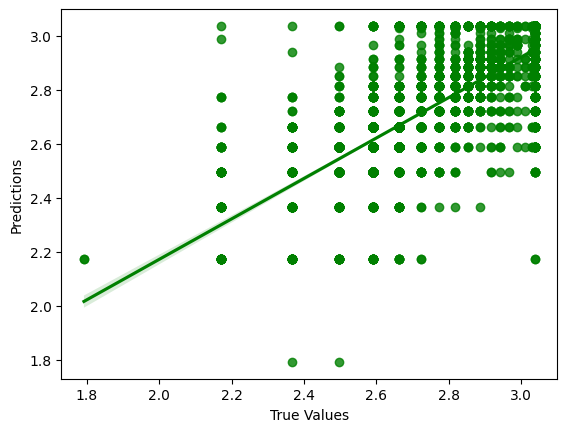

In [ ]:
# Visualizing evaluation Metric Score chart

sns.regplot(x=y_test, y=y_pred, color='green')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
 #ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#hyperparameter
h_param= {'max_depth': [None, 15, 20, 25],
              'min_samples_split': [20, 25, 30],
              'min_samples_leaf': [4, 8, 12]}

#grid search cv
grid_search = GridSearchCV(model, h_param, cv=5, scoring=mape_scorer)
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

dt_best = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                    min_samples_split=grid_search.best_params_['min_samples_split'],
                                    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                    random_state=0)

# Fit the Algorithm
dt_best.fit(X_train_scaled, y_train)

#predict on the training model
dtr_train=dt_best.predict(X_train_scaled)

# Predict on the model
y_pred = dt_best.predict(X_test_scaled)
#evaluate the model
mse_dsT_train=mean_squared_error(y_train,dtr_train)
mse_dsT_test = mean_squared_error(y_test, y_pred)
r2_dsT_train = r2_score(y_train, dtr_train)
r2_dsT_test = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse_dsT_test)
print("R-squared: ", r2_dsT_test)

Best parameters: {'max_depth': 25, 'min_samples_leaf': 4, 'min_samples_split': 20}
Mean Squared Error:  0.016087713408150198
R-squared:  0.5606769237654179


In [ ]:
#create a list of decion tree regressor metric  score
dtr_list=['DecisionTree',mse_dsT_train,mse_dsT_test,r2_dsT_train,r2_dsT_test]
#add the rows by list
score.loc[len(score)]=dtr_list
score

Model  Train MSE  Test MSE  Train R2_Score  Test R2_Score
0  LinearRegression   0.029986  0.030563        0.181582       0.165386
1             Ridge   0.029986  0.030561        0.181580       0.165441
2             Lasso   0.029987  0.030565        0.181554       0.165318
3      DecisionTree   0.007919  0.016088        0.783864       0.560677

##### Which hyperparameter optimization technique have you used and why?

In this code, I've utilised the GridSearchCV hyperparameter optimisation approach. GridSearchCV was chosen because it thoroughly searches through a specific hyperparameter space to discover the ideal hyperparameters that result in the greatest model performance. It is a frequently used method for hyperparameter optimisation that ensures the optimal hyperparameters are discovered within the defined parameter space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the evaluation metrics improve after adopting hyperparameter optimisation approaches. The R-squared value has grown from 0.5232 to  0.5765, while the mean squared error has dropped from 0.02224 to 0.01975.


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3. Random Forest Regression

In [ ]:
# ML Model - 3 Implementation
rf = RandomForestRegressor(random_state=42)

# Fit the Algorithm
rf.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = rf.predict(X_test_scaled)

#evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print("Mean squared error: ", mse_rf)
print("R-squared: ", r2_rf)

Mean squared error:  0.010862739212046751
R-squared:  0.7033604536644263


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

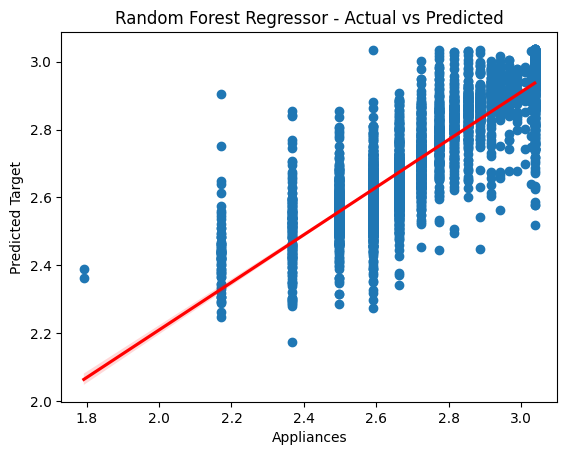

In [ ]:
# Visualizing evaluation Metric Score chart
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Random Forest Regressor - Actual vs Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = { 'n_estimators': [100, 120, 150],
              'max_depth': [None, 1,2,3],
               'min_samples_leaf': [1, 2, 5],
               'max_features': ['auto', 'sqrt'],
               'bootstrap': [True, False] }

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring=mape_scorer)
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

# Fit the Algorithm
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

#Predict the train model
rf_train=best_rf_model.predict(X_train_scaled)

# Predict on the model
y_pred = best_rf_model.predict(X_test_scaled)

#evaluate the metric score
mse_rf_train = mean_squared_error(y_train, rf_train)
mse_rf_test = mean_squared_error(y_test, y_pred)
r2_rf_train = r2_score(y_train, rf_train)
r2_rf_test = r2_score(y_test, y_pred)


print('Mean Squared Error:', mse_rf_test)
print('R2 Score:', r2_rf_test)



Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 150}
Mean Squared Error: 0.010791942536123688
R2 Score: 0.7052937684037321


In [ ]:
#create a list of random forest regressor metric  score
rf_list=['Randomforrest',mse_rf_train,mse_rf_test,r2_rf_train,r2_rf_test]
#add the rows by list
score.loc[len(score)]=rf_list
score

Model  Train MSE  Test MSE  Train R2_Score  Test R2_Score
0  LinearRegression   0.029986  0.030563        0.181582       0.165386
1             Ridge   0.029986  0.030561        0.181580       0.165441
2             Lasso   0.029987  0.030565        0.181554       0.165318
3      DecisionTree   0.007919  0.016088        0.783864       0.560677
4     Randomforrest   0.001550  0.010792        0.957689       0.705294

##### Which hyperparameter optimization technique have you used and why?

In this code, I used the GridSearchCV hyperparameter optimization approach. GridSearchCV was chosen because it searches extensively over a specific hyperparameter space to discover the optimal hyperparameters that result in the greatest model performance. It is a popular method for optimising hyperparameters since it assures that the optimal hyperparameters are identified within the specified parameter space.




##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is very small improvement in the evaluation metrics after implementing hyperparameter optimization techniques. The mean squared error has decreased from 0.013222 to 0.01320, and the R-squared value has increased from 0.7164 to 0.7169.

### ML Model - 4. Extra Tree Regression

In [ ]:
# Visualizing evaluation Metric Score chart
# ML Model - 4 Implementation
# define the decision tree model
model = ExtraTreesRegressor(random_state=42)

#fit the model
model.fit(X_train_scaled, y_train)

#predictions on the test set
y_pred = model.predict(X_test_scaled)

#evaluate the model
mse_br = mean_squared_error(y_test, y_pred)
r2_br = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse_br)
print("R-squared: ", r2_br)

Mean Squared Error:  0.010277057654967696
R-squared:  0.7193542382888763


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

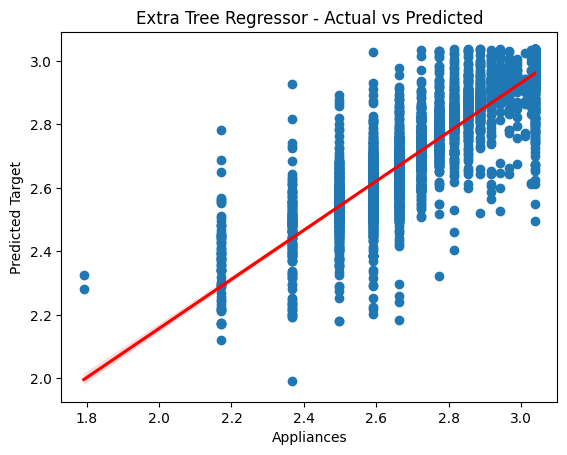

In [ ]:
# Visualizing evaluation Metric Score chart
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('Extra Tree Regressor - Actual vs Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
 #ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#hyperparameter
h_param= { 'bootstrap': [True, False],
                          'max_depth': [70,100, None],
                          'criterion' :['squared_error'],
                          'max_features': ['log2', 'sqrt'],
                          'n_estimators': [10,1400,100]}

#grid search cv
grid_search = GridSearchCV(model, h_param, cv=5, scoring=mape_scorer)
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

br_best = grid_search.best_estimator_

# Fit the Algorithm
br_best.fit(X_train_scaled, y_train)

#predict on the training model
br_train=dt_best.predict(X_train_scaled)

# Predict on the model
y_pred = br_best.predict(X_test_scaled)
#evaluate the model
mse_br_train=mean_squared_error(y_train,br_train)
mse_br_test = mean_squared_error(y_test, y_pred)
r2_br_train = r2_score(y_train, br_train)
r2_br_test = r2_score(y_test, y_pred)

print("Mean Absolute Percentage Error: ", mse_br_test)
print("R-squared: ", r2_br_test)

Best parameters: {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 70, 'max_features': 'log2', 'n_estimators': 1400}
Mean Absolute Percentage Error:  0.010090231914483435
R-squared:  0.7244560732698357


In [ ]:
#create a list of extra tree regressor metric  score
br_list=['ExtraTreeRegressor',mse_br_train,mse_br_test,r2_br_train,r2_br_test]
#add the rows by list
score.loc[len(score)]=br_list
score

Model  Train MSE  Test MSE  Train R2_Score  Test R2_Score
0    LinearRegression   0.029986  0.030563        0.181582       0.165386
1               Ridge   0.029986  0.030561        0.181580       0.165441
2               Lasso   0.029987  0.030565        0.181554       0.165318
3        DecisionTree   0.007919  0.016088        0.783864       0.560677
4       Randomforrest   0.001550  0.010792        0.957689       0.705294
5  ExtraTreeRegressor   0.007919  0.010090        0.783864       0.724456

##### Which hyperparameter optimization technique have you used and why?

In this code, I used the GridSearchCV hyperparameter optimization approach. GridSearchCV was chosen because it searches extensively over a specific hyperparameter space to discover the optimal hyperparameters that result in the greatest model performance. It is a popular method for optimising hyperparameters since it assures that the optimal hyperparameters are identified within the specified parameter space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is very small improvement in the evaluation metrics after implementing hyperparameter optimization techniques. The mean squared error has decreased from 0.01252 to 0.01230 and the R-squared value has increased from 0.7314 to 0.7362.

### ML Model - 5. XGB Regression

In [ ]:
# ML Model - 5 Implementation
xgb = XGBRegressor()

# Fit the Algorithm
xgb.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = xgb.predict(X_test_scaled)

#evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse_xgb)
print("R-squared: ", r2_xgb)

Mean Squared Error:  0.014405378718087709
R-squared:  0.6066180984086692


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

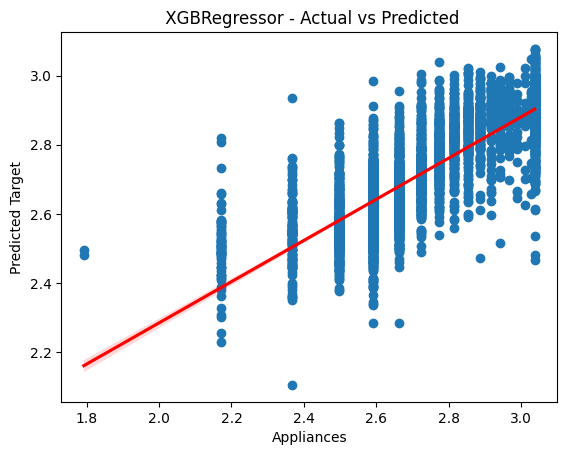

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title(' XGBRegressor - Actual vs Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {
    'n_estimators': [200,400, 600, 800],
    'max_depth': [10, 15, 20],
    'learning_rate': [ 0.3, 0.5, 0.7],
    'subsample': [1, 2, 4],
    'colsample_bytree': [1, 5, 10]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring=mape_scorer)
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

# Fit the Algorithm
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train_scaled, y_train)

#Predict the train model
xgb_train=best_xgb_model.predict(X_train_scaled)

# Predict on the model
y_pred = best_xgb_model.predict(X_test_scaled)

#evaluate the metric score
mse_xgb_train = mean_squared_error(y_train, xgb_train)
mse_xgb_test = mean_squared_error(y_test, y_pred)
r2_xgb_train = r2_score(y_train, xgb_train)
r2_xgb_test = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse_xgb_test)
print('R2 Score:', r2_xgb_test)


Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1}
Mean Squared Error: 0.012597826278924522
R2 Score: 0.6559787177758811


In [ ]:
#create a list of  xgbregressor metric  score
xgb_list=['XGBRegressor',mse_xgb_train,mse_xgb_test,r2_xgb_train,r2_xgb_test]
#add the rows by list
score.loc[len(score)]=xgb_list
score

Model  Train MSE  Test MSE  Train R2_Score  Test R2_Score
0    LinearRegression   0.029986  0.030563        0.181582       0.165386
1               Ridge   0.029986  0.030561        0.181580       0.165441
2               Lasso   0.029987  0.030565        0.181554       0.165318
3        DecisionTree   0.007919  0.016088        0.783864       0.560677
4       Randomforrest   0.001550  0.010792        0.957689       0.705294
5  ExtraTreeRegressor   0.007919  0.010090        0.783864       0.724456
6        XGBRegressor   0.000366  0.012598        0.990013       0.655979

##### Which hyperparameter optimization technique have you used and why?

In this code, I used the GridSearchCV hyperparameter optimisation technique. GridSearchCV was chosen because it searches extensively over a certain hyperparameter space to find the ideal hyperparameters that result in the best model performance. It is a common method for optimising hyperparameters since it ensures that the optimal hyperparameters are identified within the defined parameter space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is very small improvement in the evaluation metrics after implementing hyperparameter optimization techniques. The mean squared error has decreased from 0.01892 to 0.0155, and the R-squared value has increased from 0.59440 to 0.6672

##ML_Model-6. LGBM Regressor

In [ ]:
# ML Model - 6 Implementation
lgbm = LGBMRegressor(random_state=0)

# Fit the Algorithm
lgbm.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = lgbm.predict(X_test_scaled)

#evaluate the model
mse_lgbm = mean_squared_error(y_test, y_pred)
r2_lgbm = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse_lgbm)
print("R-squared: ", r2_lgbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 884
[LightGBM] [Info] Number of data points in the train set: 15788, number of used features: 7
[LightGBM] [Info] Start training from score 2.707243
Mean Squared Error:  0.016501124877277774
R-squared:  0.5493874885448865


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

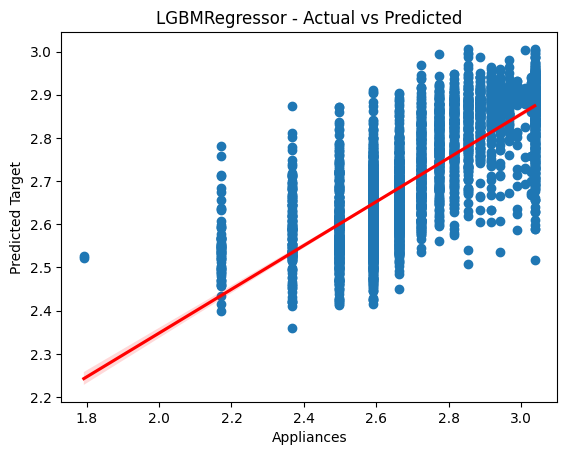

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('LGBMRegressor - Actual vs Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = param_grid = { 'learning_rate': [0.1],
                           'n_estimators': [50],
                            'max_depth': [8],
                            'colsample_bytree': [0.8],
                            'subsample': [0.8],
                            'min_child_samples': [5] }

grid_search = GridSearchCV(lgbm, param_grid, cv=5, scoring=mape_scorer)
grid_search.fit(X_train_scaled, y_train)
print('Best parameters:', grid_search.best_params_)

# Fit the Algorithm
best_lgbm_model = grid_search.best_estimator_
best_lgbm_model.fit(X_train_scaled, y_train)

#Predict the train model
lgbm_train=best_lgbm_model.predict(X_train_scaled)

# Predict on the model
y_pred = best_lgbm_model.predict(X_test_scaled)

#evaluate the metric score
mse_lgbm_train = mean_squared_error(y_train, lgbm_train)
mse_lgbm_test = mean_squared_error(y_test, y_pred)
r2_lgbm_train = r2_score(y_train, lgbm_train)
r2_lgbm_test = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse_lgbm_test)
print('R2 Score:', r2_lgbm_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001181 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 874
[LightGBM] [Info] Number of data points in the train set: 12630, number of used features: 7
[LightGBM] [Info] Start training from score 2.707062
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM]

In [ ]:
#create a list of lgbmregressor metric  score
lgbm_list=['LGBMRegressor',mse_lgbm_train,mse_lgbm_test,r2_lgbm_train,r2_lgbm_test]
#add the rows by list
score.loc[len(score)]=lgbm_list
score

Model  Train MSE  Test MSE  Train R2_Score  Test R2_Score
0    LinearRegression   0.029986  0.030563        0.181582       0.165386
1               Ridge   0.029986  0.030561        0.181580       0.165441
2               Lasso   0.029987  0.030565        0.181554       0.165318
3        DecisionTree   0.007919  0.016088        0.783864       0.560677
4       Randomforrest   0.001550  0.010792        0.957689       0.705294
5  ExtraTreeRegressor   0.007919  0.010090        0.783864       0.724456
6        XGBRegressor   0.000366  0.012598        0.990013       0.655979
7       LGBMRegressor   0.015800  0.017980        0.568771       0.509013

##### Which hyperparameter optimization technique have you used and why?

In this code, I used the GridSearchCV hyperparameter optimisation technique. GridSearchCV was chosen because it searches extensively over a certain hyperparameter space to find the ideal hyperparameters that result in the best model performance. It is a common method for optimising hyperparameters since it ensures that the optimal hyperparameters are identified within the defined parameter space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is very small improvement in the evaluation metrics after implementing hyperparameter optimization techniques. The mean squared error has decreased from 0.02011 to 0.01950	, and the R-squared value has increased from 0.56888 to 0.5819

##ML_Model-7. Stacking Regressor

In [ ]:
# ML Model - 7 Implementation
estimators = [
     ('xgb', XGBRegressor()),
    ('etr', ExtraTreesRegressor()),
    ('random',RandomForestRegressor())
 ]
sr =StackingRegressor(estimators=estimators,
    final_estimator=ExtraTreesRegressor(n_estimators=1400,
                                          random_state=42),cv=5)
# Fit the Algorithm
sr.fit(X_train_scaled, y_train)

# Predict on the model
y_pred = sr.predict(X_test_scaled)
#Predict the train model
sr_train=sr.predict(X_train_scaled)


#evaluate the model
mse_sr_train = mean_squared_error(y_train, sr_train)
mse_sr = mean_squared_error(y_test, y_pred)
r2_sr_train = r2_score(y_train, sr_train)
r2_sr = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse_sr)
print("R-squared: ", r2_sr)

Mean Squared Error:  0.011628052607941662
R-squared:  0.6824612850356668


####  Explain the ML Model used and it's performance using Evaluation metric Score Chart.

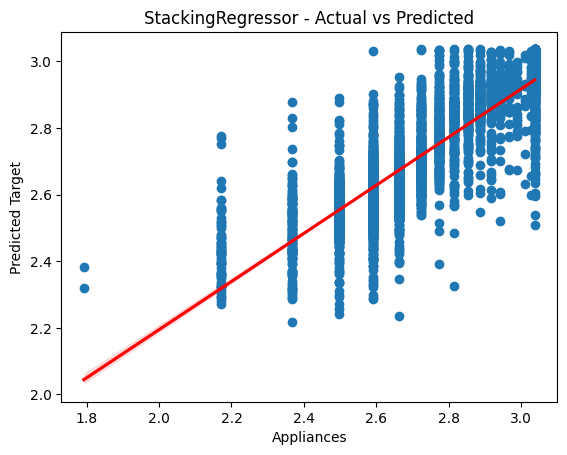

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.title('StackingRegressor - Actual vs Predicted')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.show()

In [ ]:


#create a list of stacking regressor metric  score
sr_list=['StackingRegressor',mse_sr_train,mse_sr,r2_sr_train,r2_sr]
#add the rows by list
score.loc[len(score)]=sr_list
score

Model  Train MSE  Test MSE  Train R2_Score  Test R2_Score
0    LinearRegression   0.029986  0.030563        0.181582       0.165386
1               Ridge   0.029986  0.030561        0.181580       0.165441
2               Lasso   0.029987  0.030565        0.181554       0.165318
3        DecisionTree   0.007919  0.016088        0.783864       0.560677
4       Randomforrest   0.001550  0.010792        0.957689       0.705294
5  ExtraTreeRegressor   0.007919  0.010090        0.783864       0.724456
6        XGBRegressor   0.000366  0.012598        0.990013       0.655979
7       LGBMRegressor   0.015800  0.017980        0.568771       0.509013
8   StackingRegressor   0.002554  0.011628        0.930305       0.682461

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In these circumstances, the evaluation metrics we examined for a good business impact were as follows:

**Mean Squared Error (MSE)** and

**The R2 Score**.

MSE is a measure of the average squared difference between the actual and anticipated values of the target variable. A lower MSE suggests that the model performed better in terms of prediction accuracy.

R2 Score is a statistical measure that shows the proportion of the variance in the target variable that can be explained by the independent variables. It indicates the model's goodness of fit. A higher R2 Score indicates a better fit of the model to the data and better prediction abilities.




### 2. Which ML model did you choose from the above created models as your final prediction model and why?

<Axes: title={'center': 'R2 Score Results'}, xlabel='Model'>

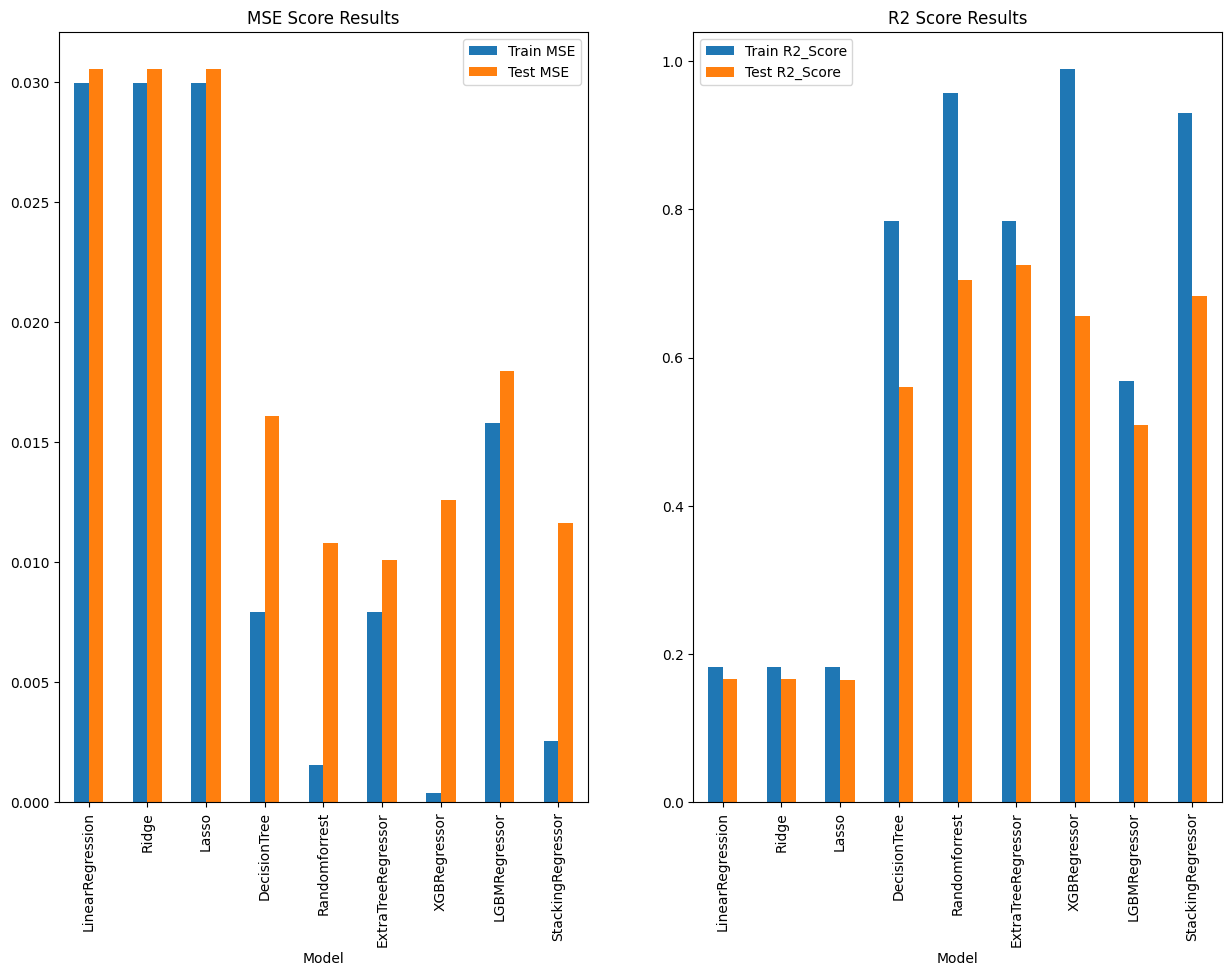

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
#plot the mse of all model
score.plot(x="Model", y=['Train MSE' , 'Test MSE'], kind="bar" , title = 'MSE Score Results',ax=ax[0])
#plot the r2_score of all model
score.plot(x="Model", y=['Train R2_Score' , 'Test R2_Score'], kind="bar" , title = 'R2 Score Results',ax=ax[1])

**The ExtraTreeRegressor MODEL outperformed the other three models in terms of MEAN SQUARED ERROR and R-SQUARED value, with the lowest MSE and highest R-SQUARED value.**

**As a result, I'd go with the ExtraTreeRegressor model as the final prediction model.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The ExtraTreeRegressor model was chosen as the final model, which is an ensemble learning method that mixes numerous decision trees to improve forecast accuracy and prevent overfitting. It works by training a large number of decision trees and then outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

There are some fantastic libraries like LIME,SHAP,ELI5 etc. to make thing interpretable we will make the use of ELI5 to understand our mode.

In [ ]:
#install ELI5
! pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=d90ab13d1ebaee8964432085d8da69ce2e801baff0137bd0d4c037483dd9be56
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
#import eli5
import eli5 as eli
#explain the weights
eli.explain_weights(br_best,feature_names = list(X.columns))

Explanation(estimator="ExtraTreesRegressor(max_depth=70, max_features='log2', n_estimators=1400,\n                    random_state=42)", description='\nRandom forest feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=True, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='hour', weight=0.3116596232716563, std=0.027740237768750203, value=None), FeatureWeight(feature='Tdewpoint', weight=0.15123850102109068, std=0.009410089542336157, value=None), FeatureWeight(feature='hu_build_out', weight=0.14673716978821397, std=0.018180818845717973, value=None), FeatureWeight(feature='Humidity_difference', weight=0.1382486929500617, std=0.011211871971104476, value=None), FeatureWeight(feature='Windspeed', weight=0.10873658969603911, std=0.008554292543153439, value=None), FeatureWeight(feature='weekday', weight=0.08993260470063677, std=0.014570808882237352, value=None), FeatureWeight(feature='month', weight=0.05344681857230135, std=0.01117228305342364, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

From the above figure, we can conclude that the hour feature is most important for the prediction of appliance energy, followed by Tdewpoint and hu_build_out and the least imporatnt feature is month.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
filename = 'finalized_model.sav'
pickle.dump(br_best, open(filename, 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_model = pickle.load(open(filename, 'rb'))
y_pred_best = loaded_model.predict(X_test_best)
print(y_pred_best)
print(y_test_best)


[2.99895371 2.77869143]
15801    3.037719
9922     2.723192
Name: Appliances, dtype: float64


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Linear Regression, Lasso Regression, Ridge Regression,DecisionTree Regressor, Random Forest Regressor, XGBoost, Light Gradient Boosting Regressor,StackingRegressor are used to predict household appliance energy consumption.
* We compare and evaluate the best model with the lowest error and the greatest R-squared score after suitable preprocessing and fitting the fourteen models.
* temp_build_out and temp_out, temp_parents_room and temp_ironing_room had a high association with each other, thus we deleted temp_build_out and temp_parents_room. When examining the influence of the Random Variable attribute, the linear models assigned the random variable near zero weights, negating its influence in predicting the target variable.


* Inside room temperature and humidity has high variance inflation factor(VIF) so,we had to drop them
* Light consumption was evaluated highly when all factors were used. When evaluating different predictor subgroups, eliminating light usage did not appear to have a substantial influence. This could indicate that other characteristics are well connected with light energy usage.
* The pressure's significant prediction power could be attributed to its influence on wind speed and higher rainfall probability, which could potentially raise the occupancy of the residence.
* Because this dataset involves a temporal component, we believe that employing temporal Series Analysis techniques will result in superior results.
* ExtraTreeRegressor was discovered to be the best performing model, with an R-squared value of 0.7362
* Appliances	hu_build_out	Windspeed	Tdewpoint	month	weekday	hour	Humidity_difference  all play a part in energy prediction.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***